# **Context**

This problem statement is based on the Shinkansen Bullet Train in Japan, and passengers’ experience with that mode of travel. This machine-learning exercise aims to determine the relative importance of each parameter with regard to their contribution to the passengers’ overall travel experience. The dataset contains a random sample of individuals who travelled on this train. The on-time performance of the trains along with passenger information is published in a file named ‘Traveldata_train.csv’.  These passengers were later asked to provide their feedback on various parameters related to the travel, along with their overall experience. These collected details are made available in the survey report labelled ‘Surveydata_train.csv’.

In the survey, each passenger was explicitly asked whether they were satisfied with their overall travel experience or not, and that is captured in the data of the survey report under the variable labelled ‘Overall_Experience’.

The objective of this problem is to understand which parameters play an important role in swaying passenger feedback towards a positive scale. You are provided test data containing the travel data and the survey data of passengers. Both the test data and the train data are collected at the same time and belong to the same population.

# **Problem Statement**

Goal:
The goal of the problem is to predict whether a passenger was satisfied or not, considering his/her overall experience of traveling on the Shinkansen Bullet Train.

Dataset:
The problem consists of 2 separate datasets: Travel data & Survey data. Travel data has information related to passengers and attributes related to the Shinkansen train, in which they traveled. The survey data is aggregated data of surveys indicating the post-service experience. You are expected to treat both these datasets as raw data and perform any necessary data cleaning/validation steps as required.

The data has been split into two groups and provided in the Dataset folder. The folder contains both train and test data separately.

Train_Data
Test_Data

Target Variable: Overall_Experience (1 represents ‘satisfied’, and 0 represents ‘not satisfied’)

The training set can be used to build your machine-learning model. The training set has labels for the target column - Overall_Experience.

The testing set should be used to see how well your model performs on unseen data. For the test set, it is expected to predict the ‘Overall_Experience’ level for each participant.

Data Dictionary:
All the data is self-explanatory. The survey levels are explained in the Data Dictionary file.

Submission File Format: You will need to submit a CSV file with exactly 35,602 entries plus a header row. The file should have exactly two columns

ID
Overall_Experience (contains 0 & 1 values, 1 represents ‘Satisfied’, and 0 represents ‘Not Satisfied’)

Evaluation Criteria:

Accuracy Score: The evaluation metric is simply the percentage of predictions made by the model that turned out to be correct. This is also called the accuracy of the model. It will be calculated as the total number of correct predictions (True Positives + True Negatives) divided by the total number of observations in the dataset.

In other words, the best possible accuracy is 100% (or 1), and the worst possible accuracy is 0

# **Importing libraries and dataset**

In [1]:
# data manipulation
import numpy as np
import pandas as pd

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

In [2]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading datasets
survey_train = pd.read_csv('/content/drive/MyDrive/Colab Files/shinkansen_datasets/Surveydata_train_(1).csv')
travel_train = pd.read_csv('/content/drive/MyDrive/Colab Files/shinkansen_datasets/Traveldata_train_(1).csv')

# storing a copy of original dat
survey_train_copy = survey_train.copy()
travel_train_copy = travel_train.copy()

# **Data Overview**

In [4]:
# first 5 entries in survey dataset
survey_train.head()

ID  Overall_Experience       Seat_Comfort Seat_Class  \
0  98800001                   0  Needs Improvement  Green Car   
1  98800002                   0               Poor   Ordinary   
2  98800003                   1  Needs Improvement  Green Car   
3  98800004                   0         Acceptable   Ordinary   
4  98800005                   1         Acceptable   Ordinary   

  Arrival_Time_Convenient           Catering  Platform_Location  \
0               Excellent          Excellent    Very Convenient   
1               Excellent               Poor  Needs Improvement   
2       Needs Improvement  Needs Improvement  Needs Improvement   
3       Needs Improvement                NaN  Needs Improvement   
4              Acceptable         Acceptable         Manageable   

  Onboard_Wifi_Service Onboard_Entertainment Online_Support  \
0                 Good     Needs Improvement     Acceptable   
1                 Good                  Poor           Good   
2    Needs Improvement                  Good      Excellent   
3           Acceptable     Needs Improvement     Acceptable   
4    Needs Improvement                  Good      Excellent   

  Ease_of_Online_Booking    Onboard_Service            Legroom  \
0      Needs Improvement  Needs Improvement         Acceptable   
1                   Good          Excellent  Needs Improvement   
2              Excellent          Excellent          Excellent   
3             Acceptable         Acceptable         Acceptable   
4                   Good               Good               Good   

    Baggage_Handling    CheckIn_Service        Cleanliness Online_Boarding  
0  Needs Improvement               Good  Needs Improvement            Poor  
1               Poor  Needs Improvement               Good            Good  
2          Excellent               Good          Excellent       Excellent  
3         Acceptable               Good         Acceptable      Acceptable  
4               Good               Good               Good            Good

In [5]:
# first 5 entries in travel dataset
travel_train.head()

ID  Gender   Customer_Type   Age      Type_Travel Travel_Class  \
0  98800001  Female  Loyal Customer  52.0              NaN     Business   
1  98800002    Male  Loyal Customer  48.0  Personal Travel          Eco   
2  98800003  Female  Loyal Customer  43.0  Business Travel     Business   
3  98800004  Female  Loyal Customer  44.0  Business Travel     Business   
4  98800005  Female  Loyal Customer  50.0  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  
0              272                      0.0                    5.0  
1             2200                      9.0                    0.0  
2             1061                     77.0                  119.0  
3              780                     13.0                   18.0  
4             1981                      0.0                    0.0

**Observations:** Both datasets contain many catagorical columns that most likely need to be converted into numerical columns to be used in machine learning algorithms.

In [6]:
# amount of columns and rows
travel_train.shape

(94379, 9)

In [7]:
# amount of columns and rows
survey_train.shape

(94379, 17)

**Observations:** Both data sets have the same number of columns. We may be able to combine these datasets together for more efficient training.

In [8]:
#checking for missing values
travel_train.isnull().sum()

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64

In [9]:
#checking for missing values
survey_train.isnull().sum()

ID                            0
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

**Observations:** There are a lot of missing values, and they will need to be treated later.

In [10]:
travel_train.nunique()

ID                         94379
Gender                         2
Customer_Type                  2
Age                           75
Type_Travel                    2
Travel_Class                   2
Travel_Distance             5210
Departure_Delay_in_Mins      437
Arrival_Delay_in_Mins        434
dtype: int64

In [11]:
# checking unique values
survey_train.nunique()

ID                         94379
Overall_Experience             2
Seat_Comfort                   6
Seat_Class                     2
Arrival_Time_Convenient        6
Catering                       6
Platform_Location              6
Onboard_Wifi_Service           6
Onboard_Entertainment          6
Online_Support                 6
Ease_of_Online_Booking         6
Onboard_Service                6
Legroom                        6
Baggage_Handling               5
CheckIn_Service                6
Cleanliness                    6
Online_Boarding                6
dtype: int64

**Observations:** The `ID` column in both datasets has all unique values.

In [12]:
# merging the datasets
df = pd.merge(survey_train, travel_train, on = 'ID', how = 'inner')

In [13]:
df.drop('ID', axis = 1, inplace = True)
df.head()

Overall_Experience       Seat_Comfort Seat_Class Arrival_Time_Convenient  \
0                   0  Needs Improvement  Green Car               Excellent   
1                   0               Poor   Ordinary               Excellent   
2                   1  Needs Improvement  Green Car       Needs Improvement   
3                   0         Acceptable   Ordinary       Needs Improvement   
4                   1         Acceptable   Ordinary              Acceptable   

            Catering  Platform_Location Onboard_Wifi_Service  \
0          Excellent    Very Convenient                 Good   
1               Poor  Needs Improvement                 Good   
2  Needs Improvement  Needs Improvement    Needs Improvement   
3                NaN  Needs Improvement           Acceptable   
4         Acceptable         Manageable    Needs Improvement   

  Onboard_Entertainment Online_Support Ease_of_Online_Booking  ...  \
0     Needs Improvement     Acceptable      Needs Improvement  ...   
1                  Poor           Good                   Good  ...   
2                  Good      Excellent              Excellent  ...   
3     Needs Improvement     Acceptable             Acceptable  ...   
4                  Good      Excellent                   Good  ...   

         Cleanliness Online_Boarding  Gender   Customer_Type   Age  \
0  Needs Improvement            Poor  Female  Loyal Customer  52.0   
1               Good            Good    Male  Loyal Customer  48.0   
2          Excellent       Excellent  Female  Loyal Customer  43.0   
3         Acceptable      Acceptable  Female  Loyal Customer  44.0   
4               Good            Good  Female  Loyal Customer  50.0   

       Type_Travel Travel_Class Travel_Distance  Departure_Delay_in_Mins  \
0              NaN     Business             272                      0.0   
1  Personal Travel          Eco            2200                      9.0   
2  Business Travel     Business            1061                     77.0   
3  Business Travel     Business             780                     13.0   
4  Business Travel     Business            1981                      0.0   

  Arrival_Delay_in_Mins  
0                   5.0  
1                   0.0  
2                 119.0  
3                  18.0  
4                   0.0  

[5 rows x 24 columns]

# **EDA** (Exploratory Data Analysis)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Overall_Experience       94379 non-null  int64  
 1   Seat_Comfort             94318 non-null  object 
 2   Seat_Class               94379 non-null  object 
 3   Arrival_Time_Convenient  85449 non-null  object 
 4   Catering                 85638 non-null  object 
 5   Platform_Location        94349 non-null  object 
 6   Onboard_Wifi_Service     94349 non-null  object 
 7   Onboard_Entertainment    94361 non-null  object 
 8   Online_Support           94288 non-null  object 
 9   Ease_of_Online_Booking   94306 non-null  object 
 10  Onboard_Service          86778 non-null  object 
 11  Legroom                  94289 non-null  object 
 12  Baggage_Handling         94237 non-null  object 
 13  CheckIn_Service          94302 non-null  object 
 14  Cleanliness           

In [15]:
df.describe()

Overall_Experience           Age  Travel_Distance  \
count        94379.000000  94346.000000     94379.000000   
mean             0.546658     39.419647      1978.888185   
std              0.497821     15.116632      1027.961019   
min              0.000000      7.000000        50.000000   
25%              0.000000     27.000000      1359.000000   
50%              1.000000     40.000000      1923.000000   
75%              1.000000     51.000000      2538.000000   
max              1.000000     85.000000      6951.000000   

       Departure_Delay_in_Mins  Arrival_Delay_in_Mins  
count             94322.000000           94022.000000  
mean                 14.647092              15.005222  
std                  38.138781              38.439409  
min                   0.000000               0.000000  
25%                   0.000000               0.000000  
50%                   0.000000               0.000000  
75%                  12.000000              13.000000  
max                1592.000000            1584.000000

In [17]:
# Get list of categorical columns
cat_col = df.select_dtypes(include='object').columns.tolist()

# Get list of numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

print("Categorical columns:", cat_col)
print("Numerical columns:", num_col)

Categorical columns: ['Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering', 'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding', 'Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class']
Numerical columns: ['Overall_Experience', 'Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']


### **Univariate Analysis**

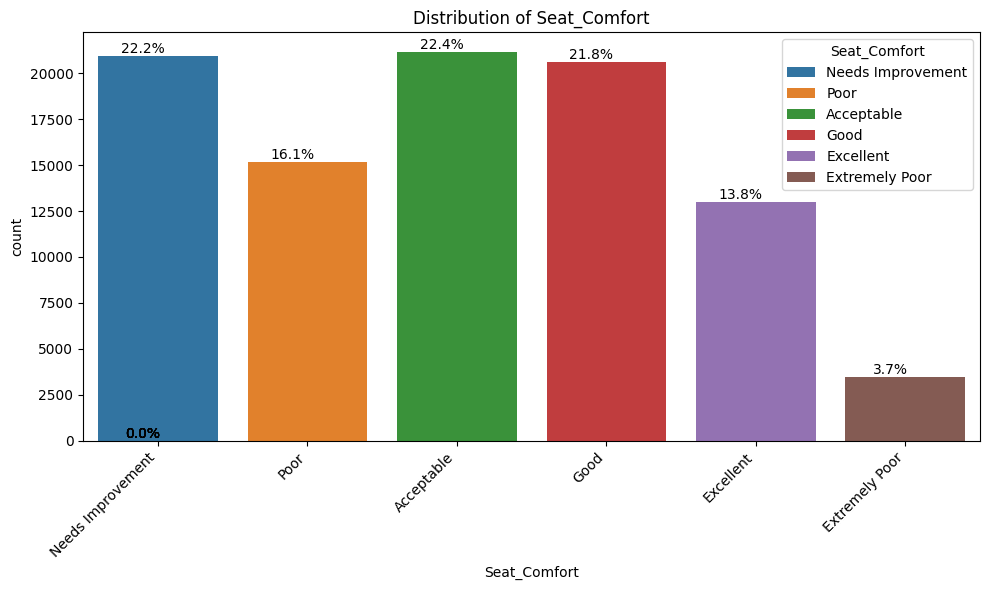

----------------------------------------------------------------------


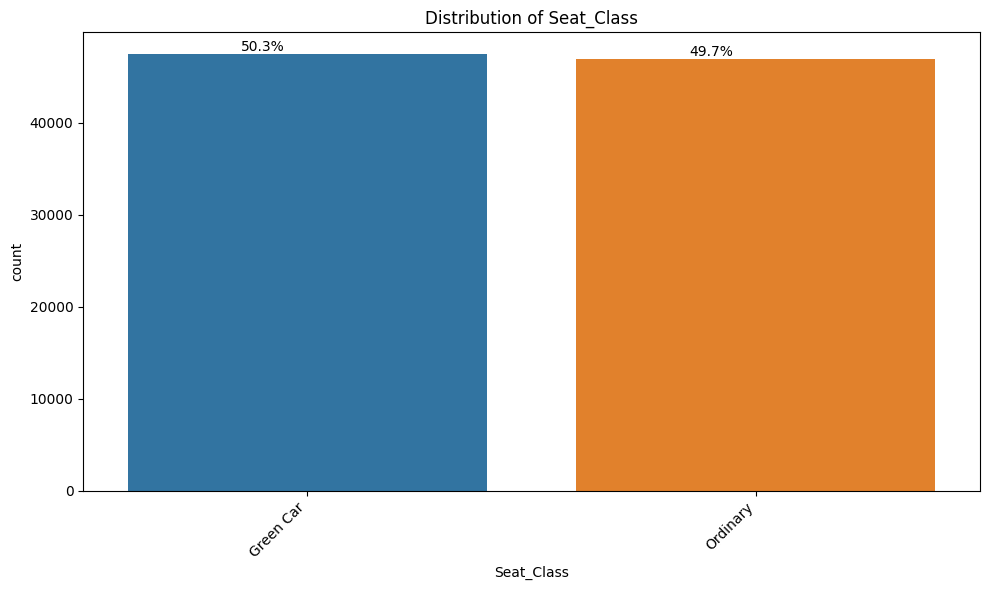

----------------------------------------------------------------------


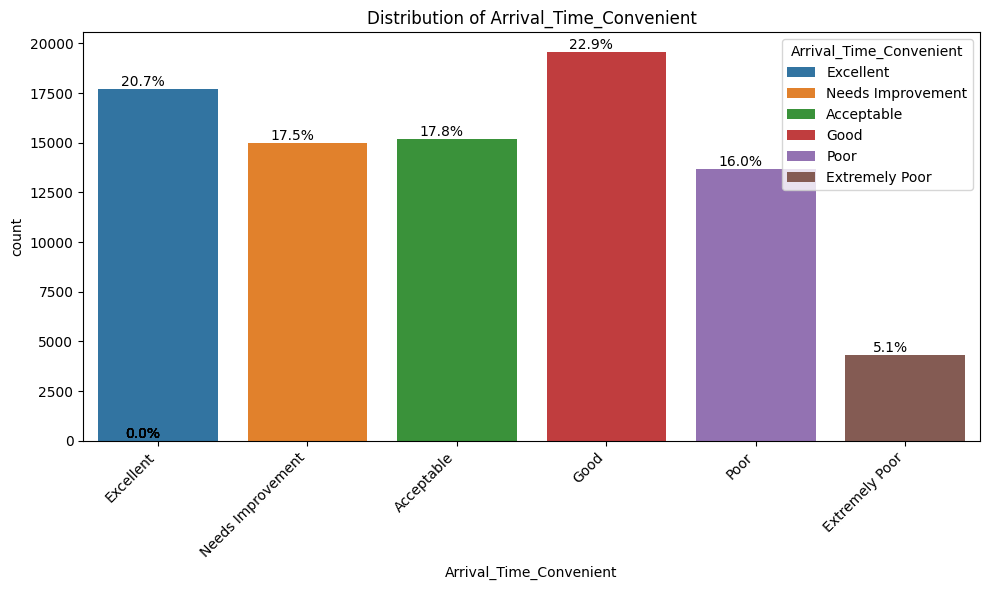

----------------------------------------------------------------------


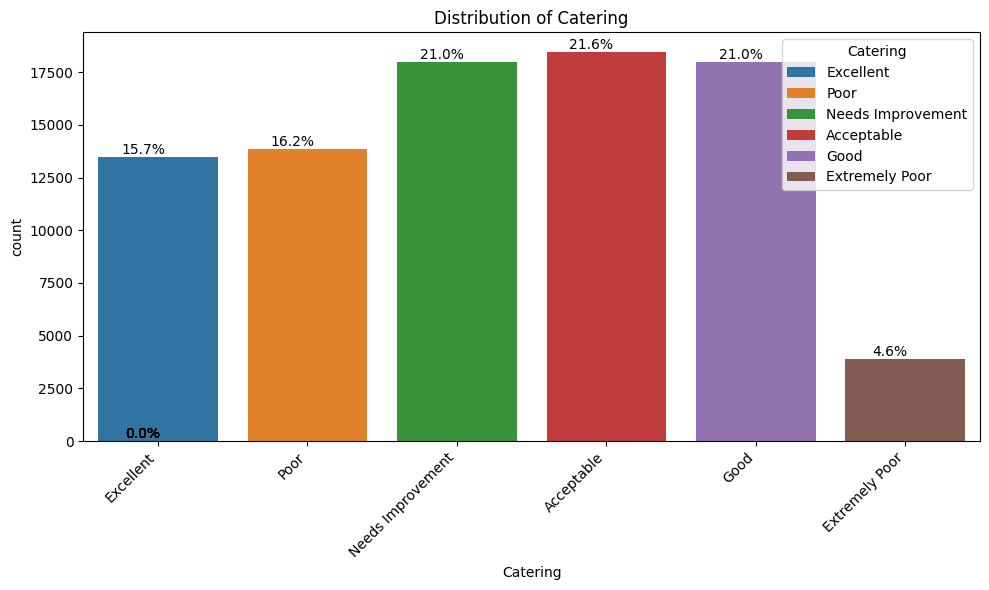

----------------------------------------------------------------------


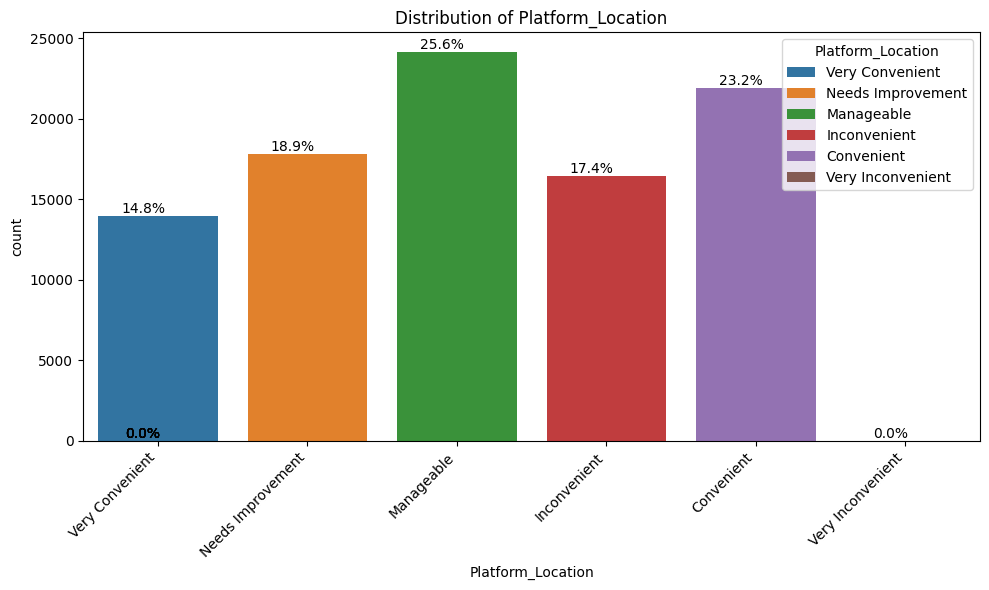

----------------------------------------------------------------------


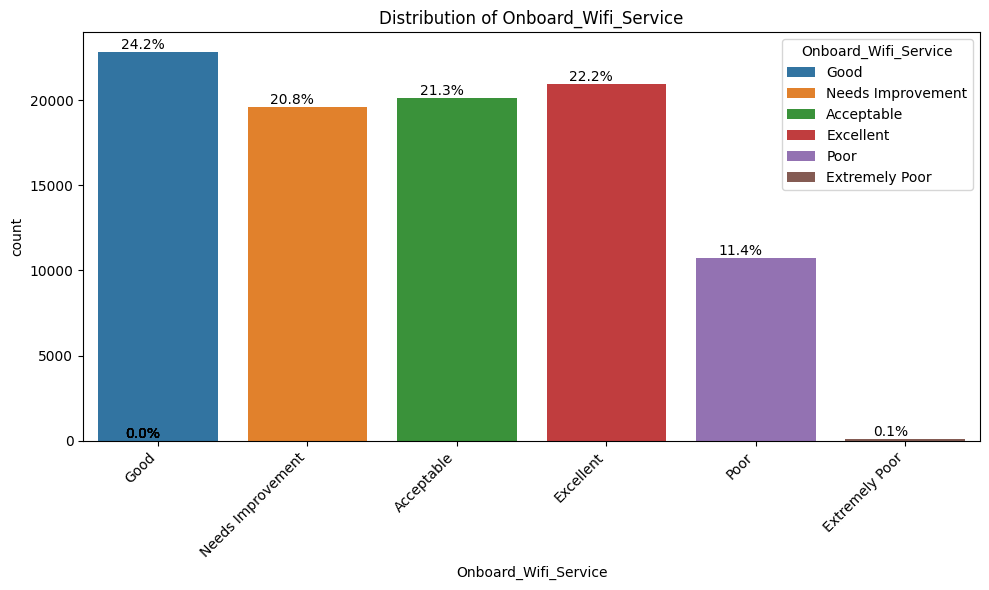

----------------------------------------------------------------------


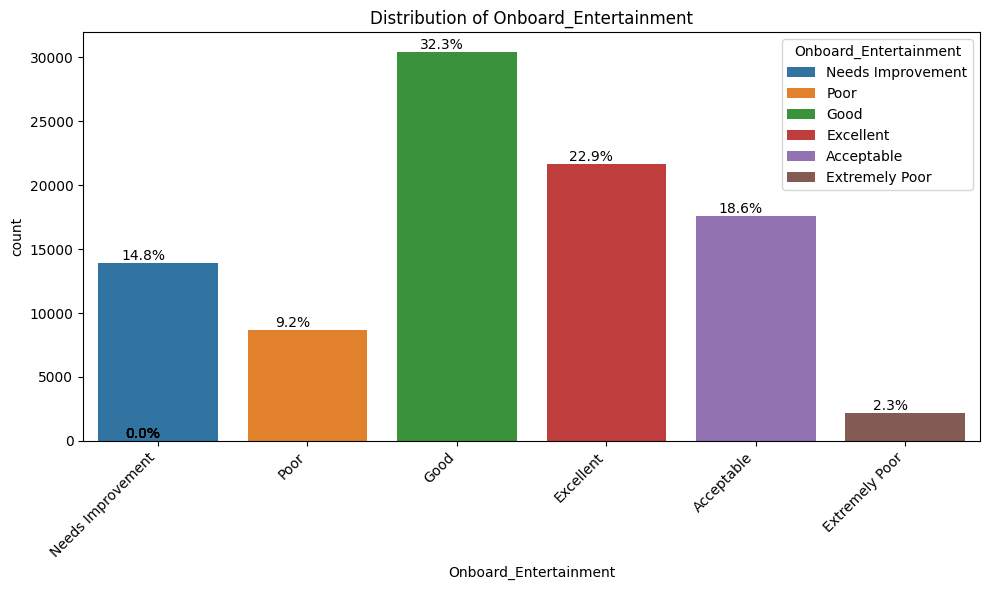

----------------------------------------------------------------------


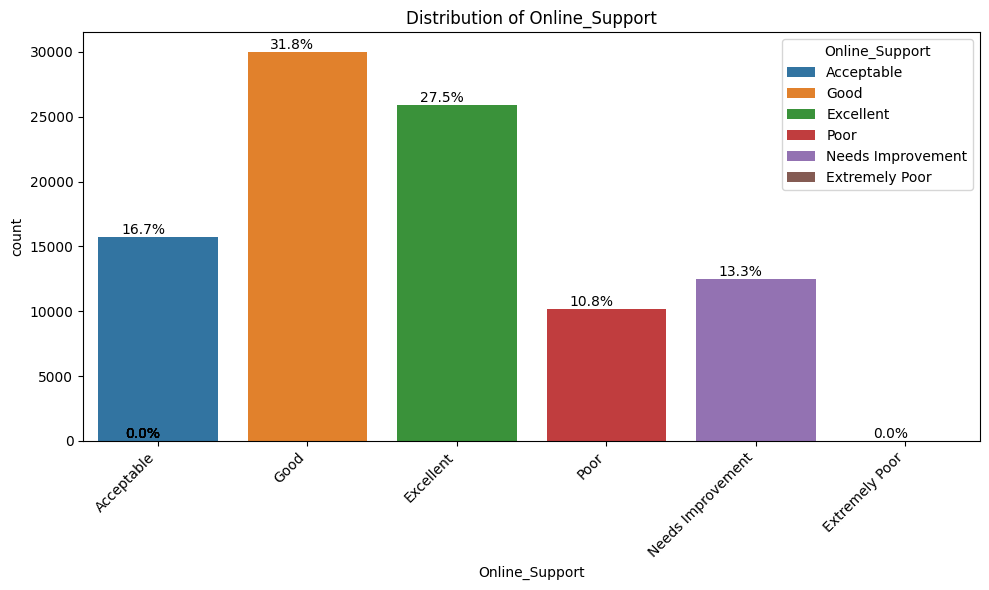

----------------------------------------------------------------------


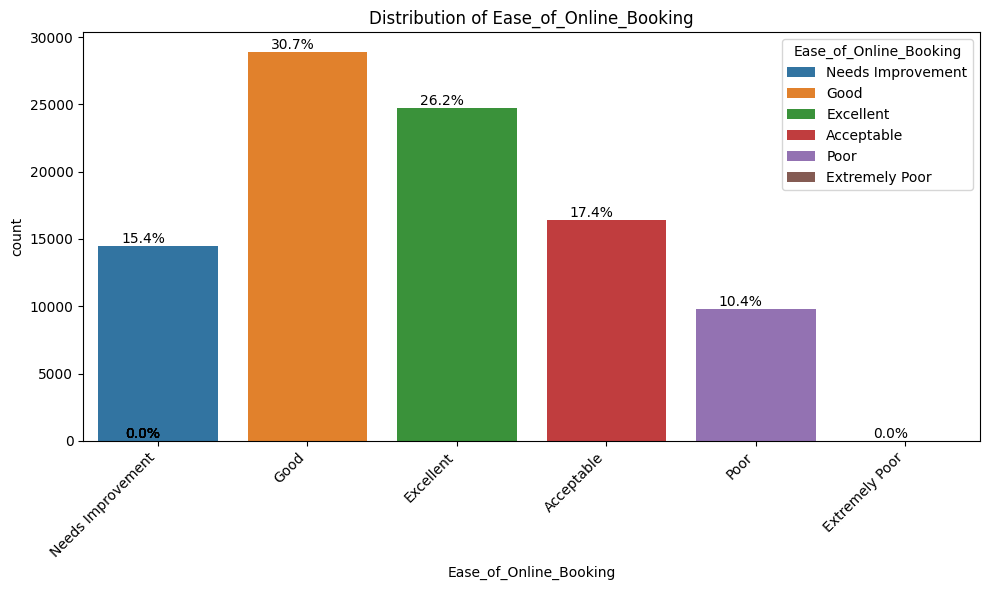

----------------------------------------------------------------------


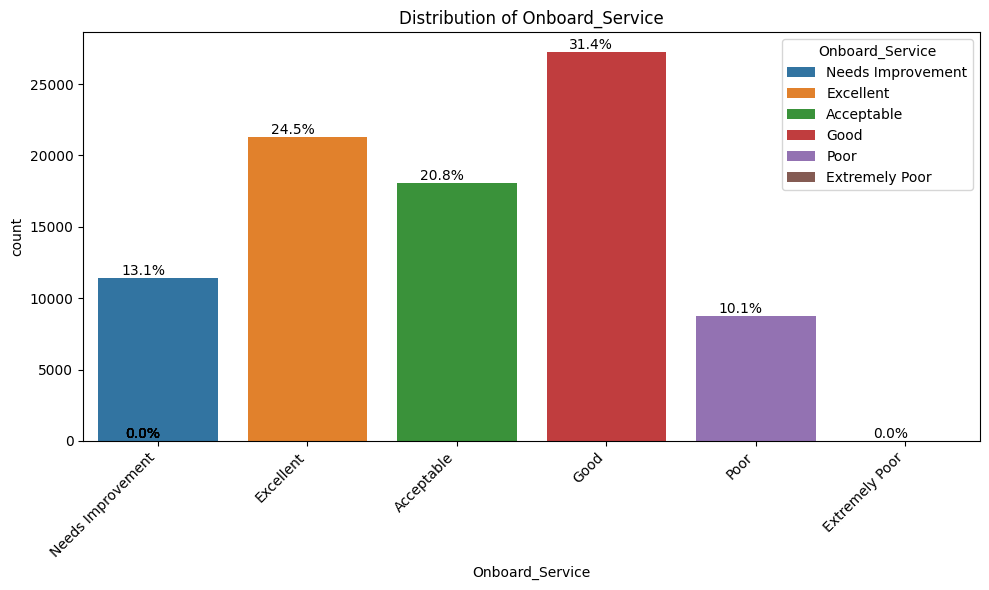

----------------------------------------------------------------------


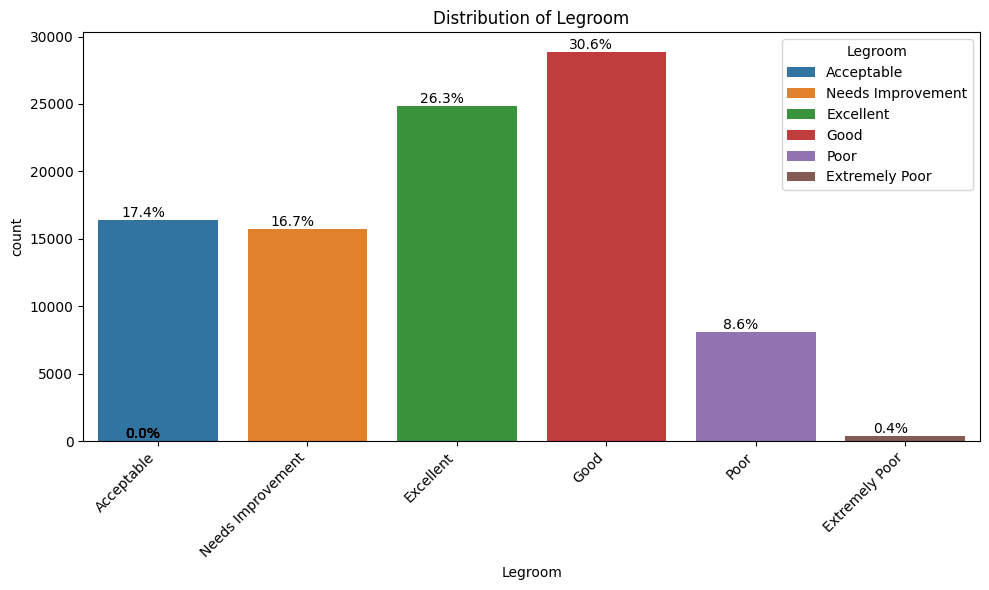

----------------------------------------------------------------------


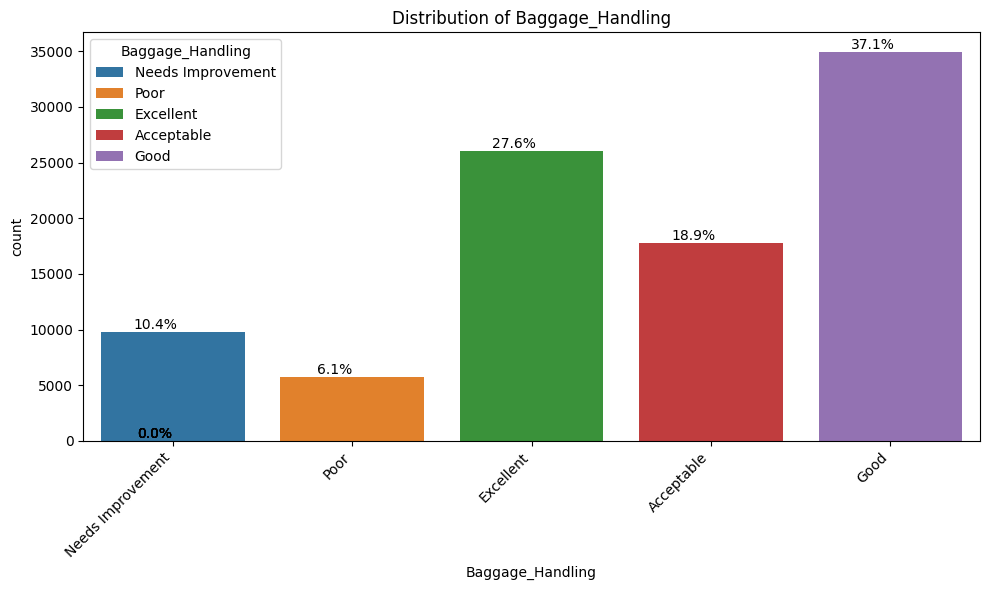

----------------------------------------------------------------------


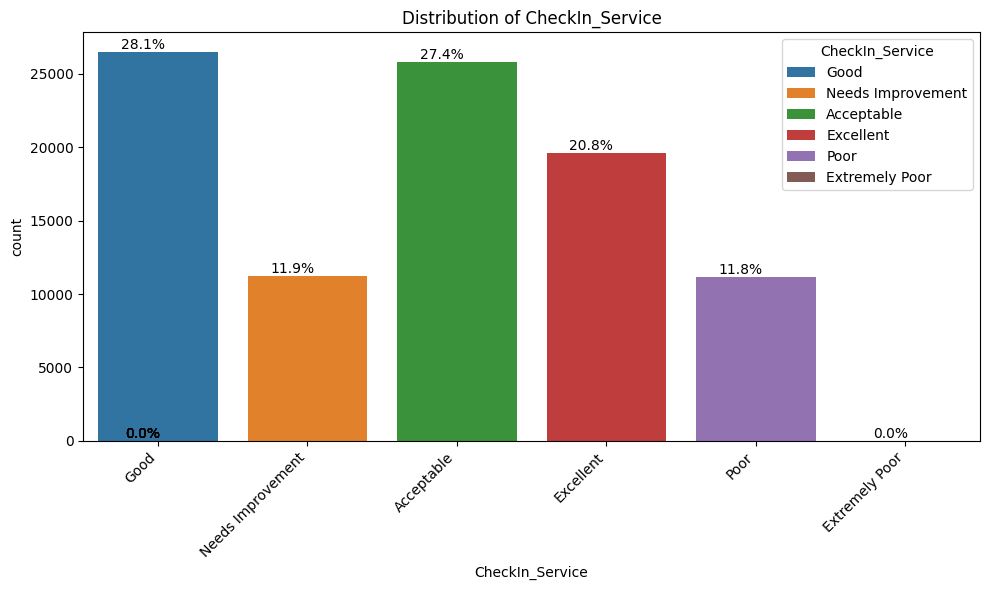

----------------------------------------------------------------------


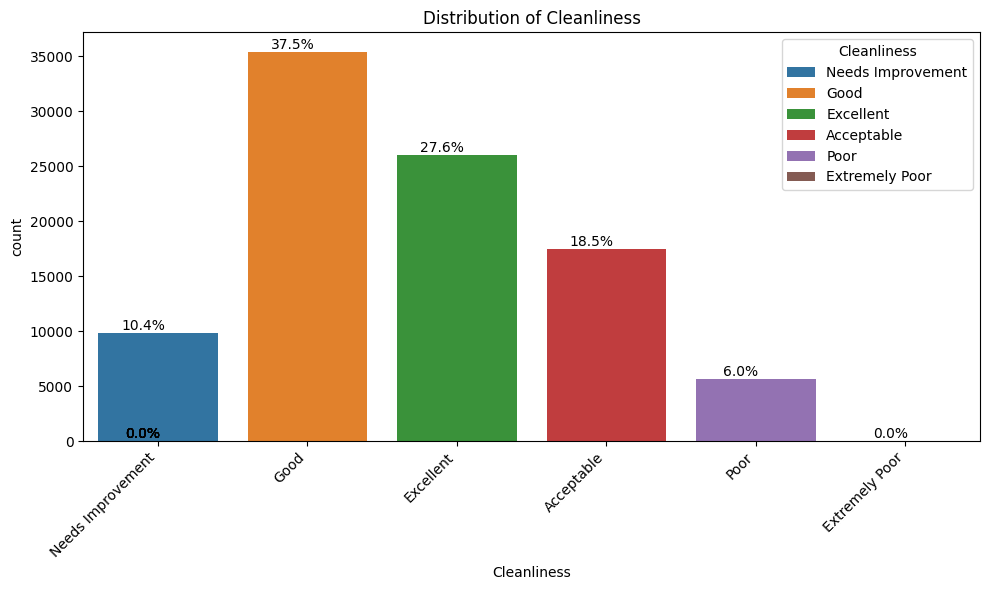

----------------------------------------------------------------------


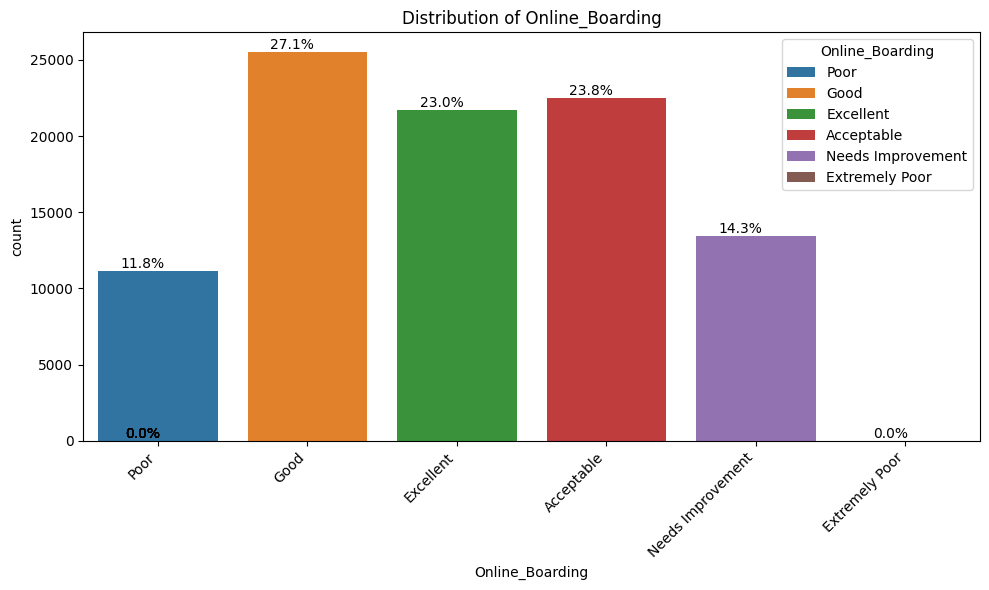

----------------------------------------------------------------------


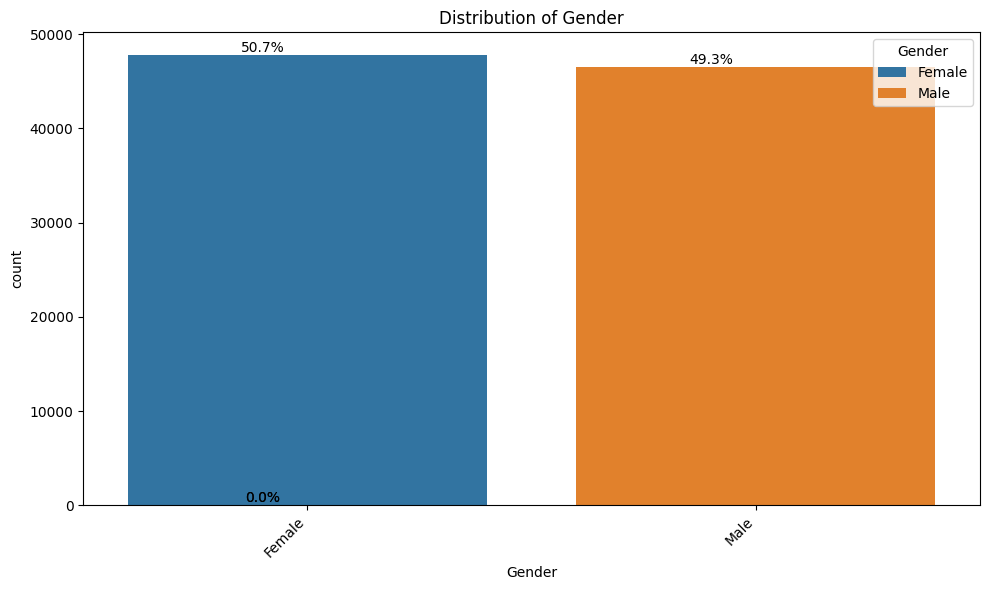

----------------------------------------------------------------------


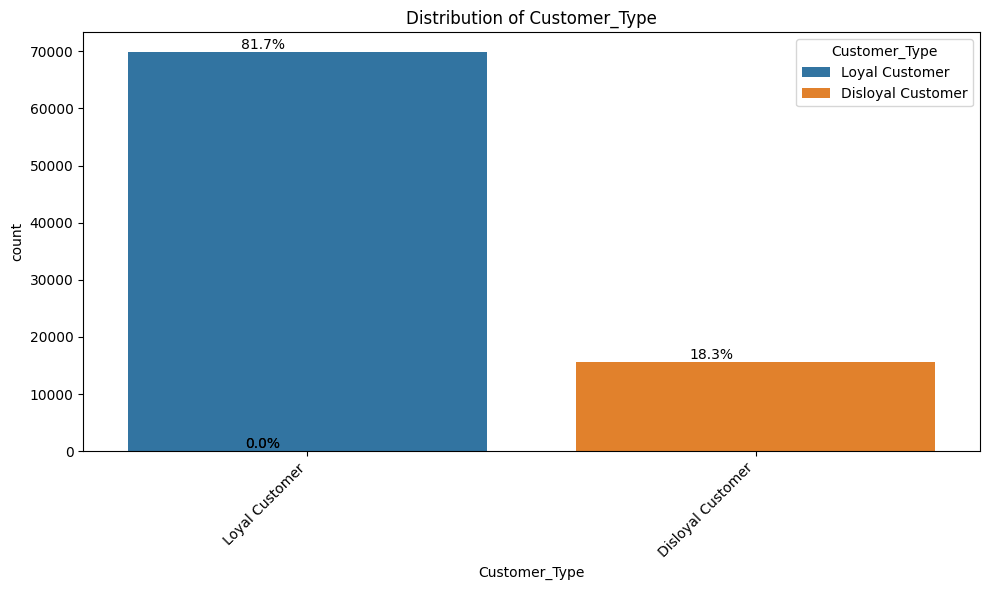

----------------------------------------------------------------------


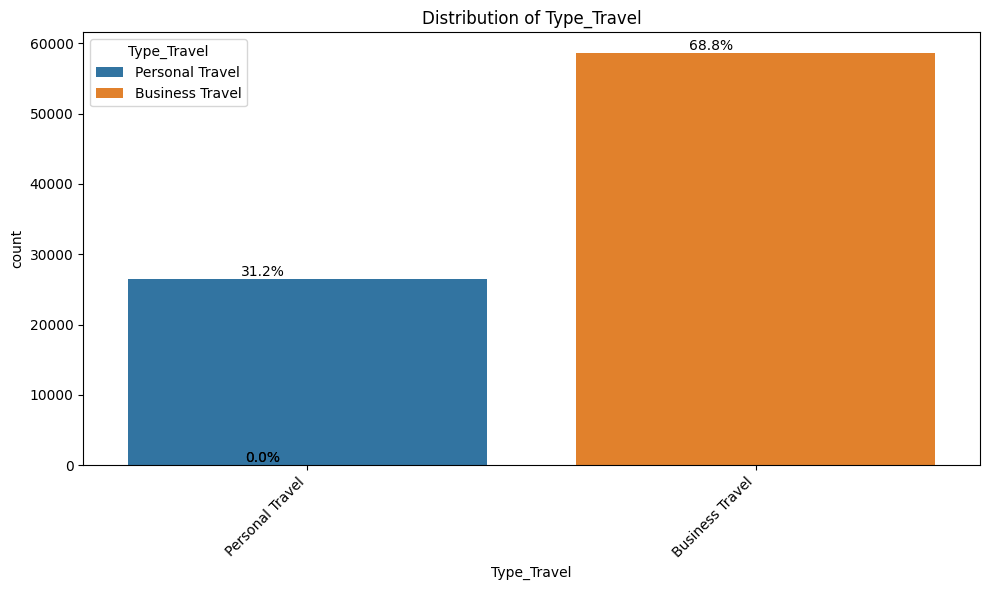

----------------------------------------------------------------------


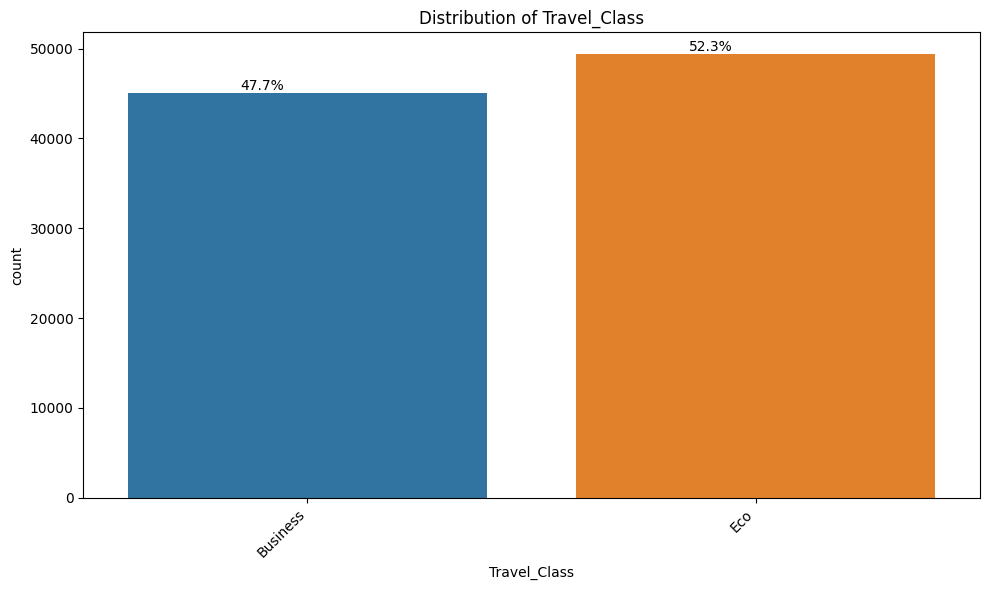

----------------------------------------------------------------------


In [18]:
for col in cat_col:
  plt.figure(figsize=(10, 6)) # Adjust figure size for better readability
  ax = sns.countplot(data = df, x = col, hue = col) # Set hue to the column name to color bars differently
  plt.title(f'Distribution of {col}') # Add title to each plot
  plt.xticks(rotation = 45, ha='right') # Rotate labels and align them
  plt.tight_layout() # Adjust layout to prevent overlapping

  total = len(df[col].dropna()) # Calculate total count for percentage calculation

  for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total) # Calculate percentage
    x = p.get_x() + p.get_width() / 2 - 0.1 # Adjust x-coordinate for text placement
    y = p.get_height() # Get height of the bar
    ax.annotate(percentage, (x, y), ha='center', va='bottom') # Add percentage text

  plt.show()
  print('----------------------------------------------------------------------')

### **Bivariate Analysis**

**Numerical to Numerical Analysis**

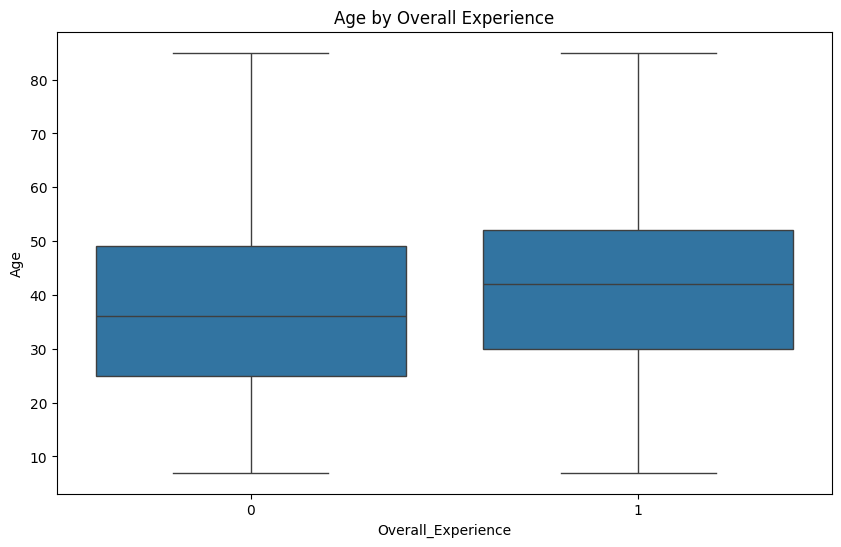

----------------------------------------------------------------------


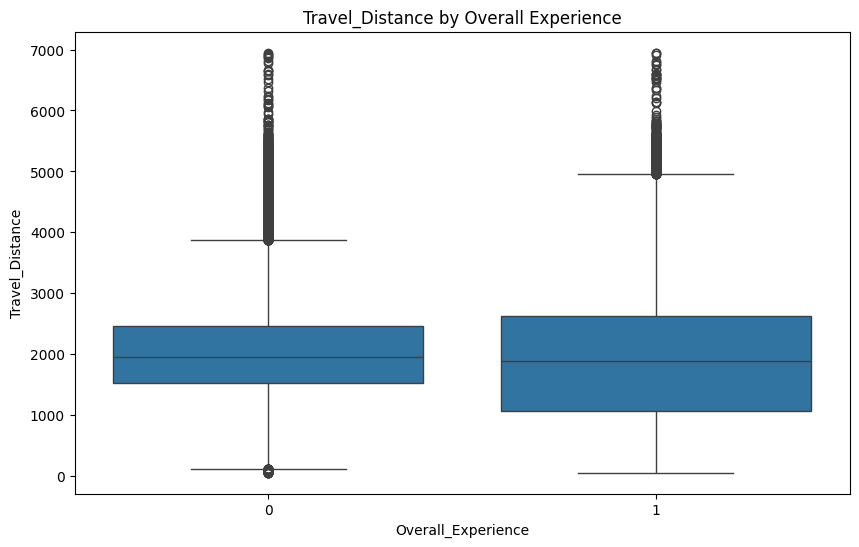

----------------------------------------------------------------------


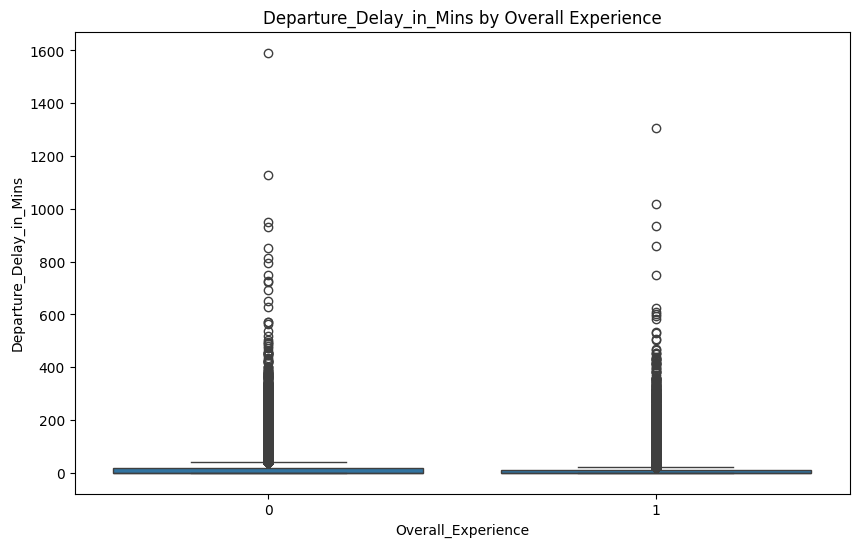

----------------------------------------------------------------------


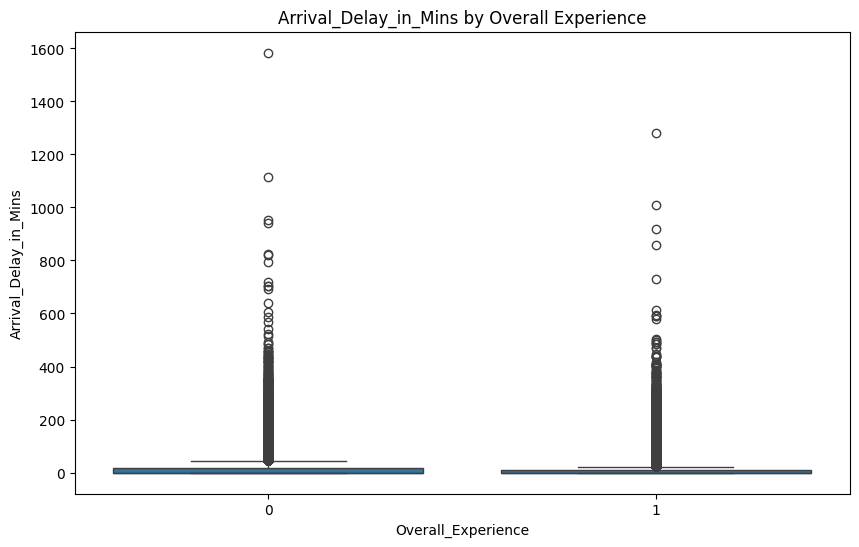

----------------------------------------------------------------------


In [19]:
for col in num_col:
    if col != 'Overall_Experience': # Exclude the target variable itself
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x='Overall_Experience', y=col)
        plt.title(f'{col} by Overall Experience')
        plt.show()
        print('----------------------------------------------------------------------')

**Categorical to Categorical Analysis**

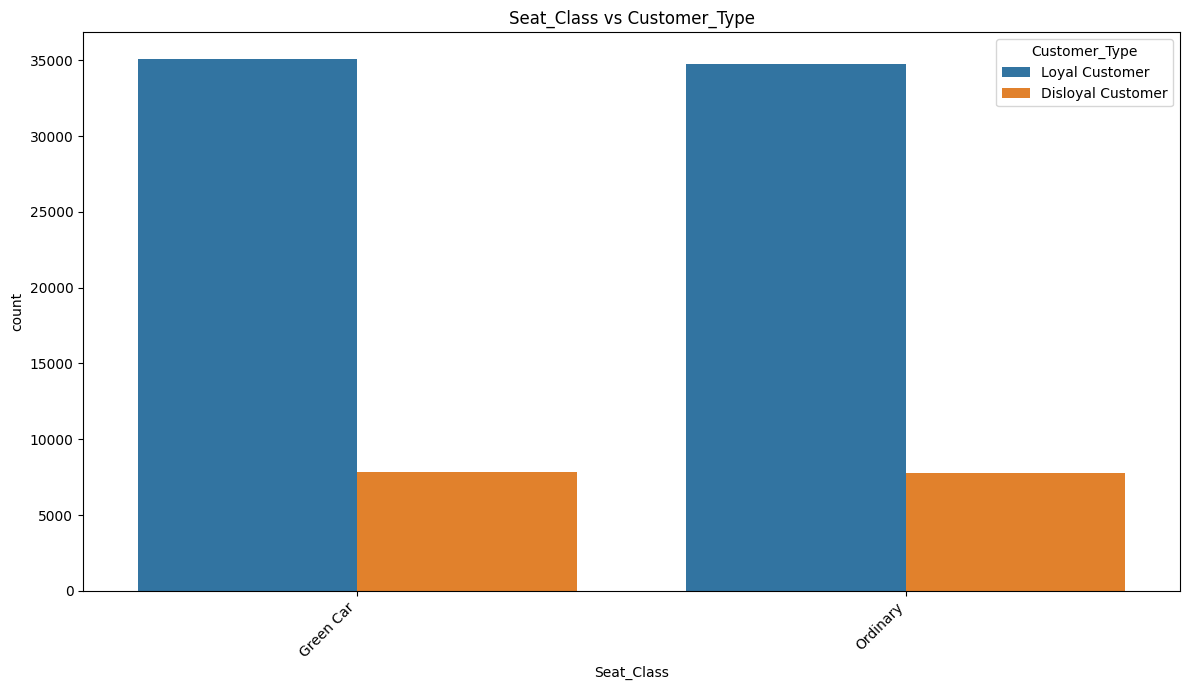

----------------------------------------------------------------------


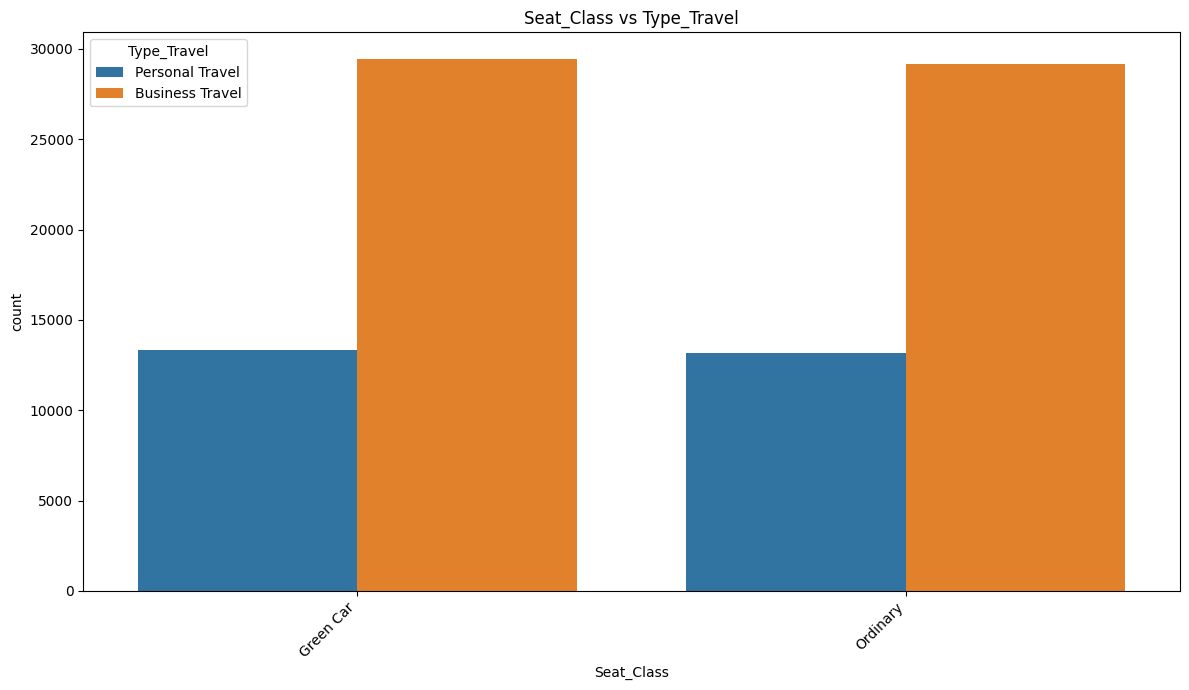

----------------------------------------------------------------------


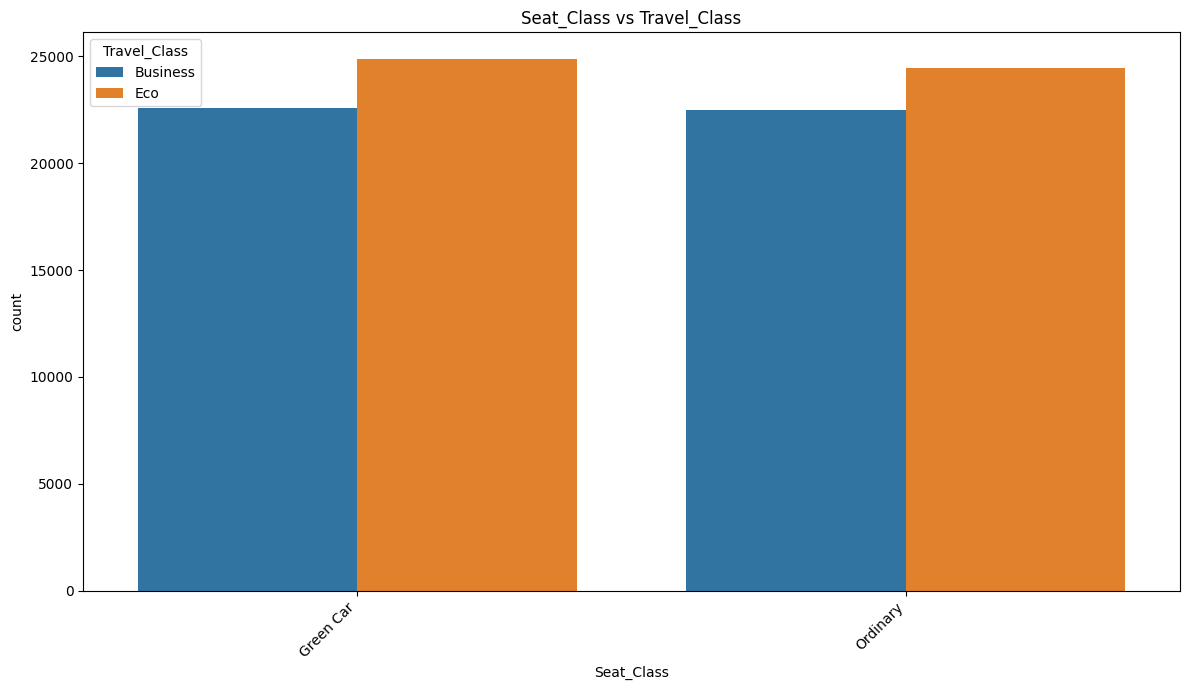

----------------------------------------------------------------------


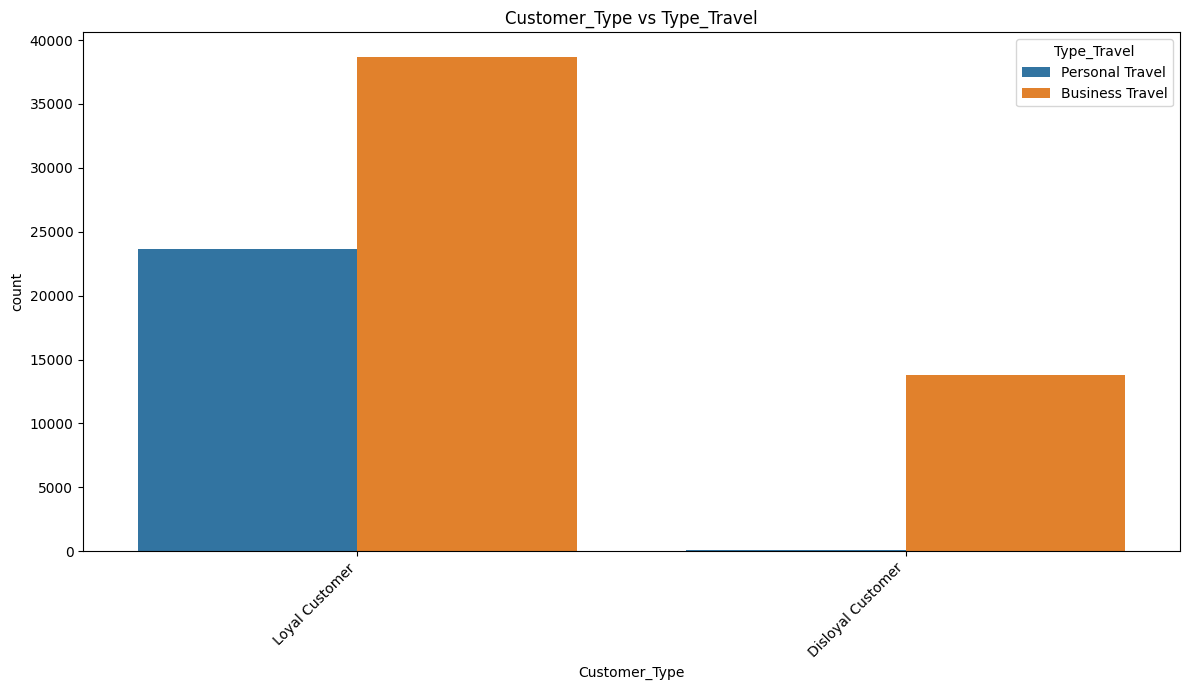

----------------------------------------------------------------------


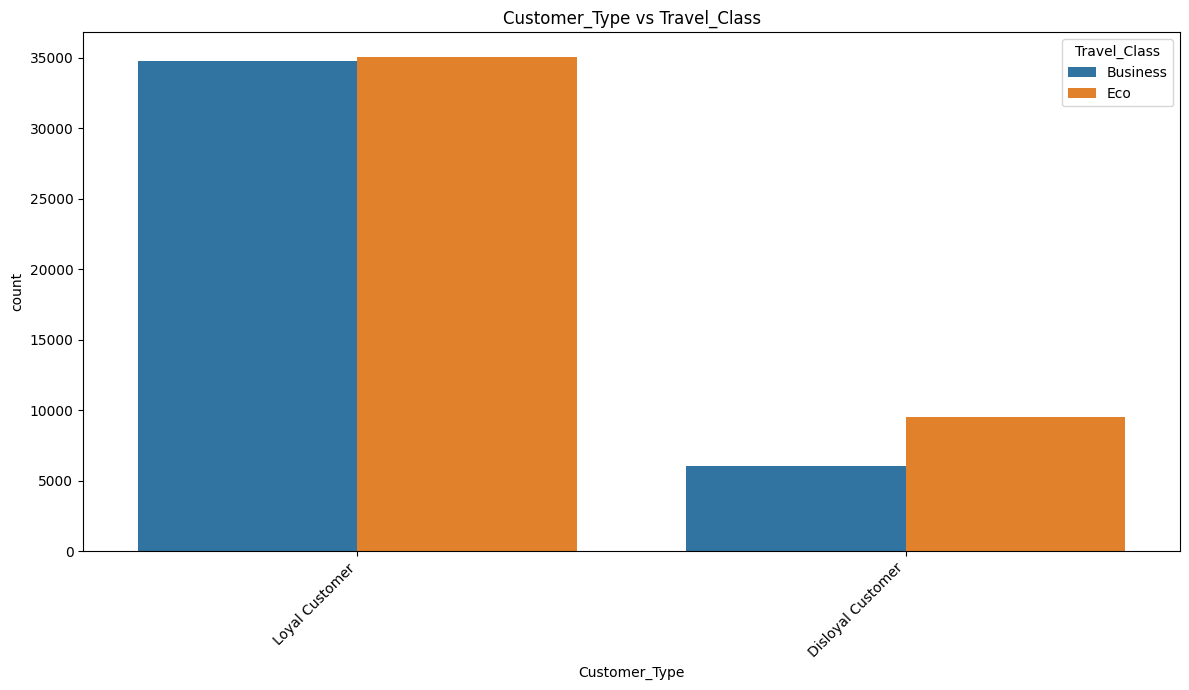

----------------------------------------------------------------------


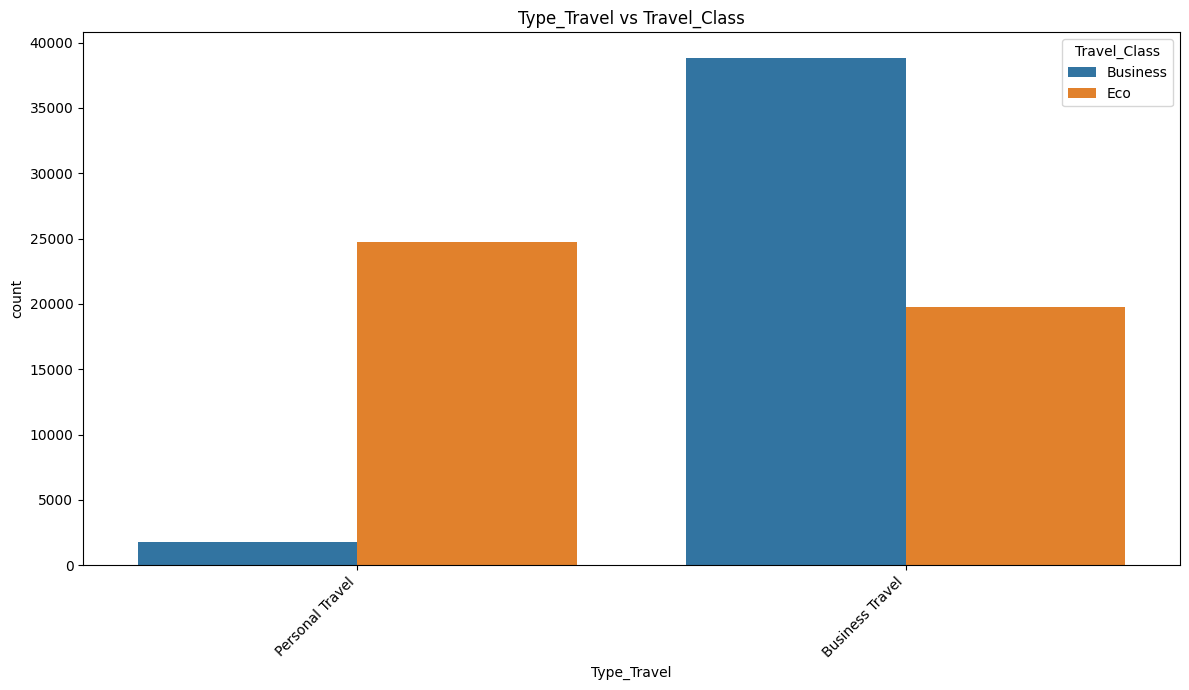

----------------------------------------------------------------------


In [20]:
# Select some key categorical columns for bivariate analysis with other categorical columns
cat_cols_subset = ['Seat_Class', 'Customer_Type', 'Type_Travel', 'Travel_Class']

for i in range(len(cat_cols_subset)):
    for j in range(i + 1, len(cat_cols_subset)):
        col1 = cat_cols_subset[i]
        col2 = cat_cols_subset[j]
        plt.figure(figsize=(12, 7))
        sns.countplot(data=df, x=col1, hue=col2)
        plt.title(f'{col1} vs {col2}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        print('----------------------------------------------------------------------')

**Categorical to Numerical Analysis**

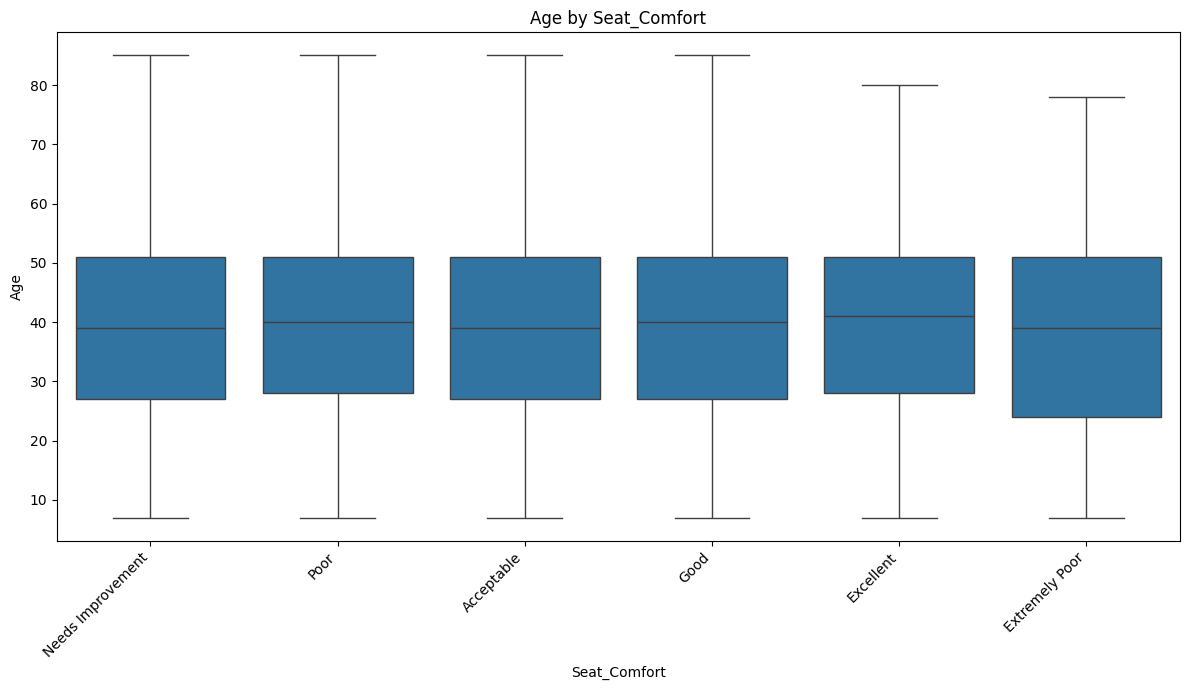

----------------------------------------------------------------------


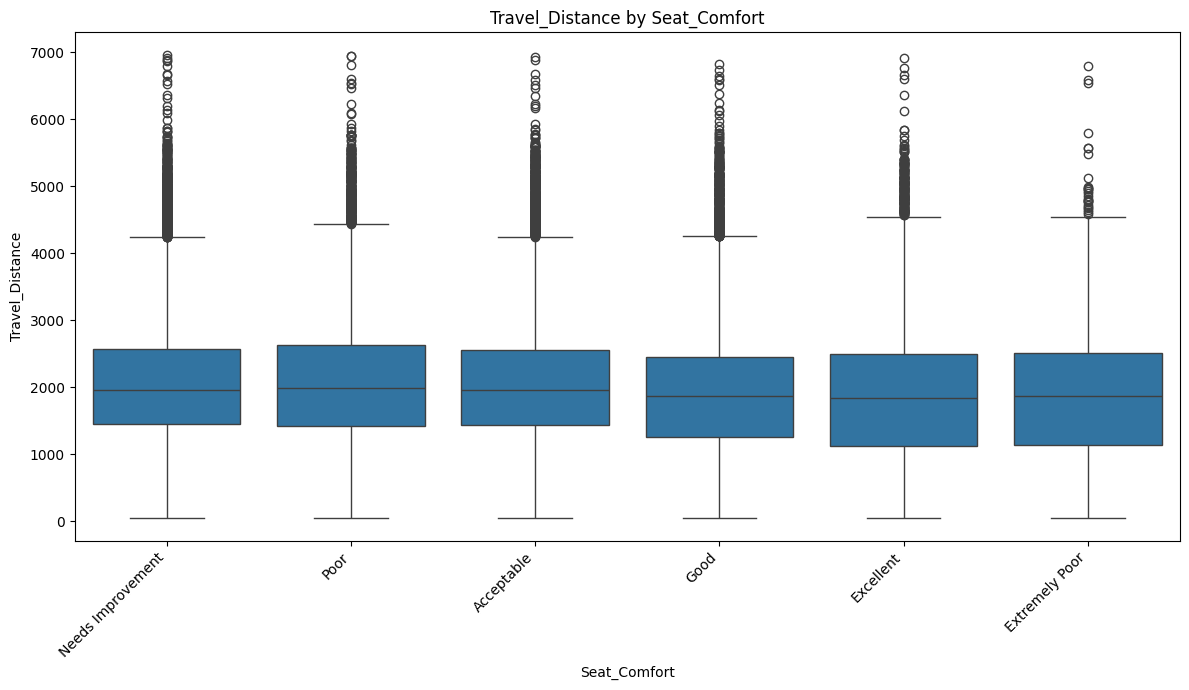

----------------------------------------------------------------------


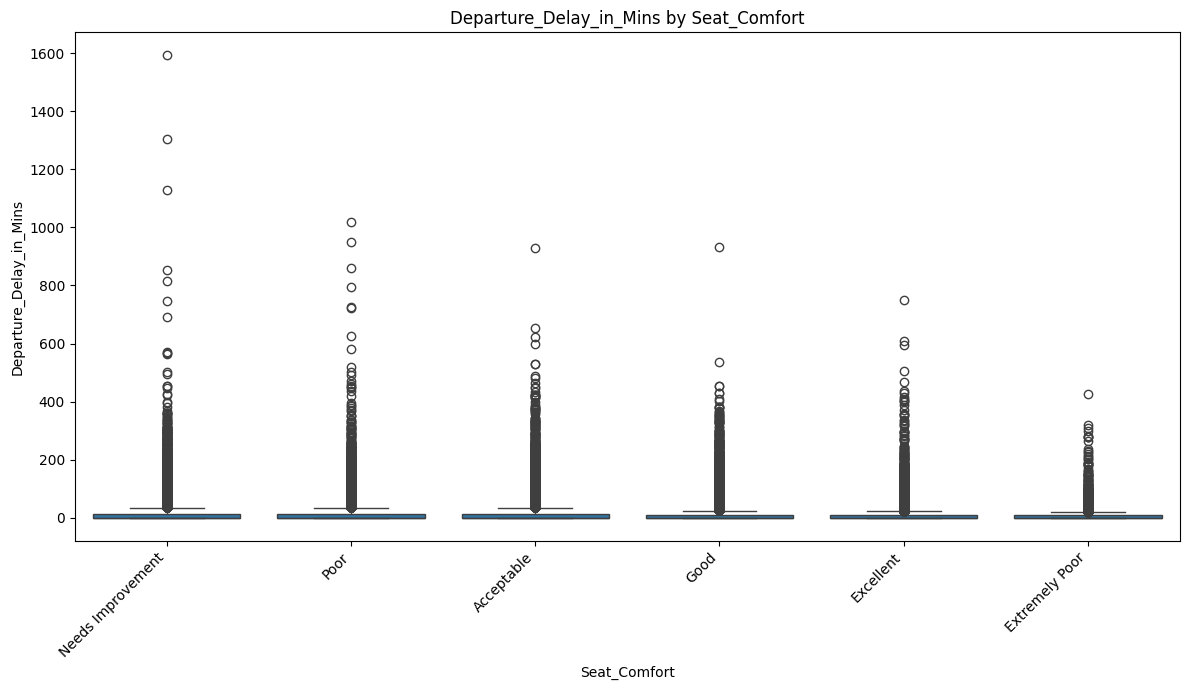

----------------------------------------------------------------------


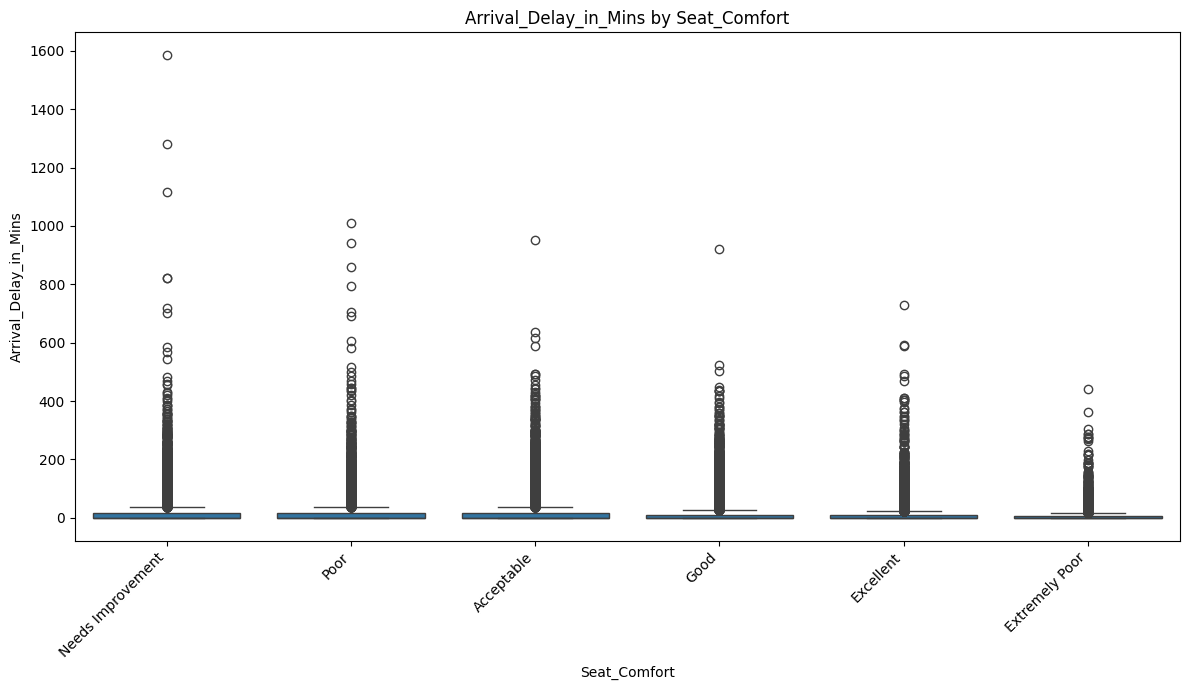

----------------------------------------------------------------------


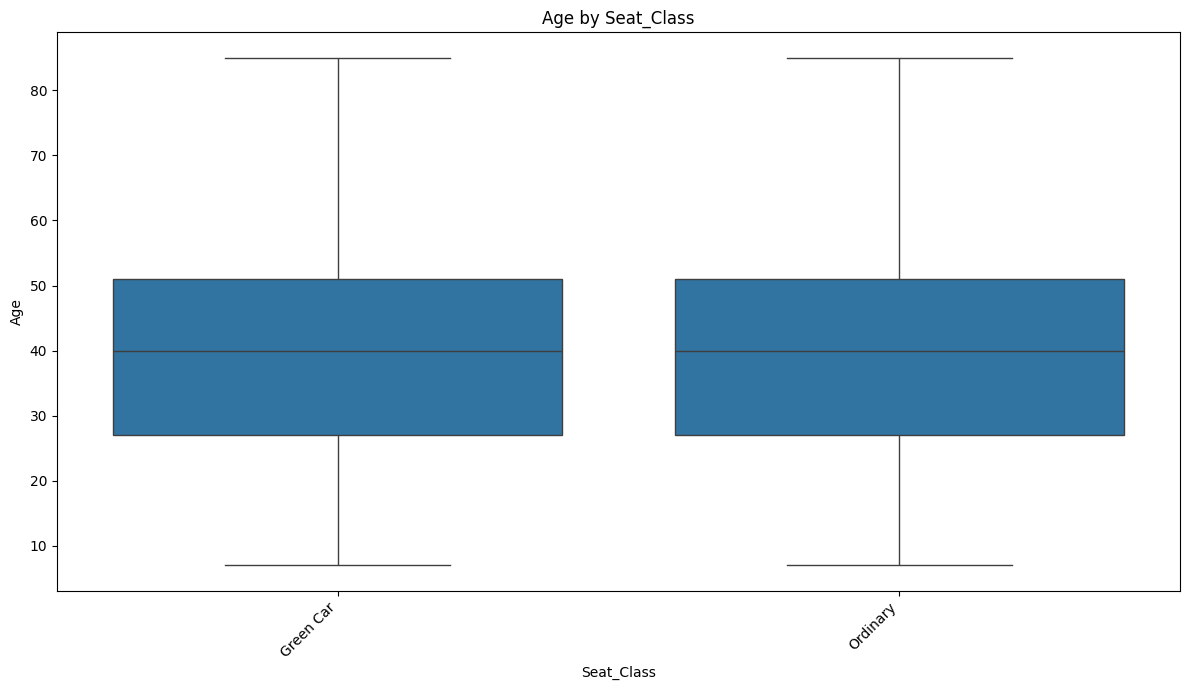

----------------------------------------------------------------------


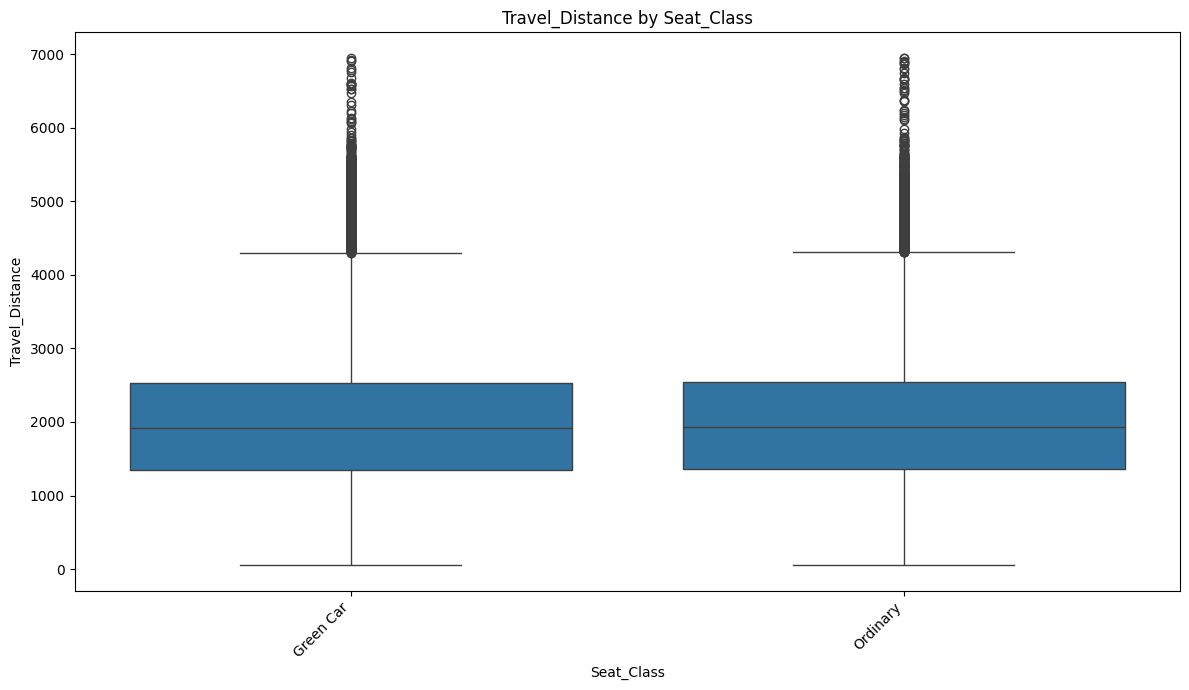

----------------------------------------------------------------------


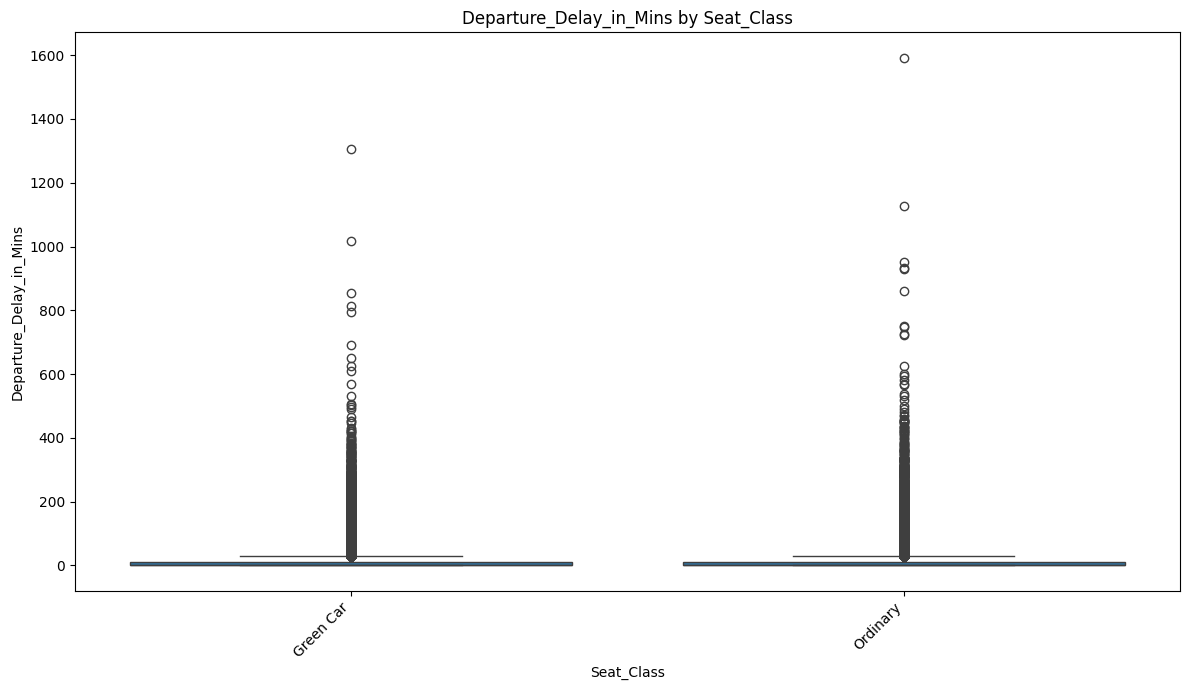

----------------------------------------------------------------------


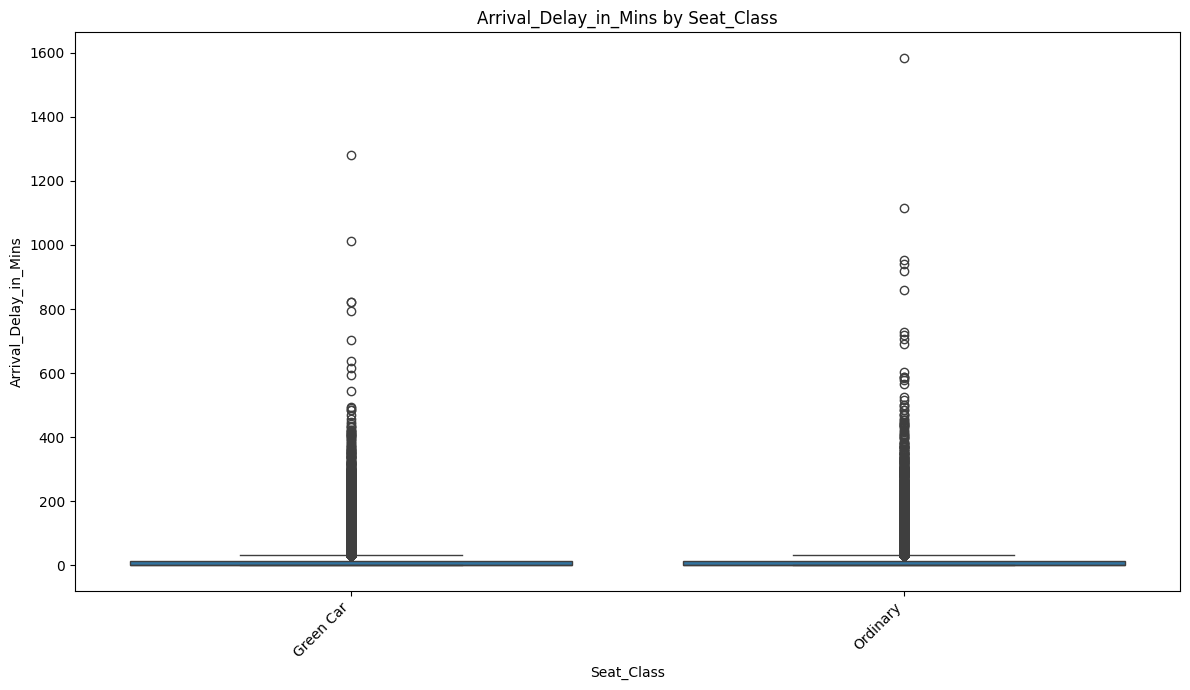

----------------------------------------------------------------------


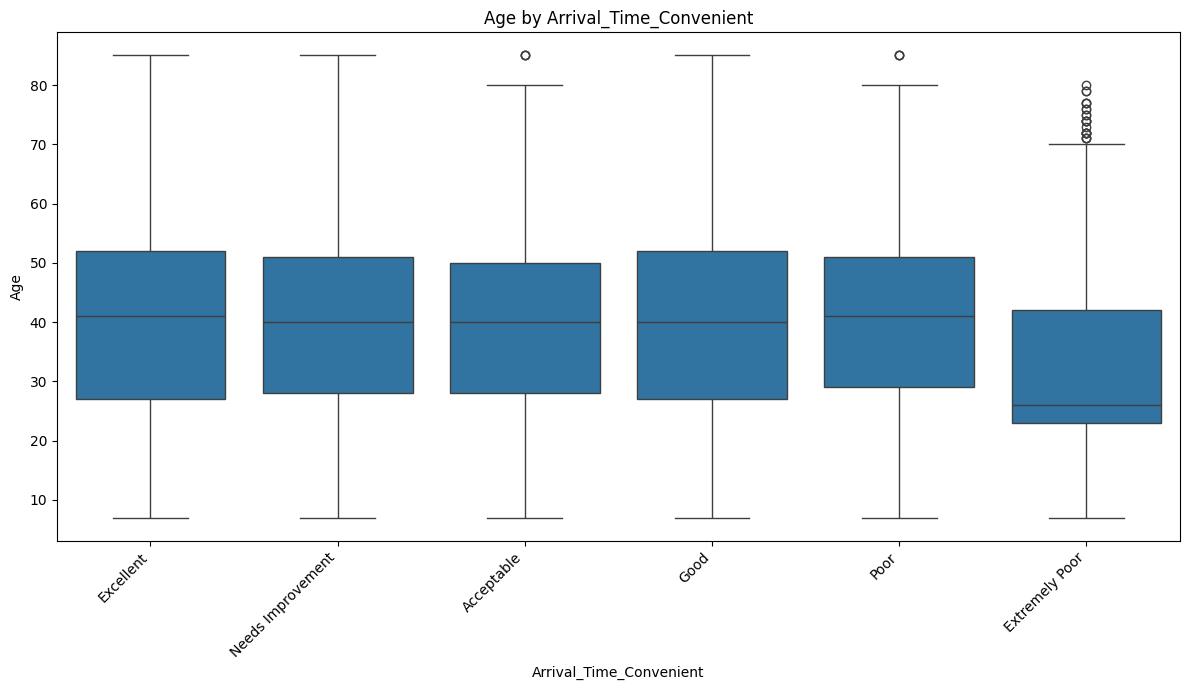

----------------------------------------------------------------------


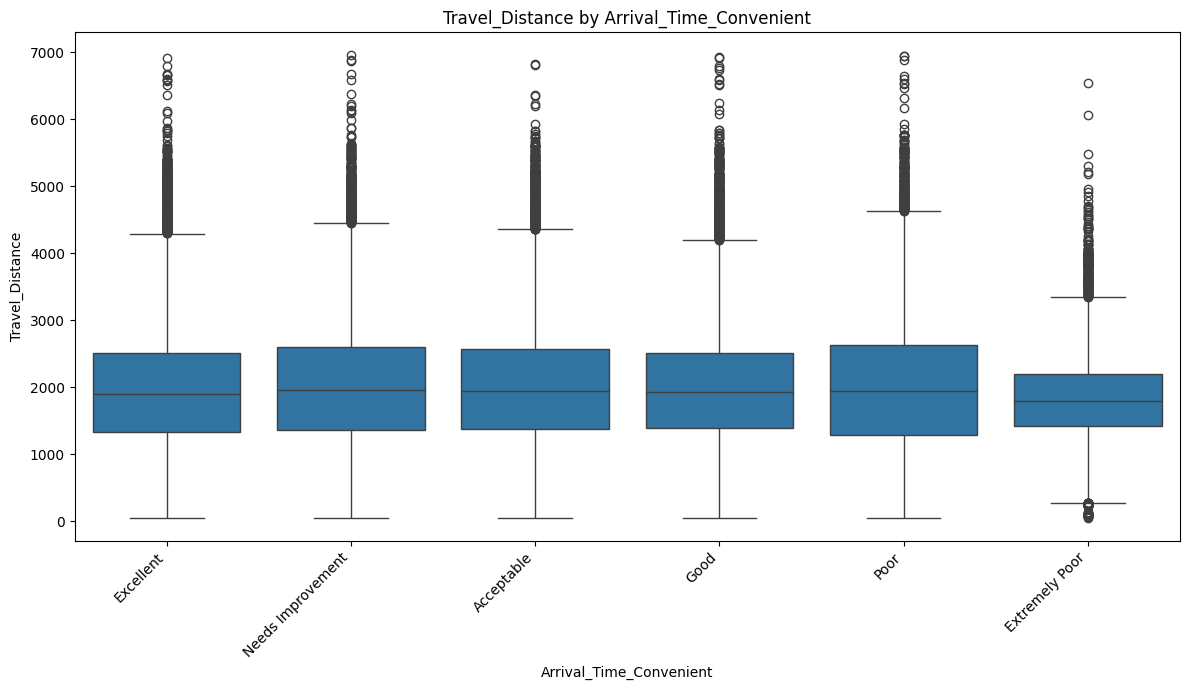

----------------------------------------------------------------------


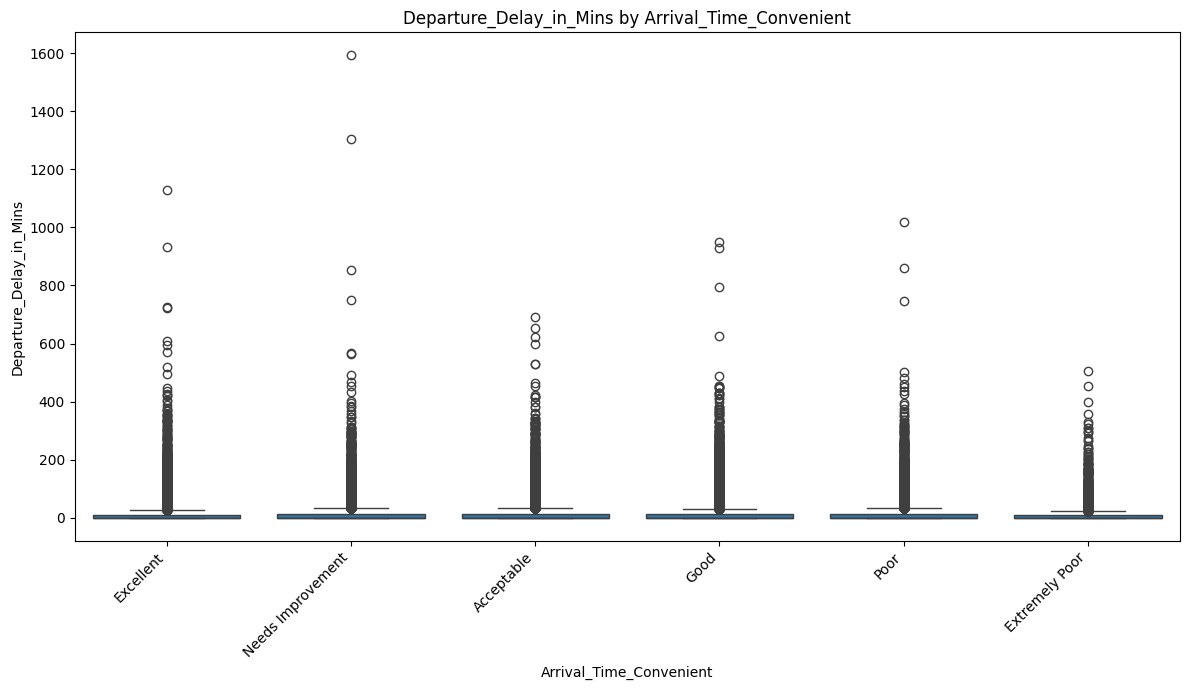

----------------------------------------------------------------------


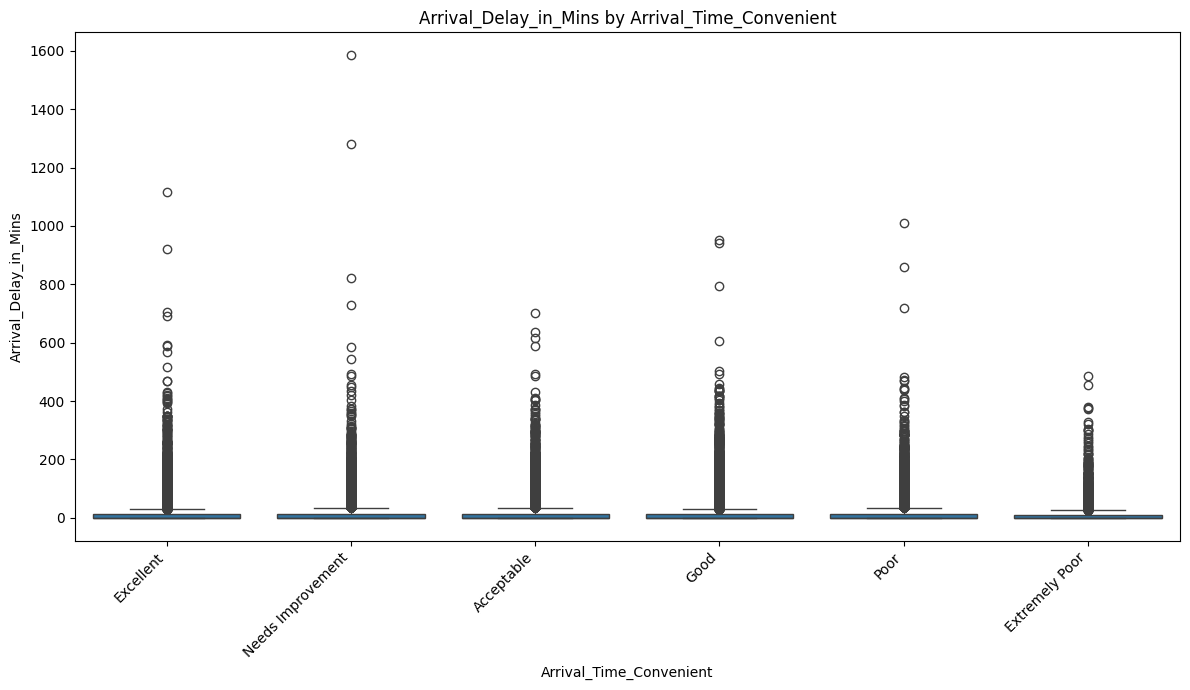

----------------------------------------------------------------------


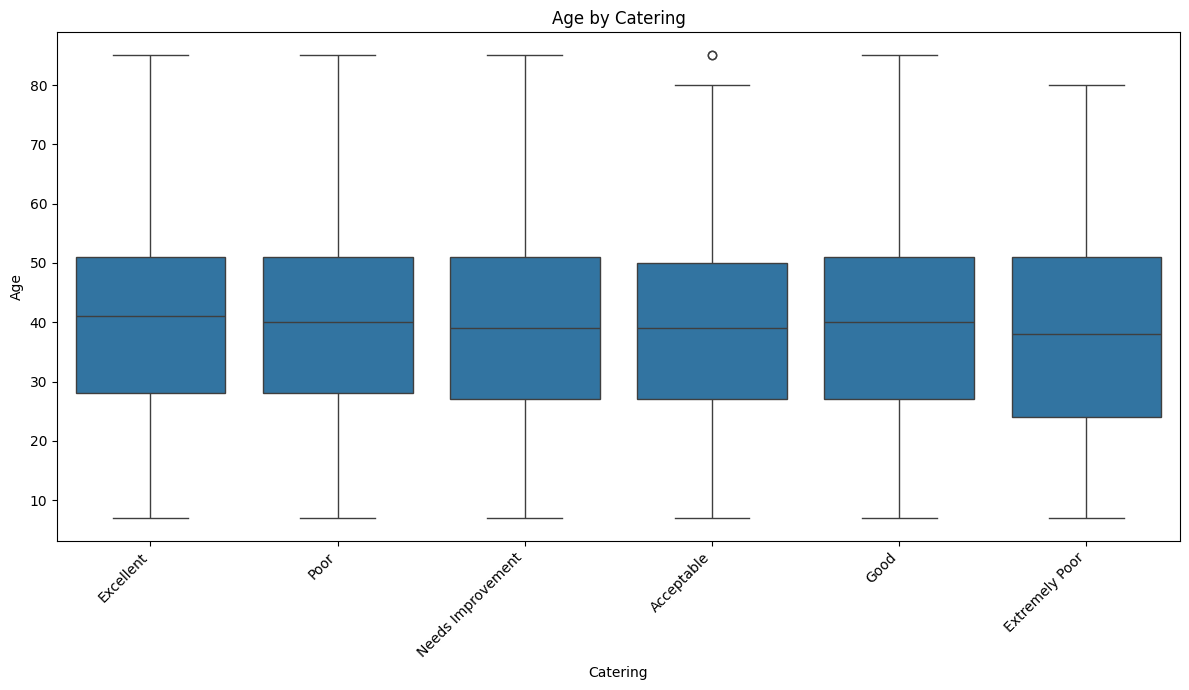

----------------------------------------------------------------------


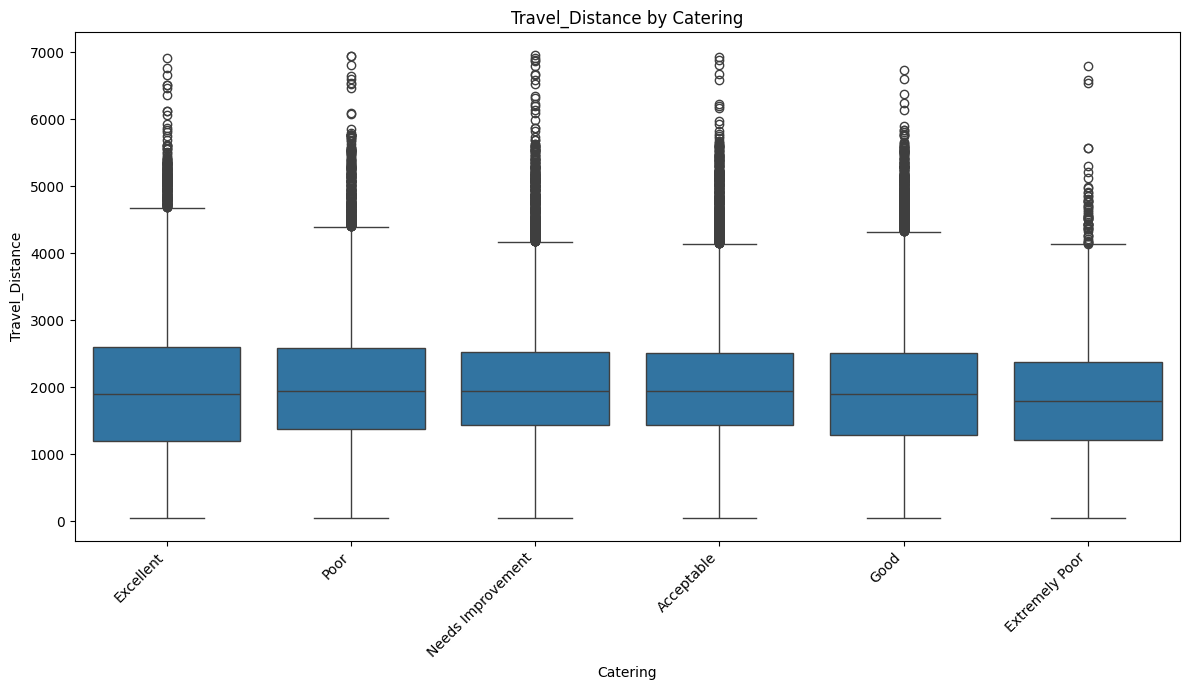

----------------------------------------------------------------------


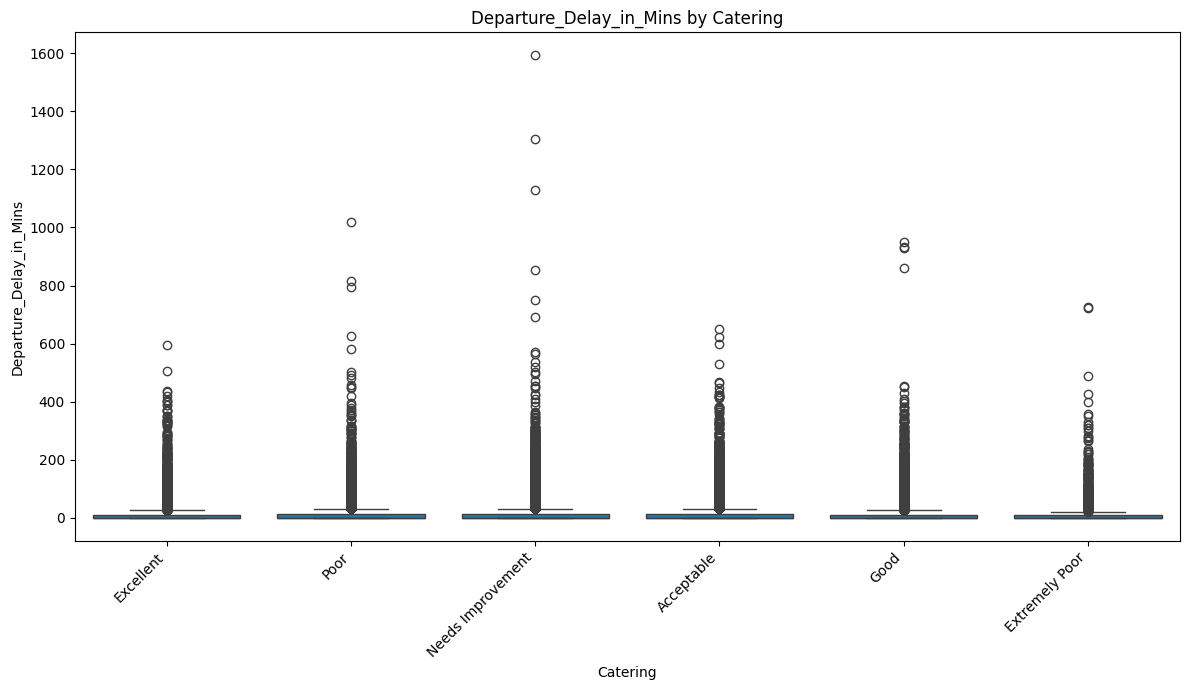

----------------------------------------------------------------------


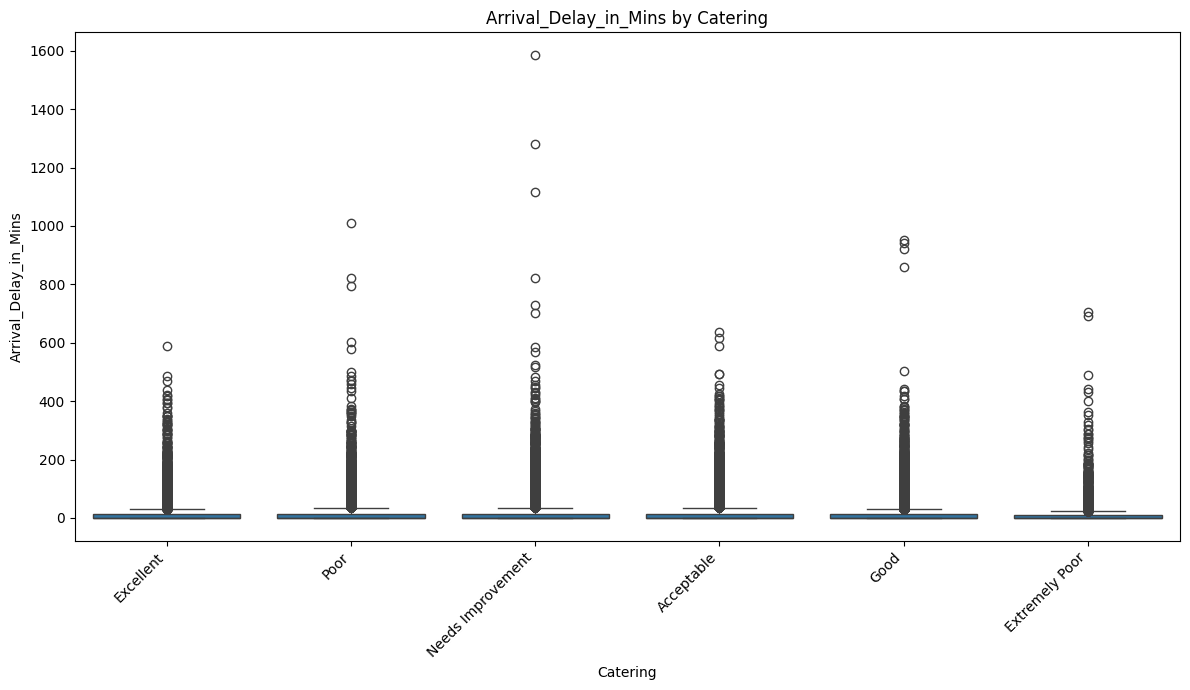

----------------------------------------------------------------------


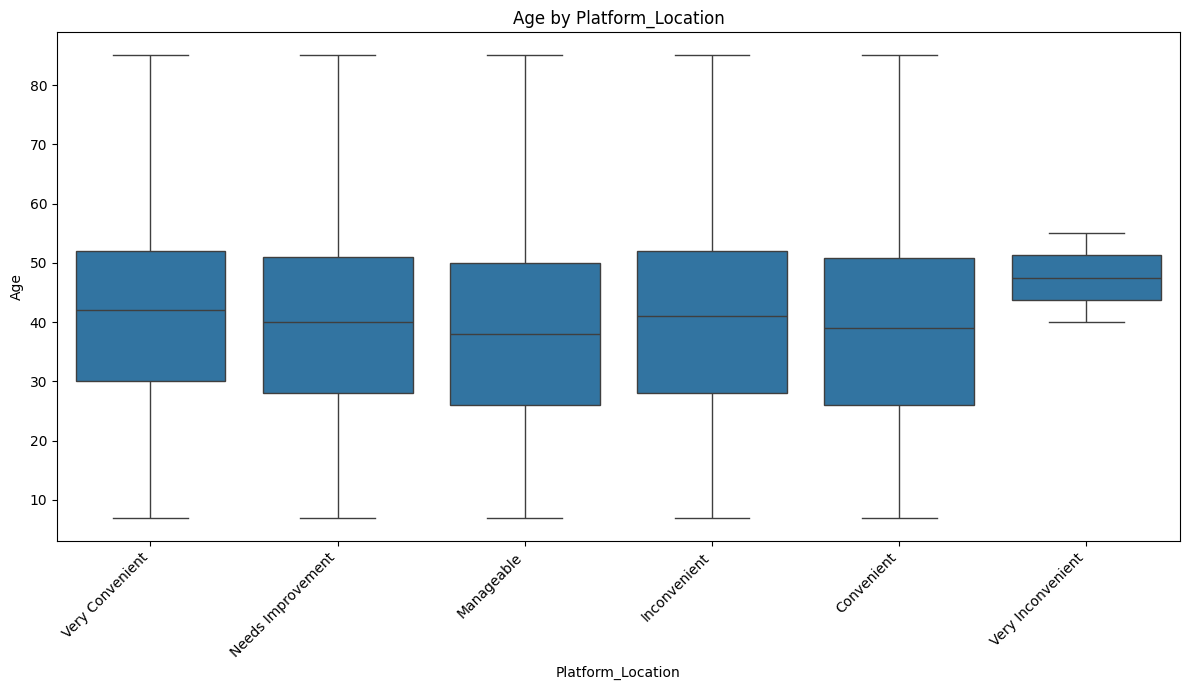

----------------------------------------------------------------------


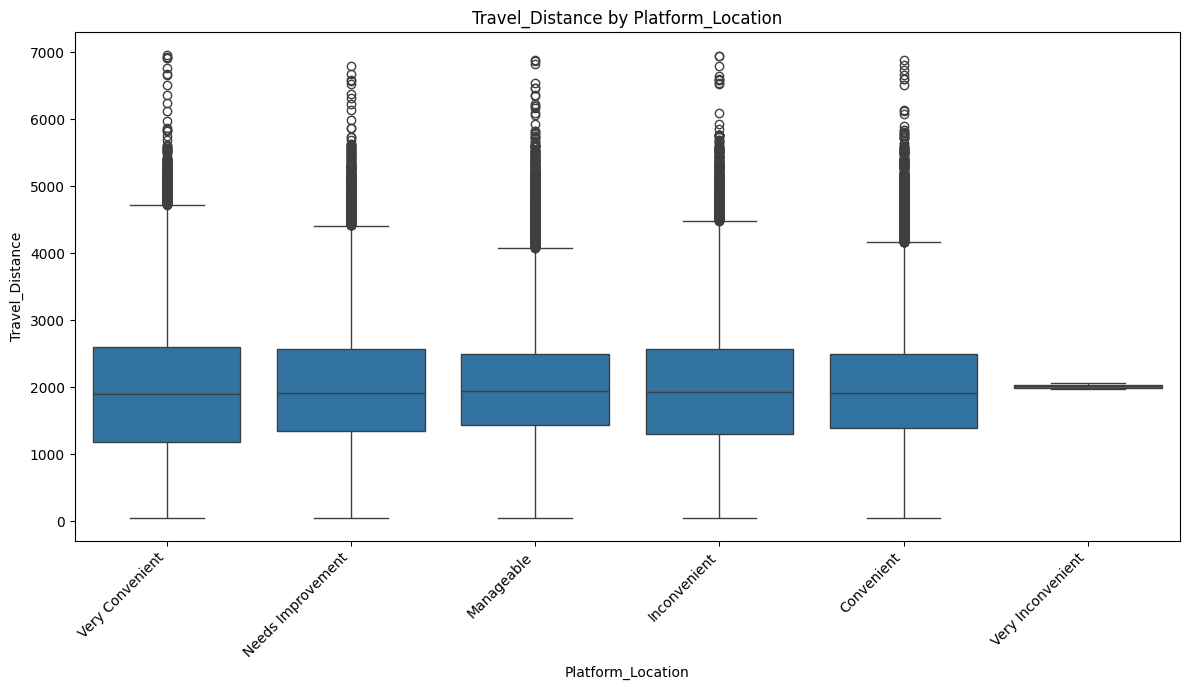

----------------------------------------------------------------------


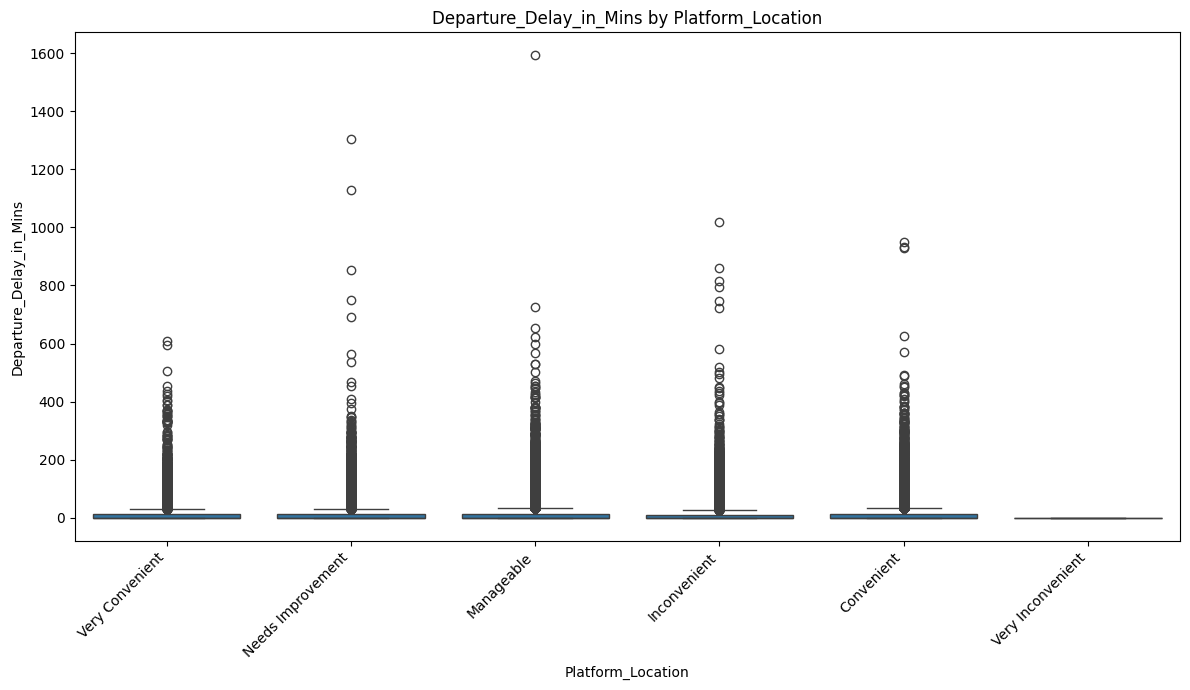

----------------------------------------------------------------------


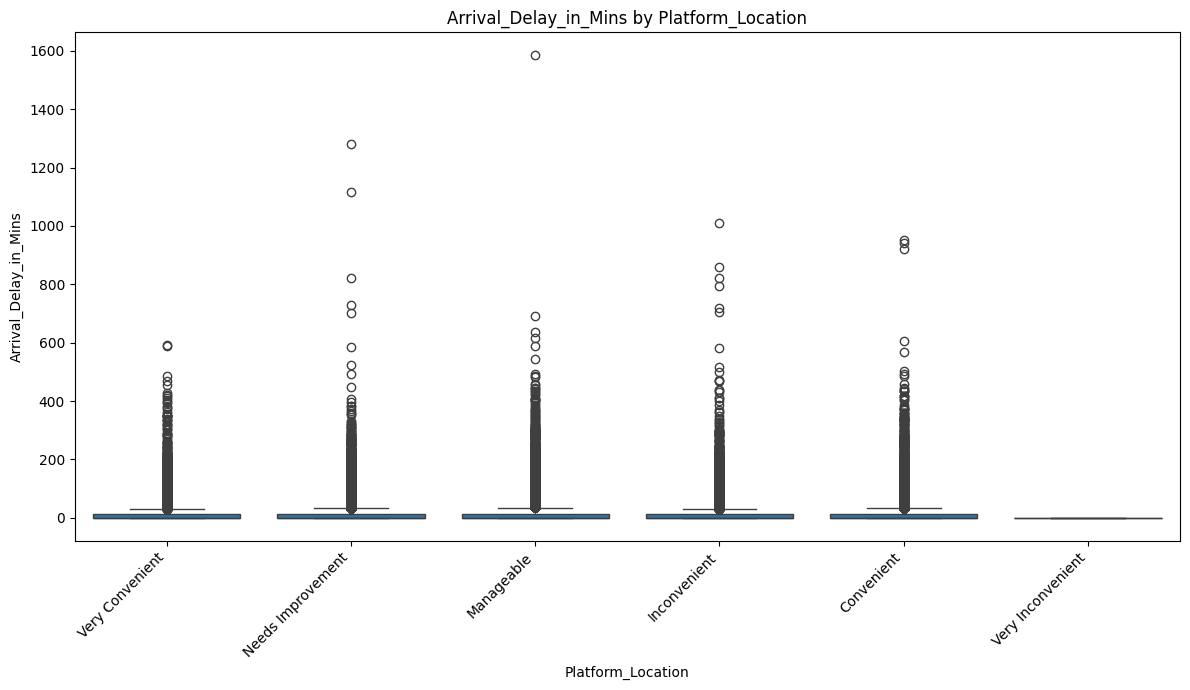

----------------------------------------------------------------------


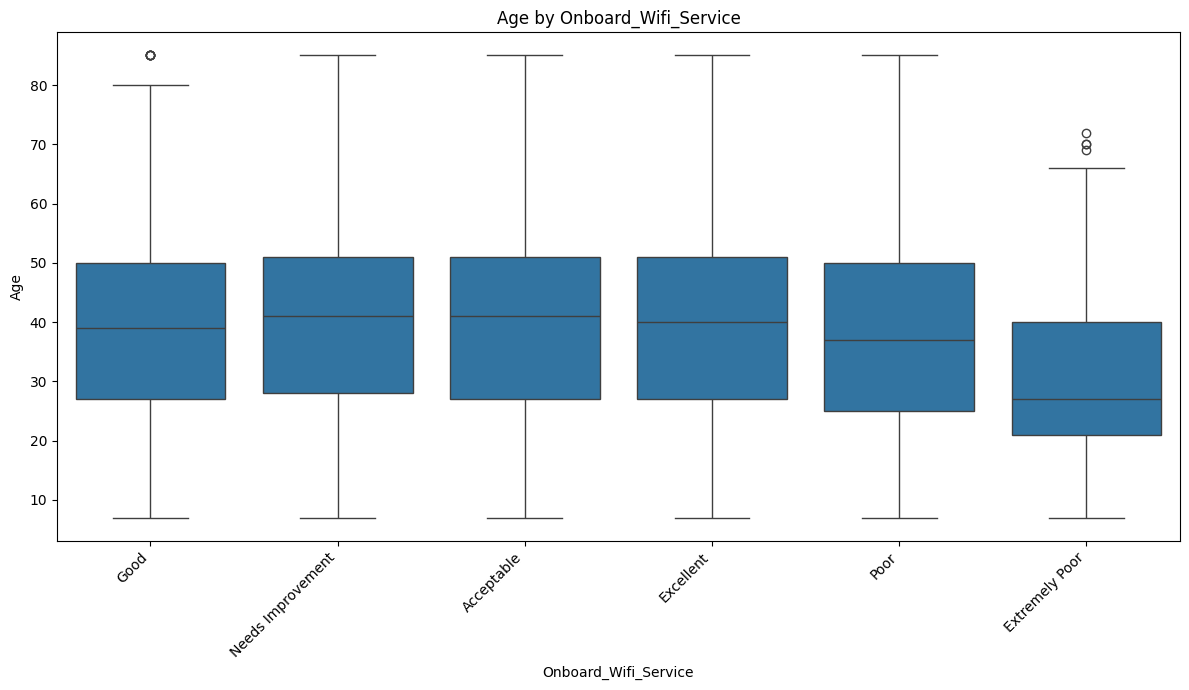

----------------------------------------------------------------------


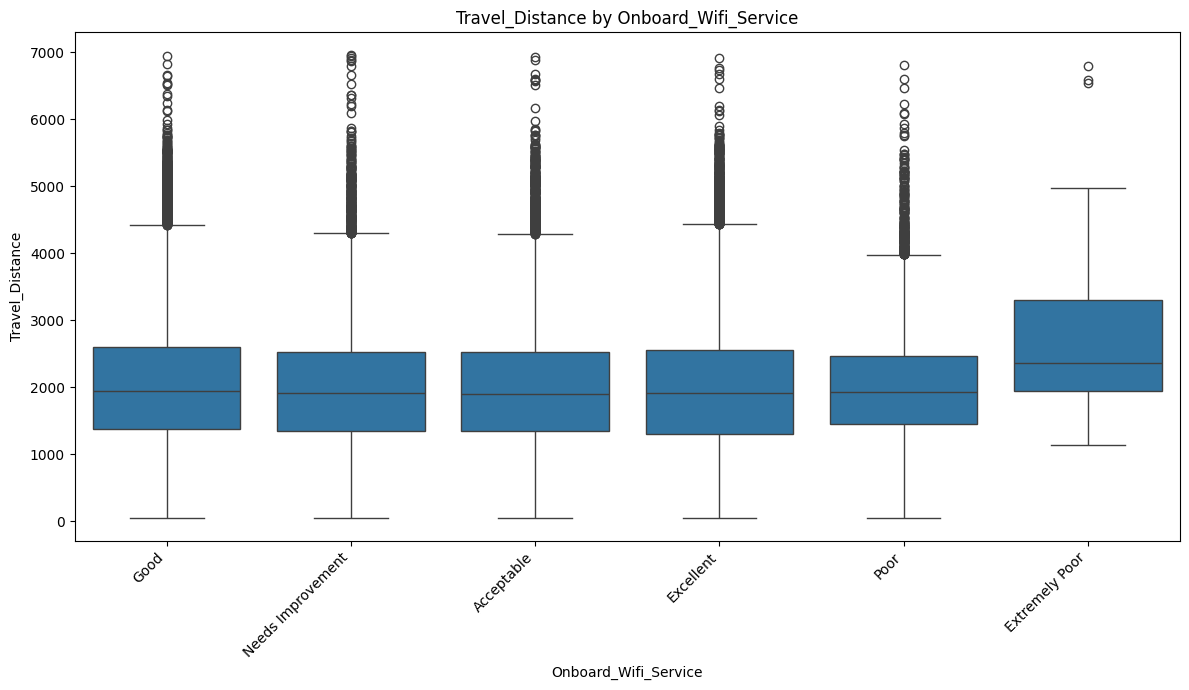

----------------------------------------------------------------------


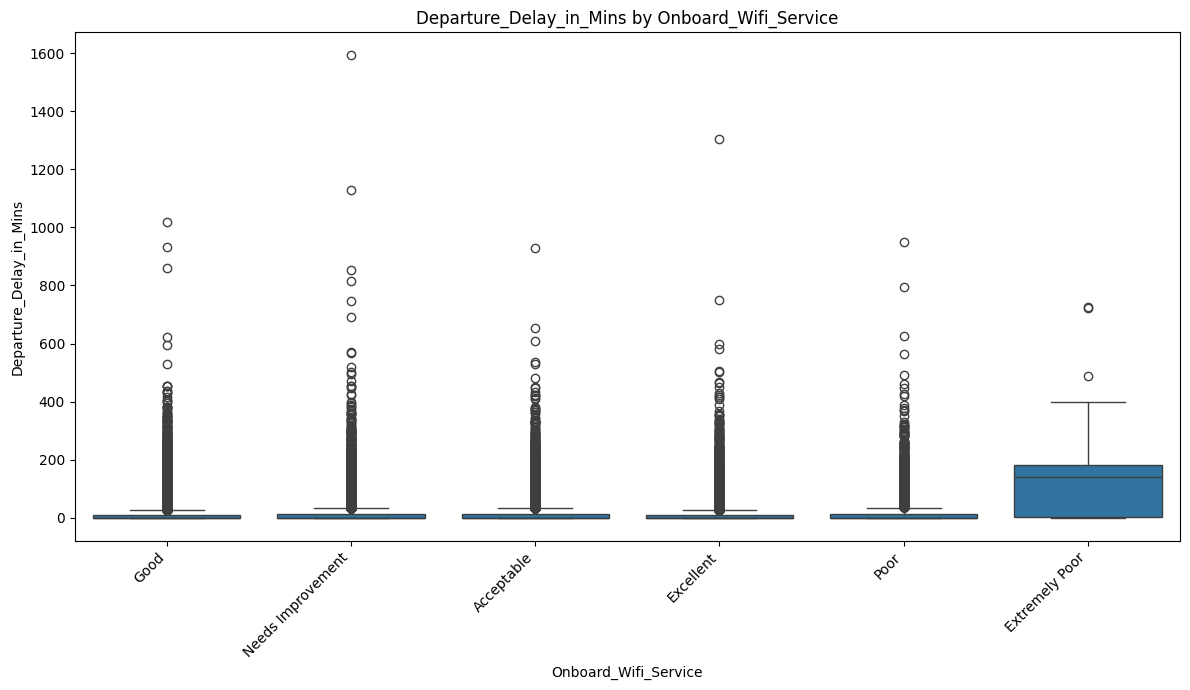

----------------------------------------------------------------------


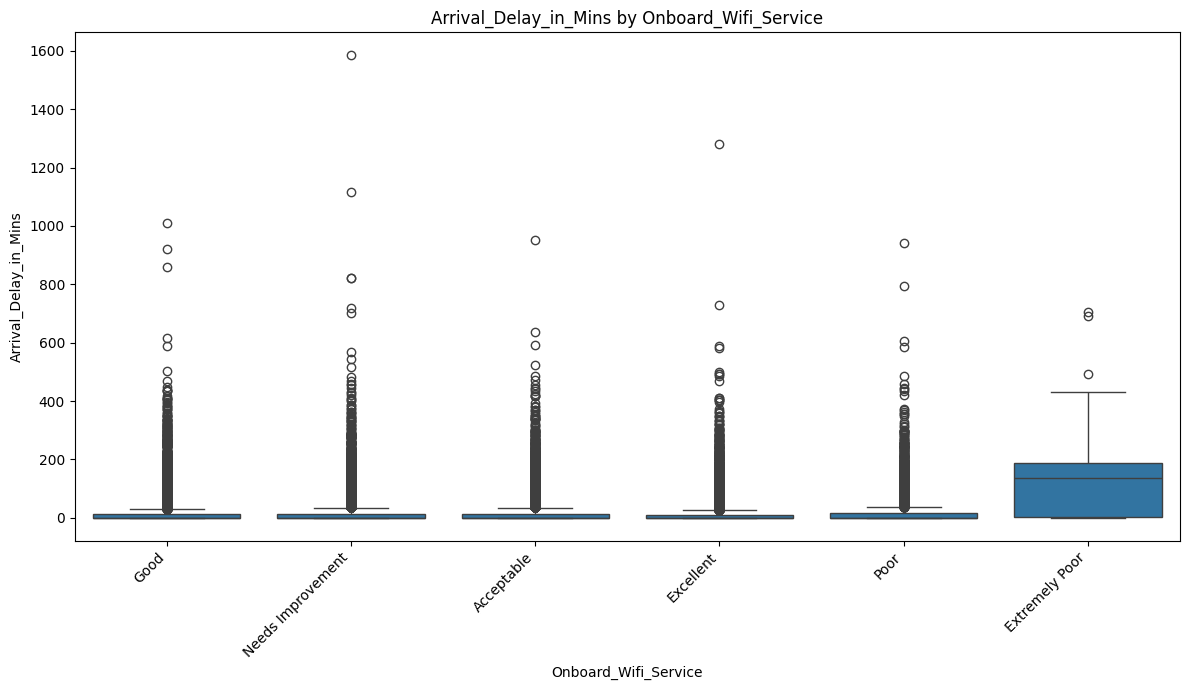

----------------------------------------------------------------------


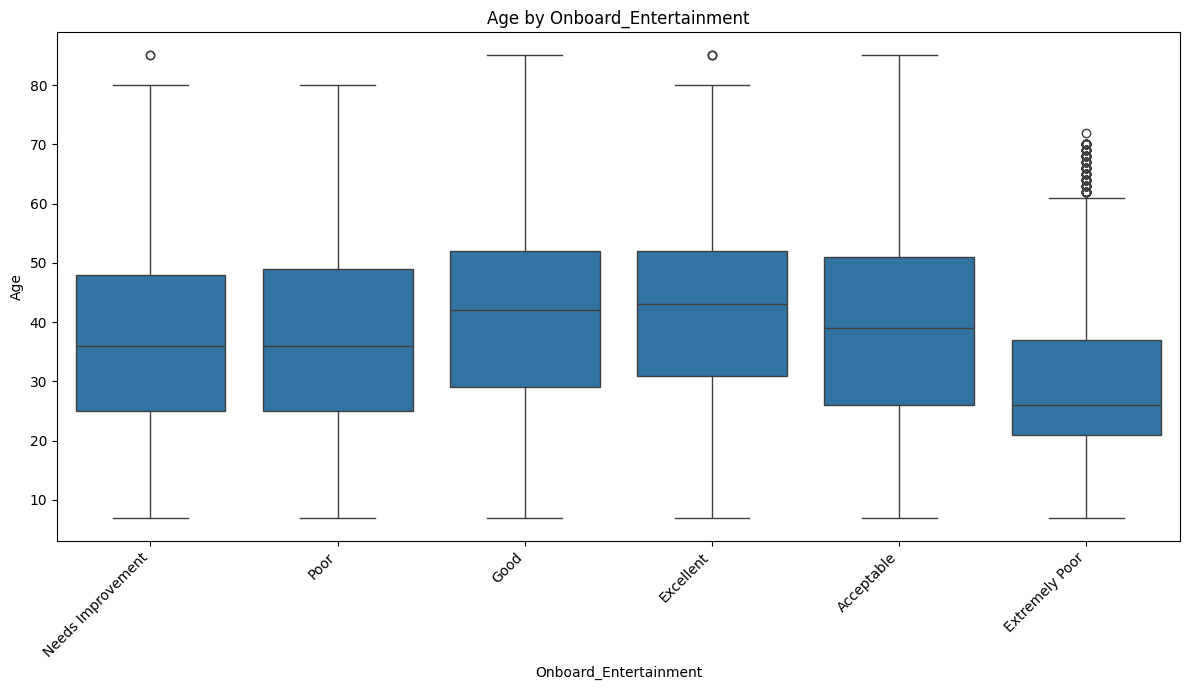

----------------------------------------------------------------------


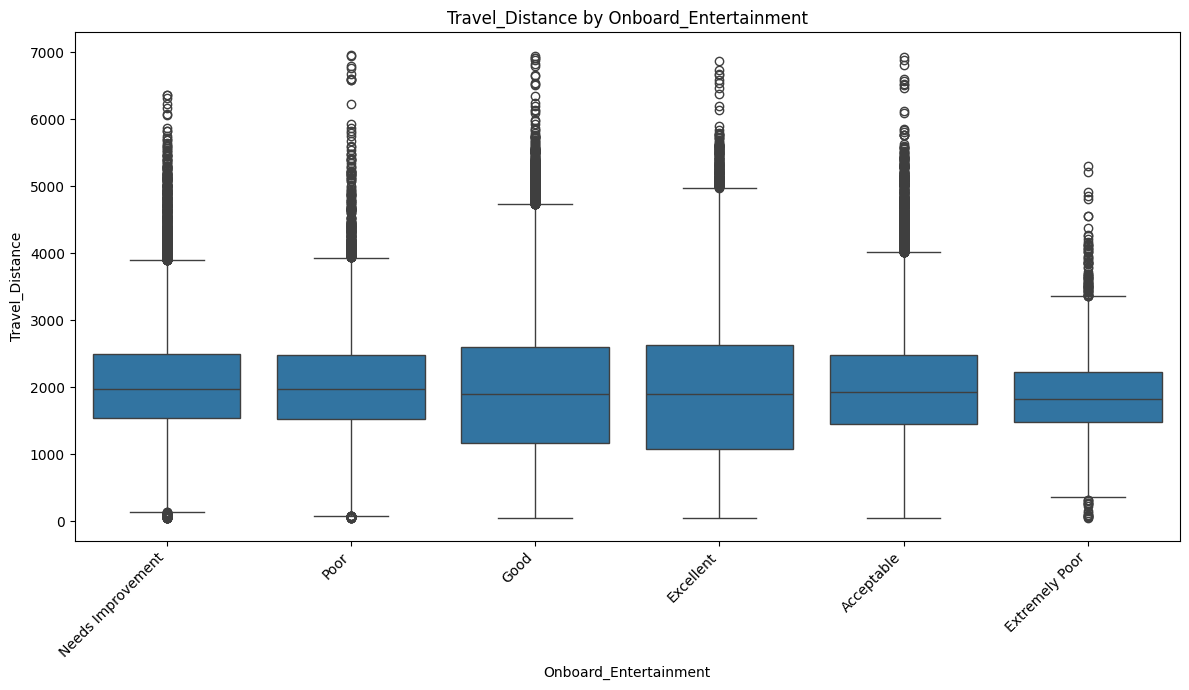

----------------------------------------------------------------------


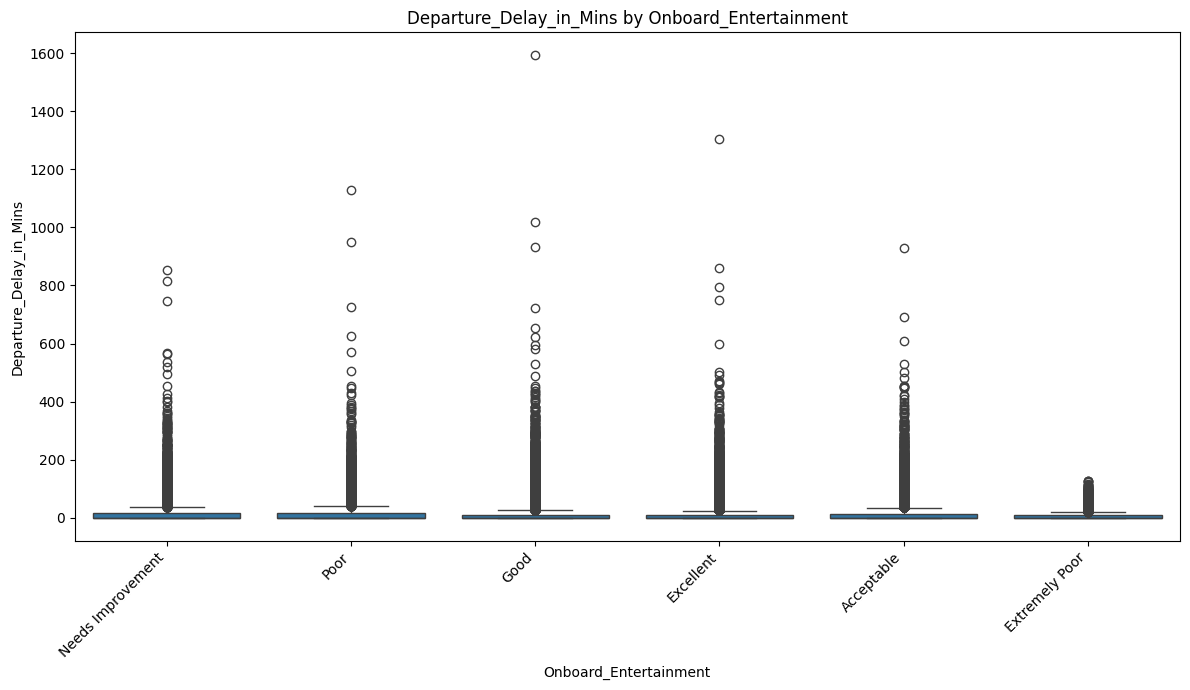

----------------------------------------------------------------------


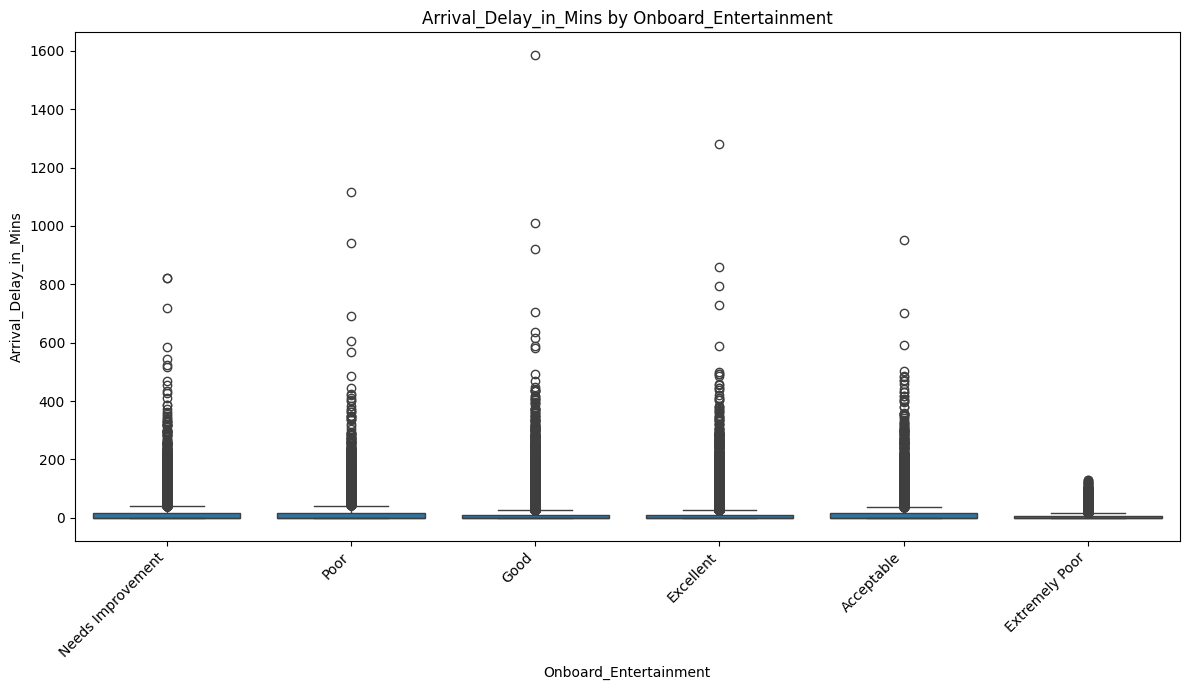

----------------------------------------------------------------------


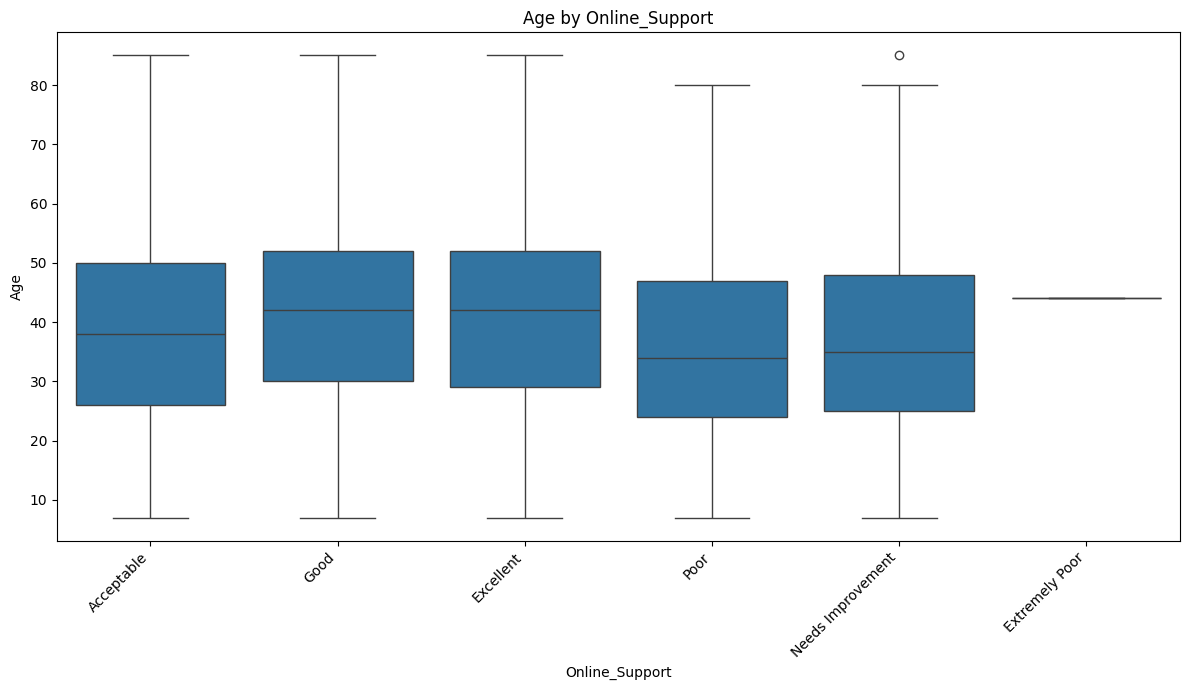

----------------------------------------------------------------------


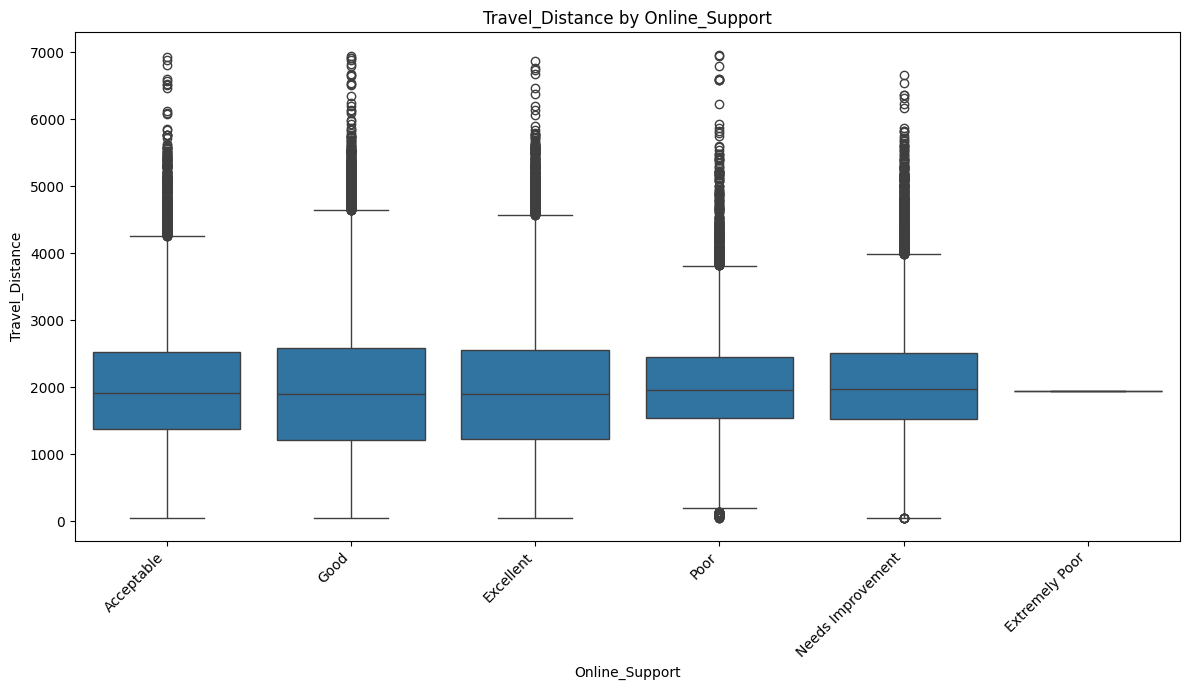

----------------------------------------------------------------------


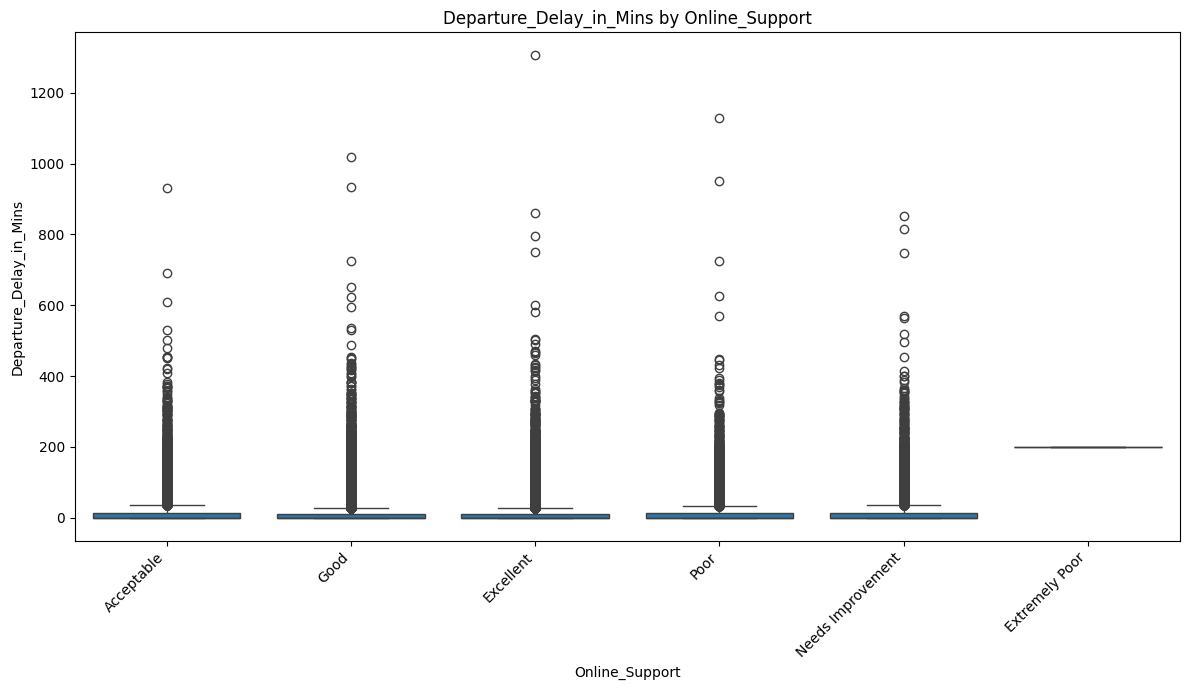

----------------------------------------------------------------------


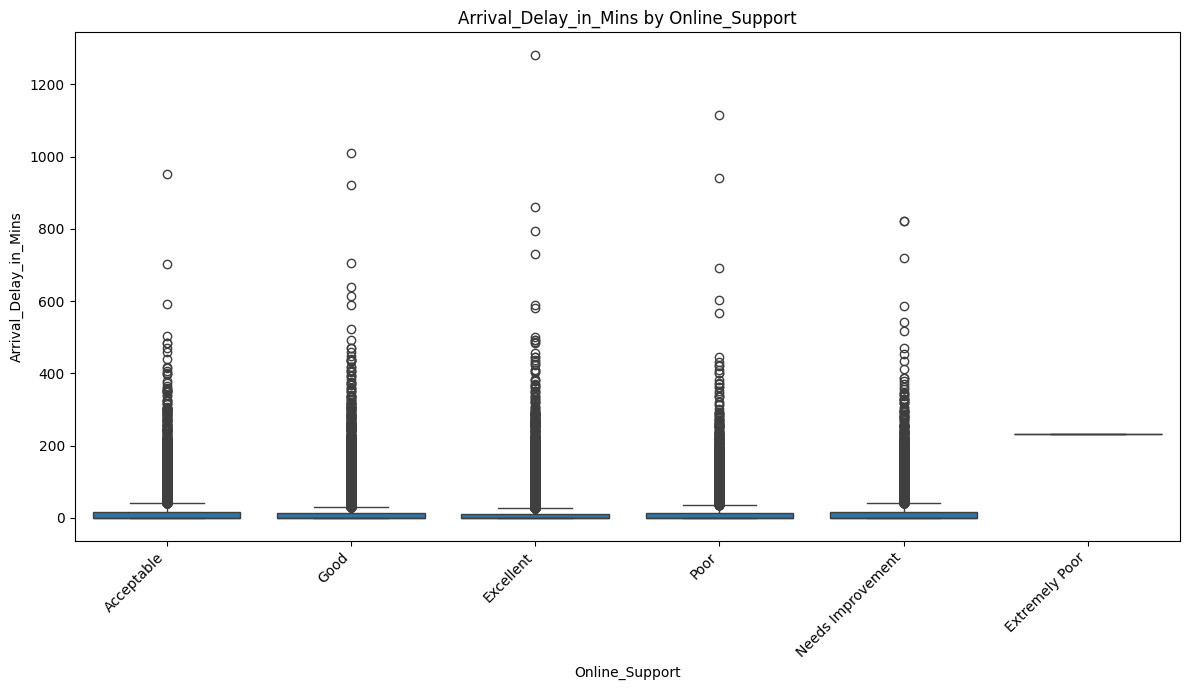

----------------------------------------------------------------------


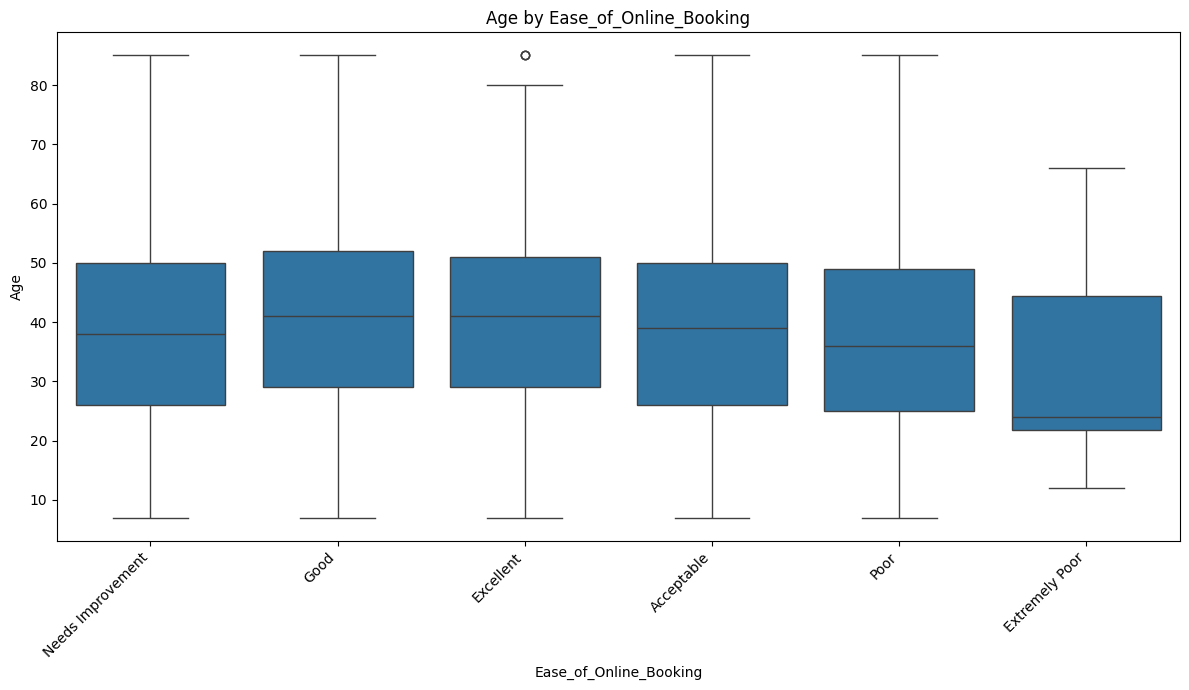

----------------------------------------------------------------------


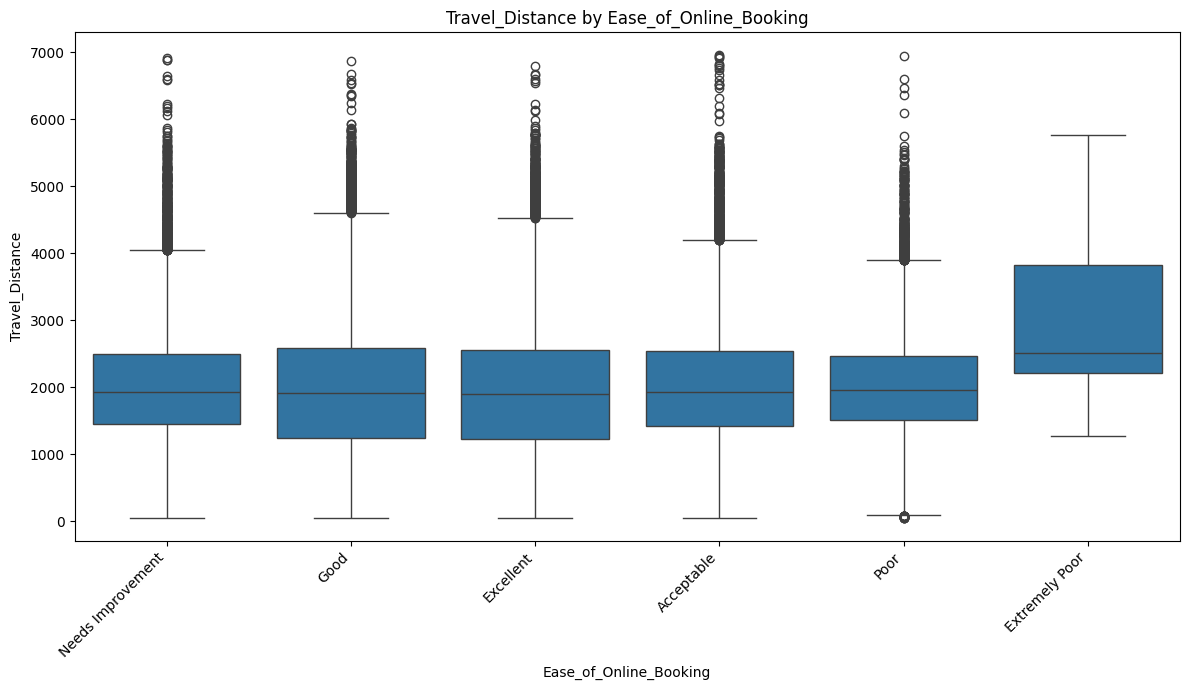

----------------------------------------------------------------------


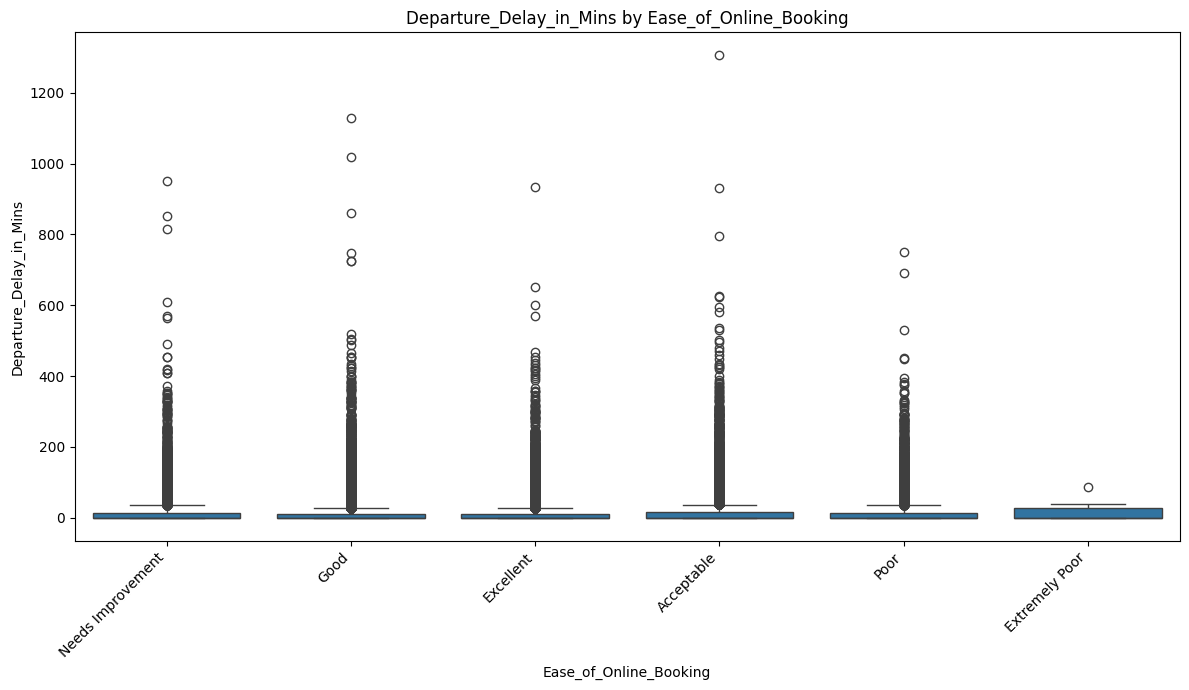

----------------------------------------------------------------------


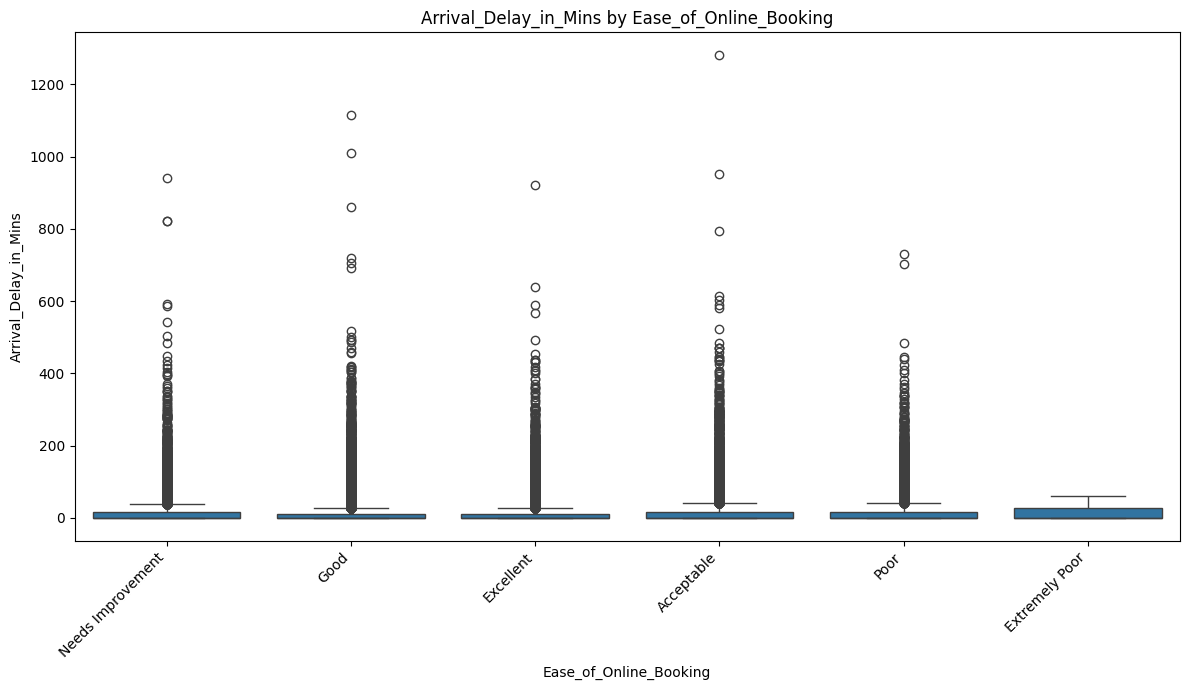

----------------------------------------------------------------------


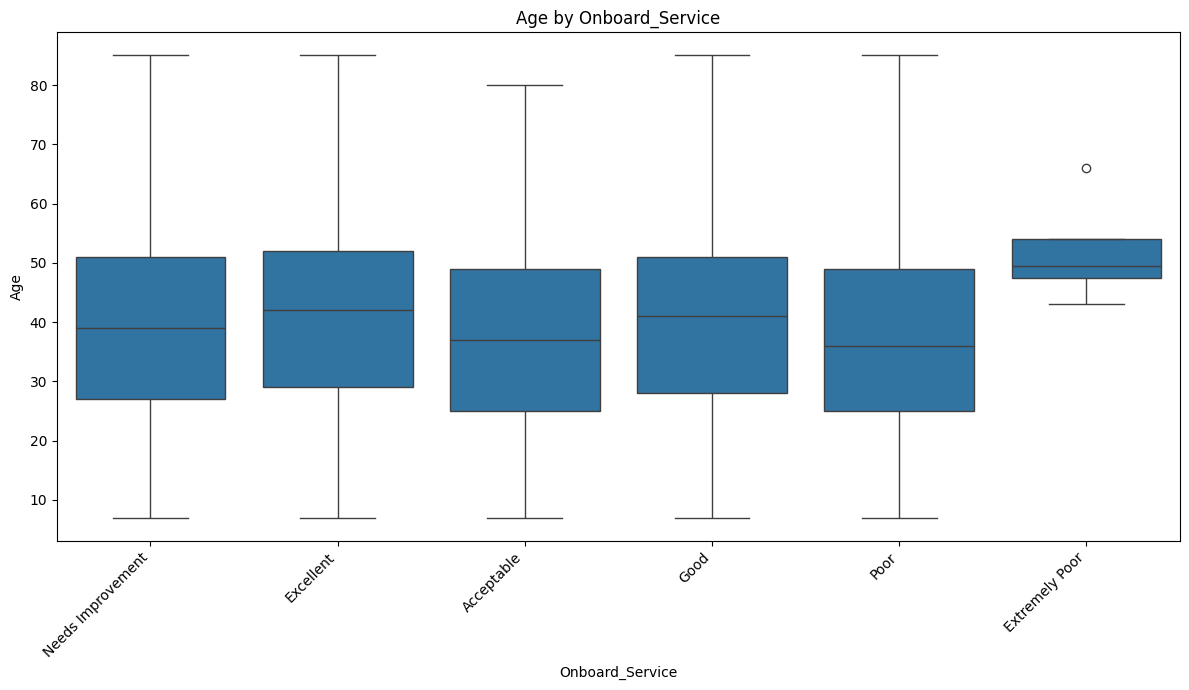

----------------------------------------------------------------------


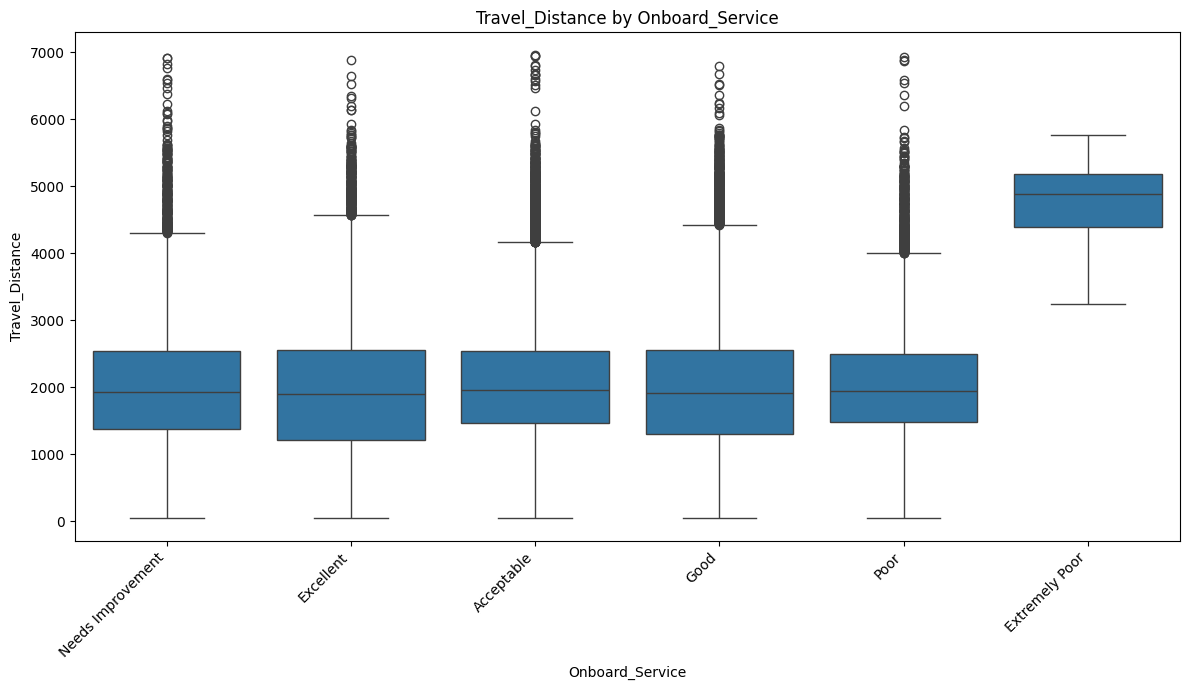

----------------------------------------------------------------------


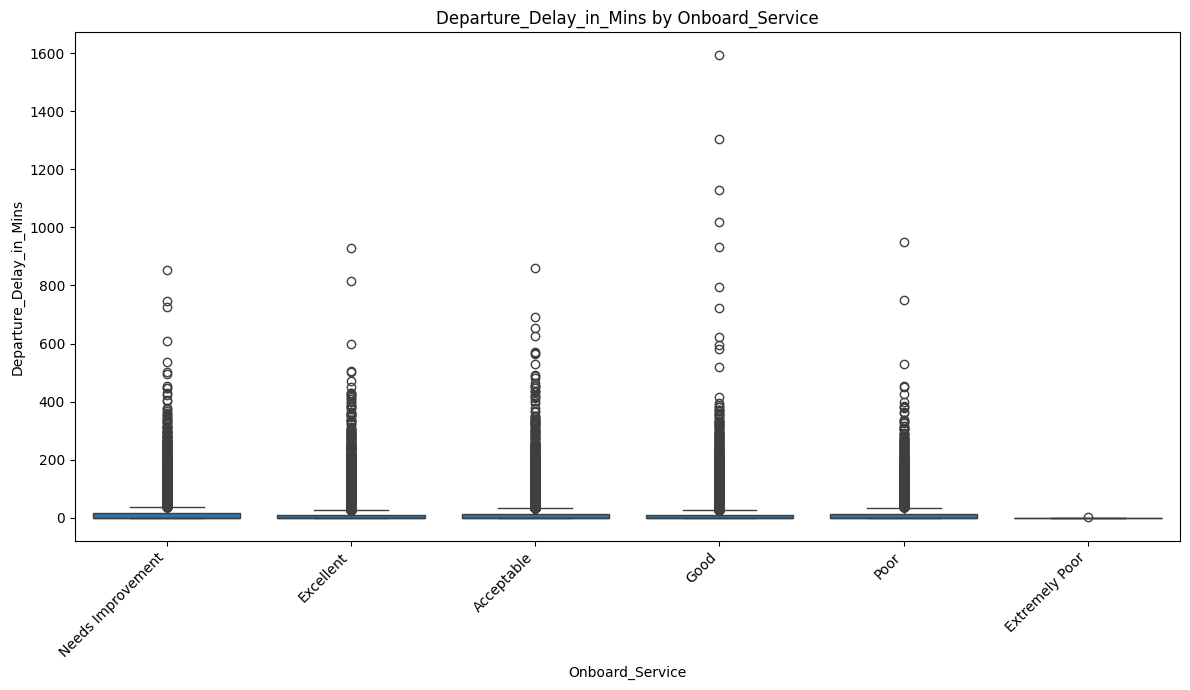

----------------------------------------------------------------------


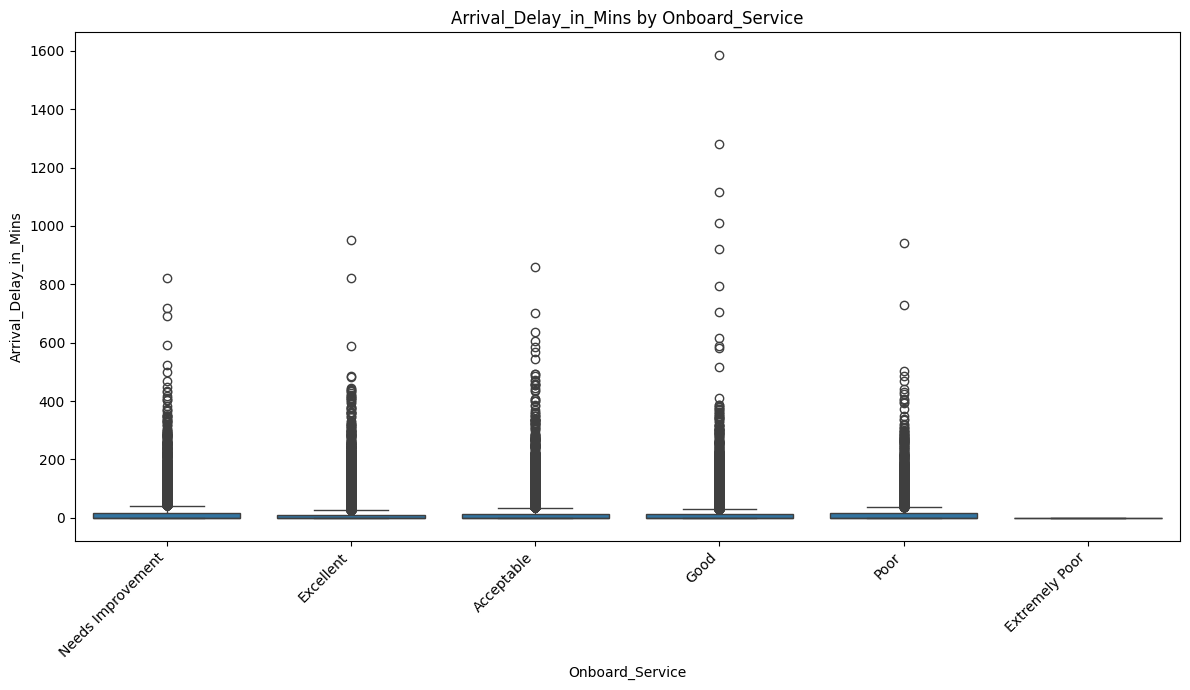

----------------------------------------------------------------------


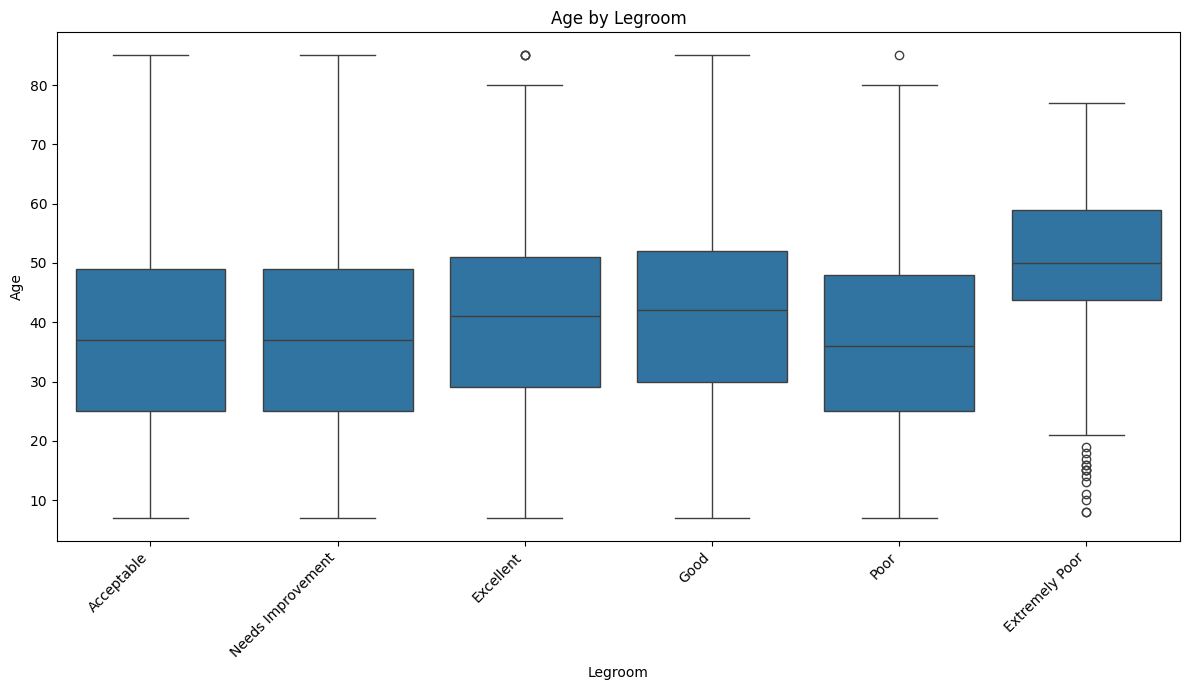

----------------------------------------------------------------------


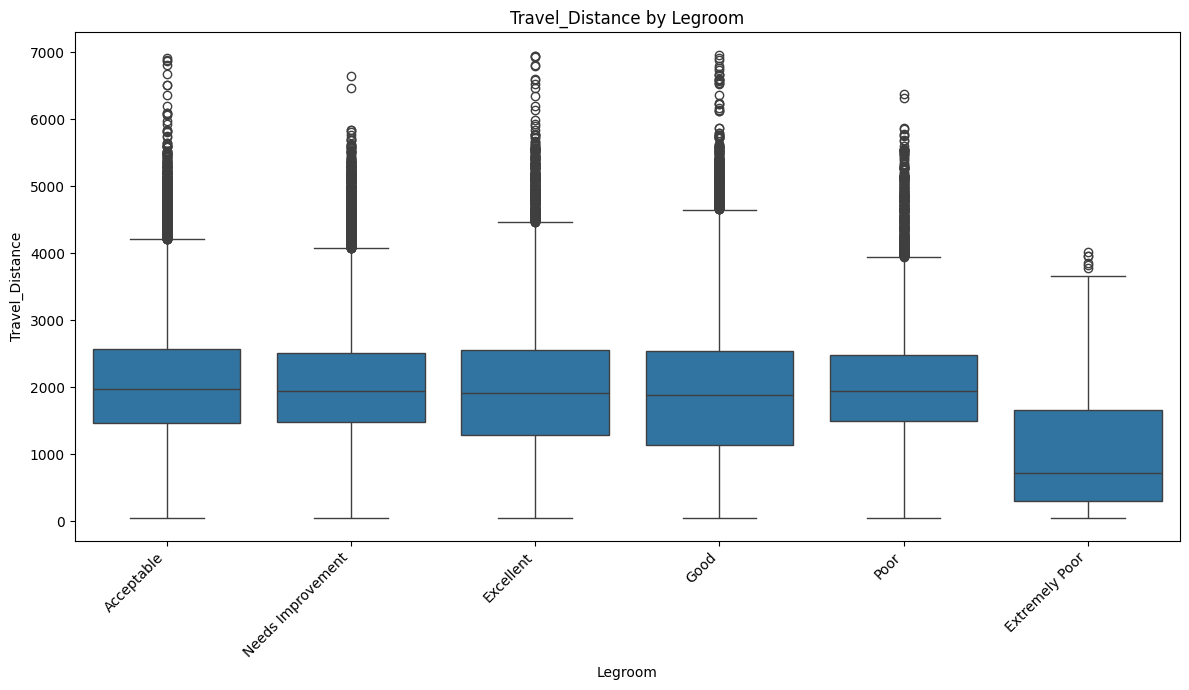

----------------------------------------------------------------------


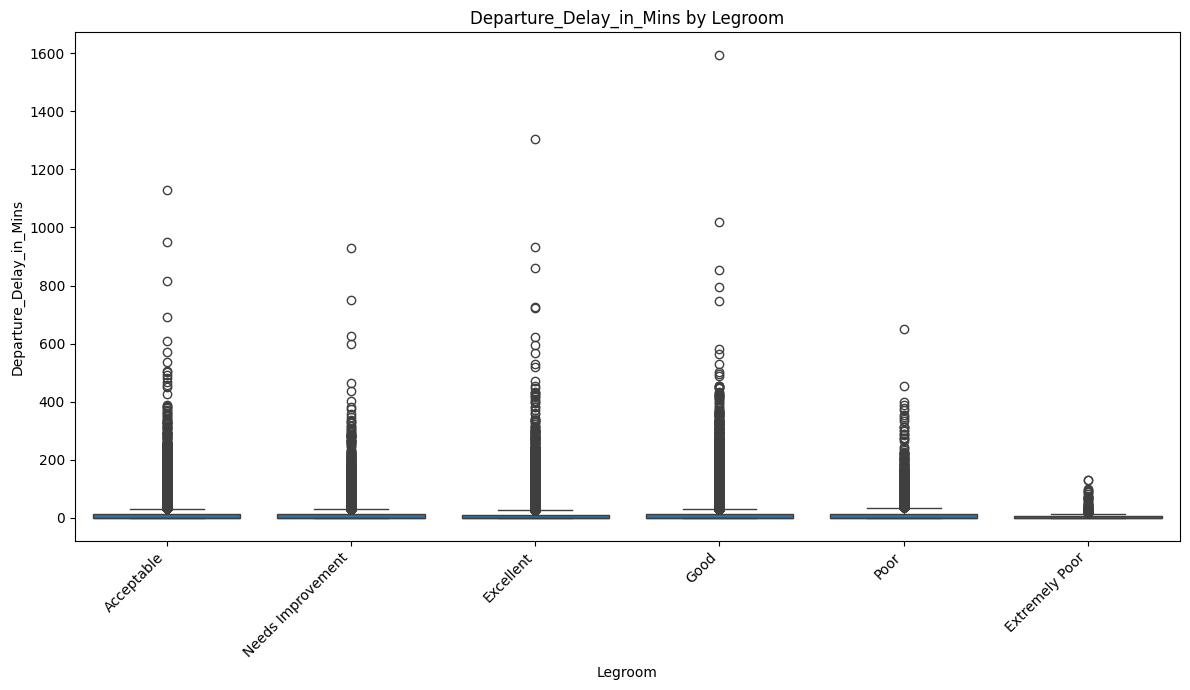

----------------------------------------------------------------------


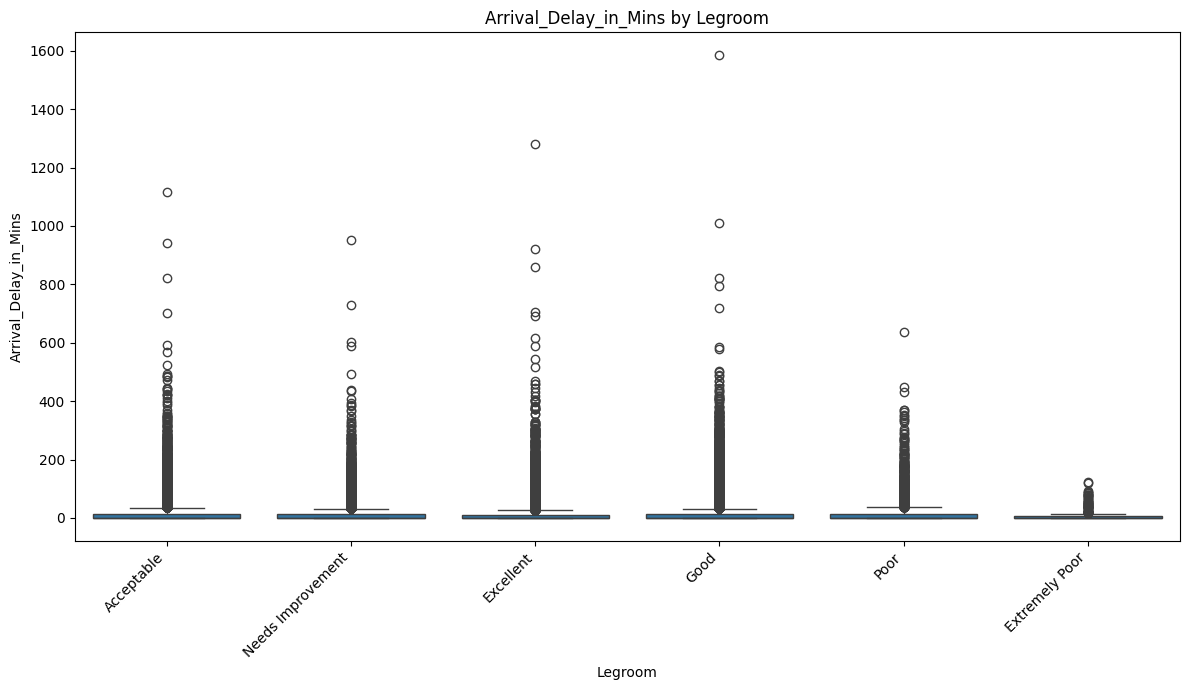

----------------------------------------------------------------------


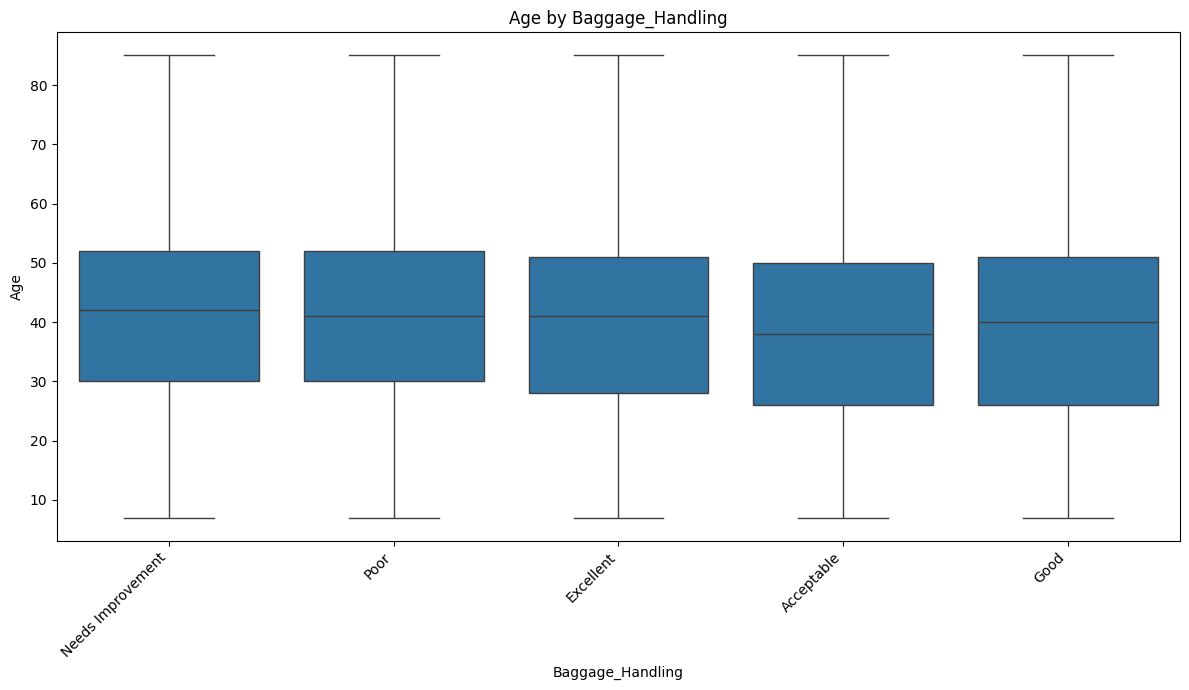

----------------------------------------------------------------------


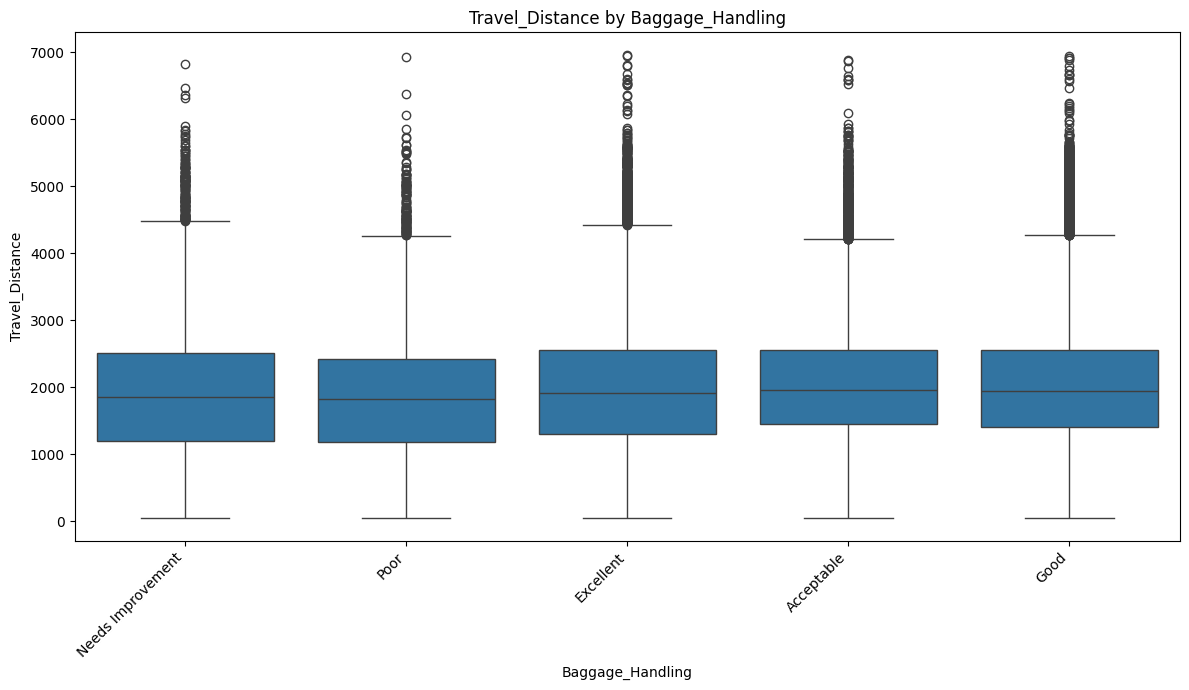

----------------------------------------------------------------------


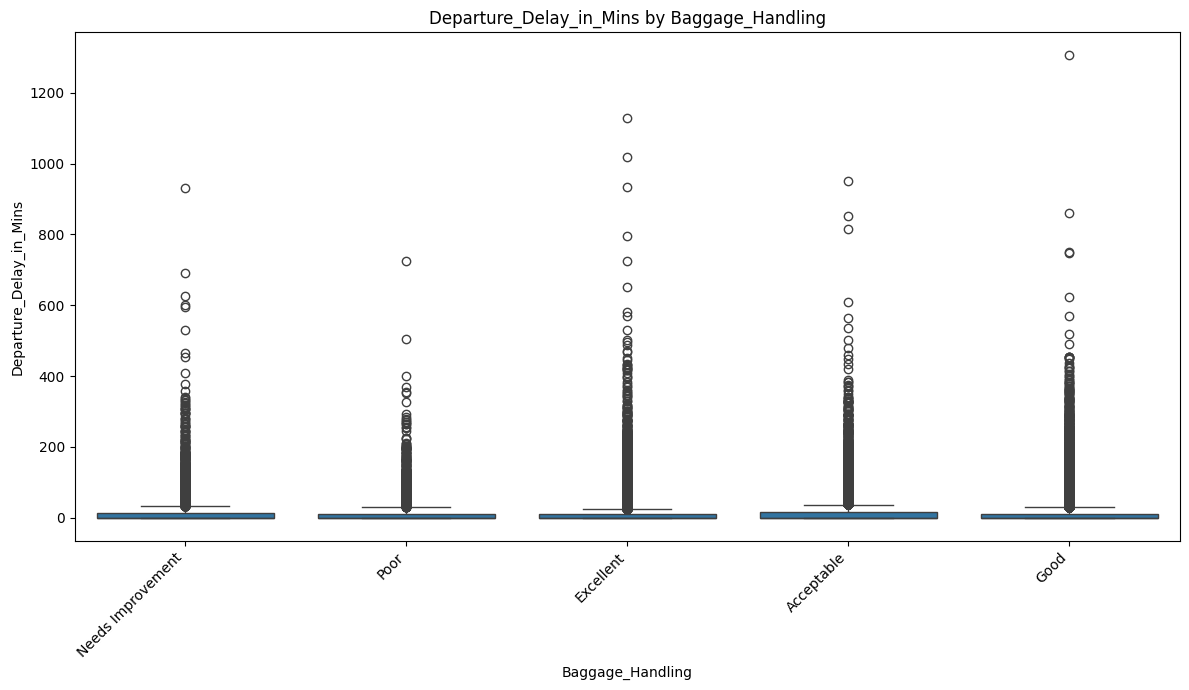

----------------------------------------------------------------------


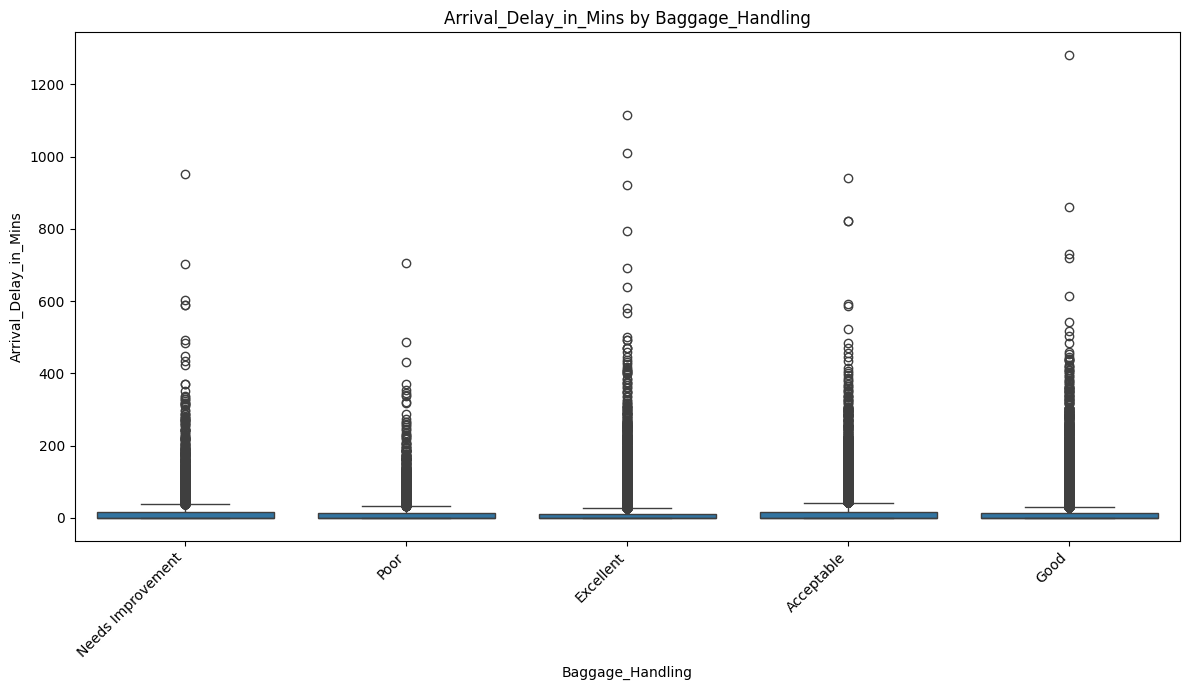

----------------------------------------------------------------------


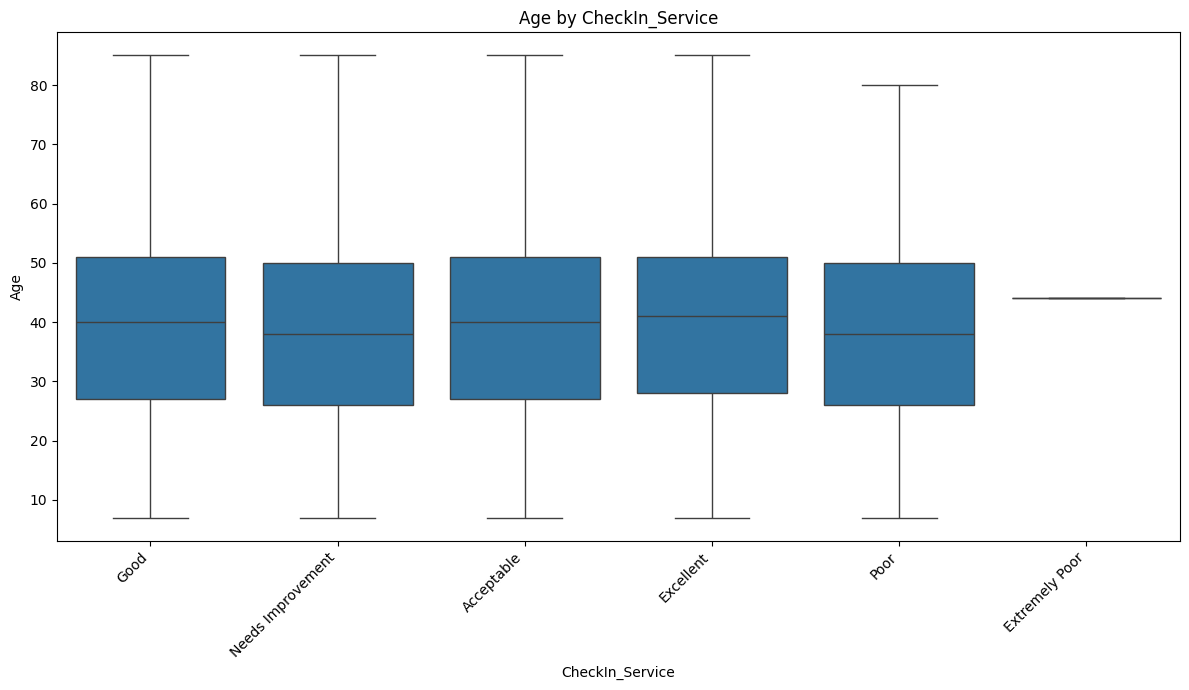

----------------------------------------------------------------------


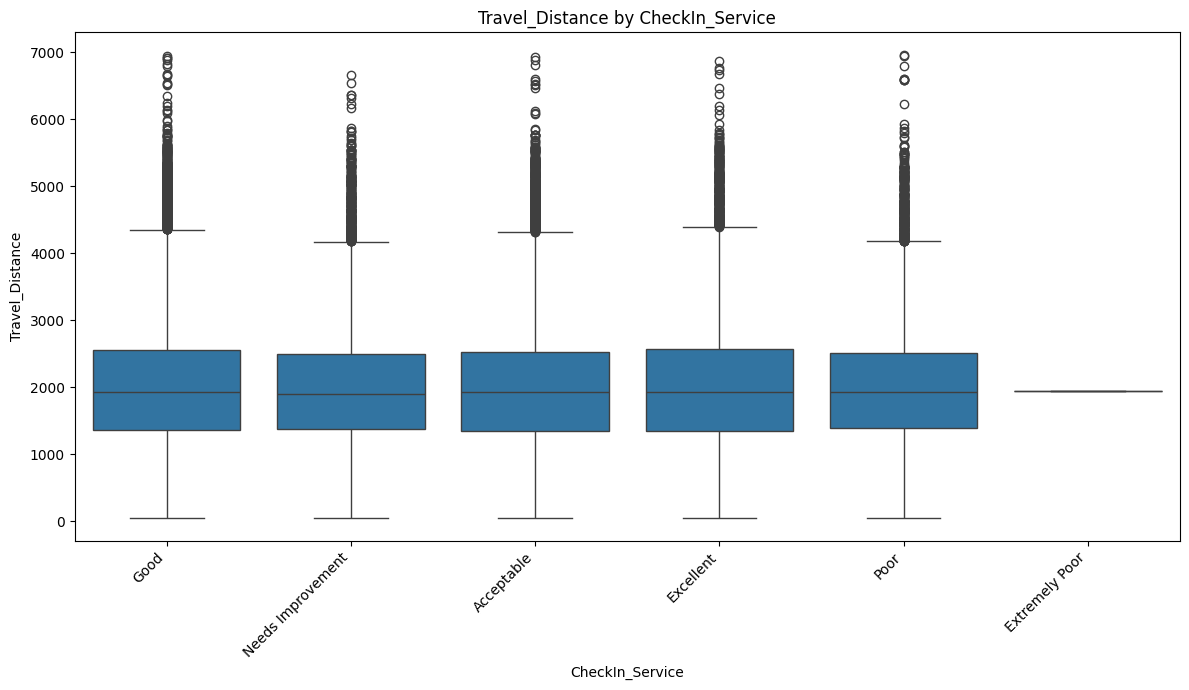

----------------------------------------------------------------------


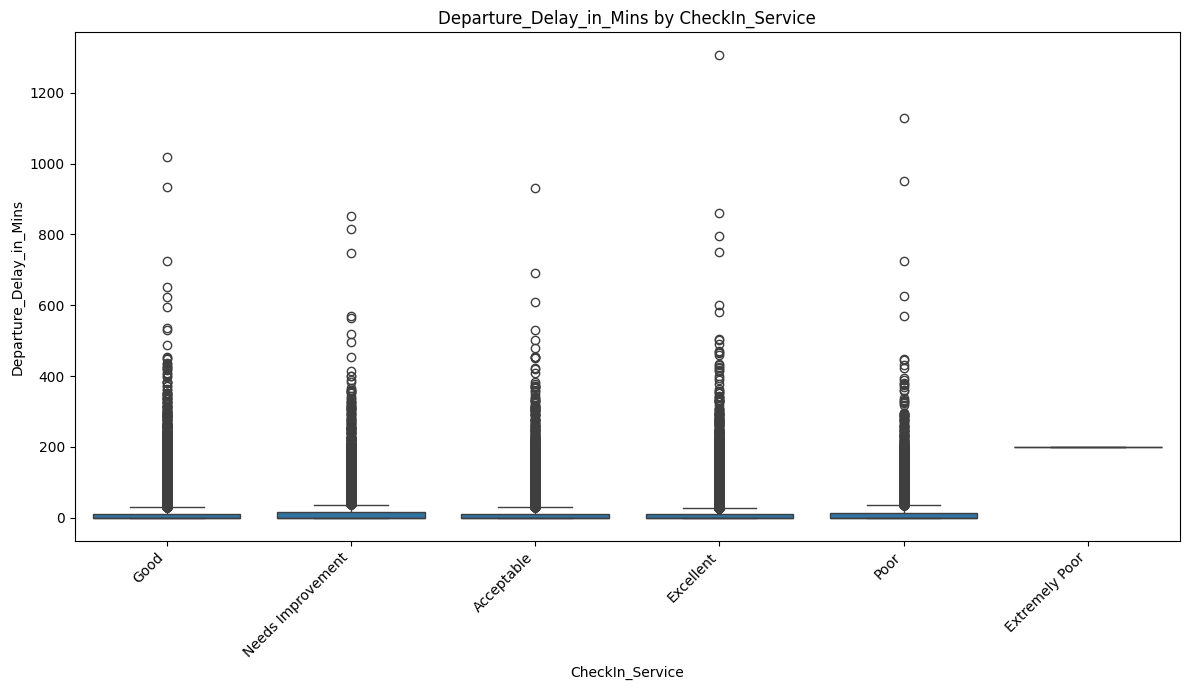

----------------------------------------------------------------------


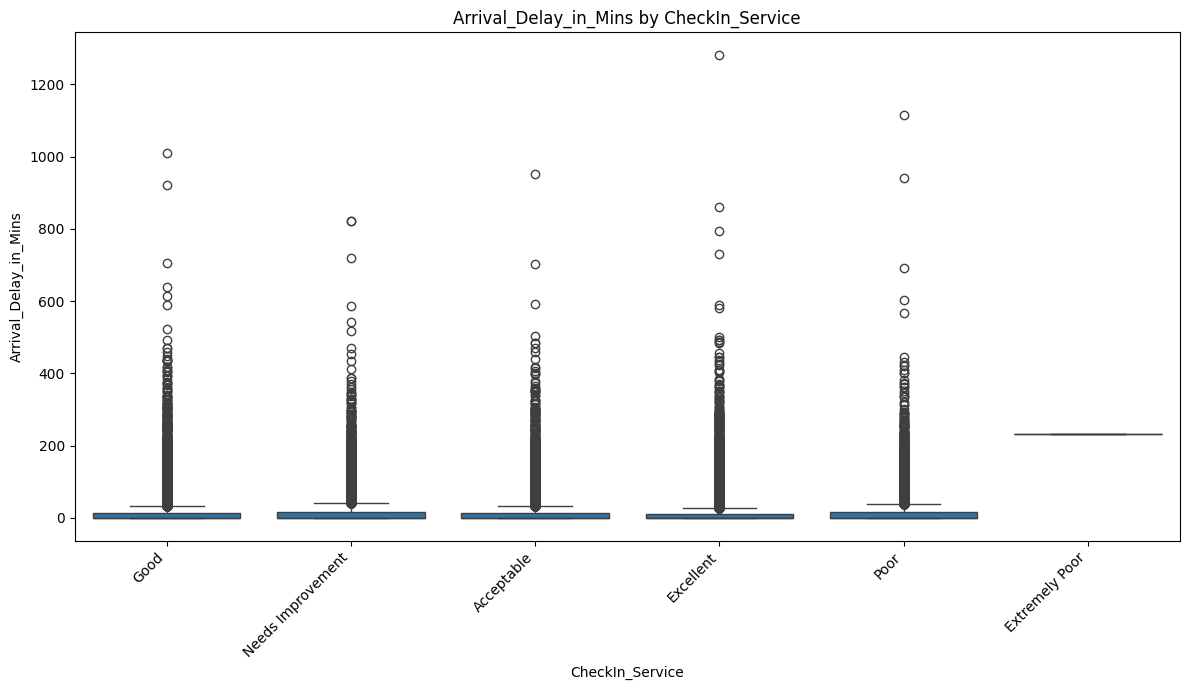

----------------------------------------------------------------------


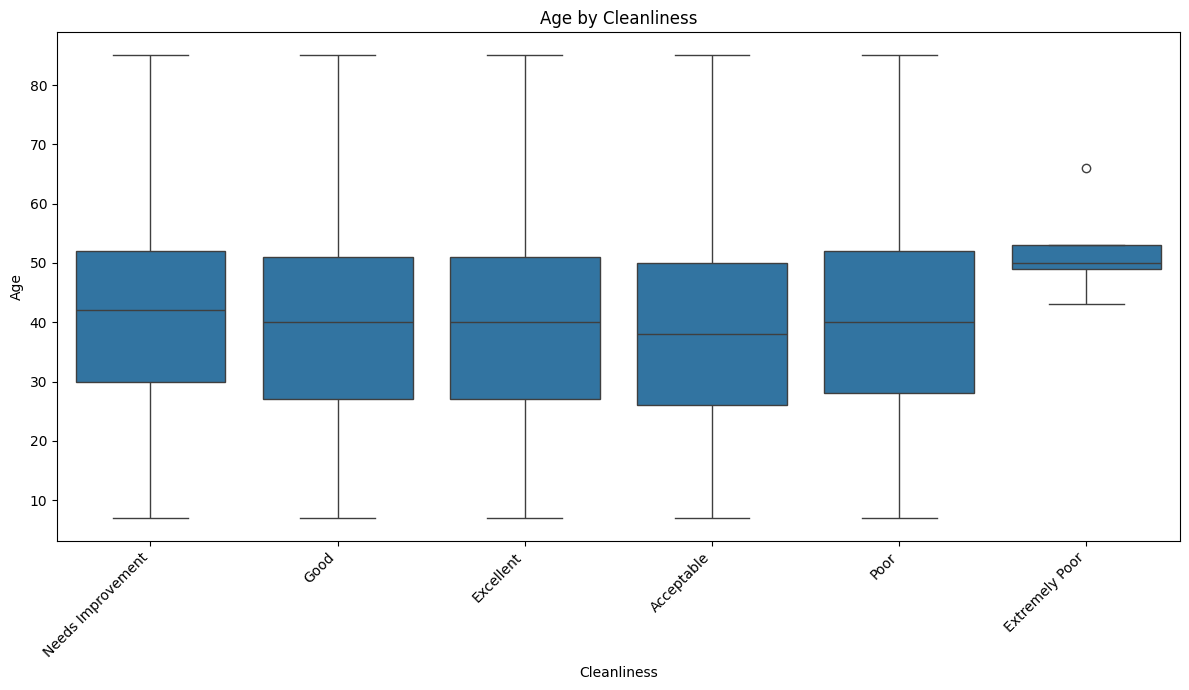

----------------------------------------------------------------------


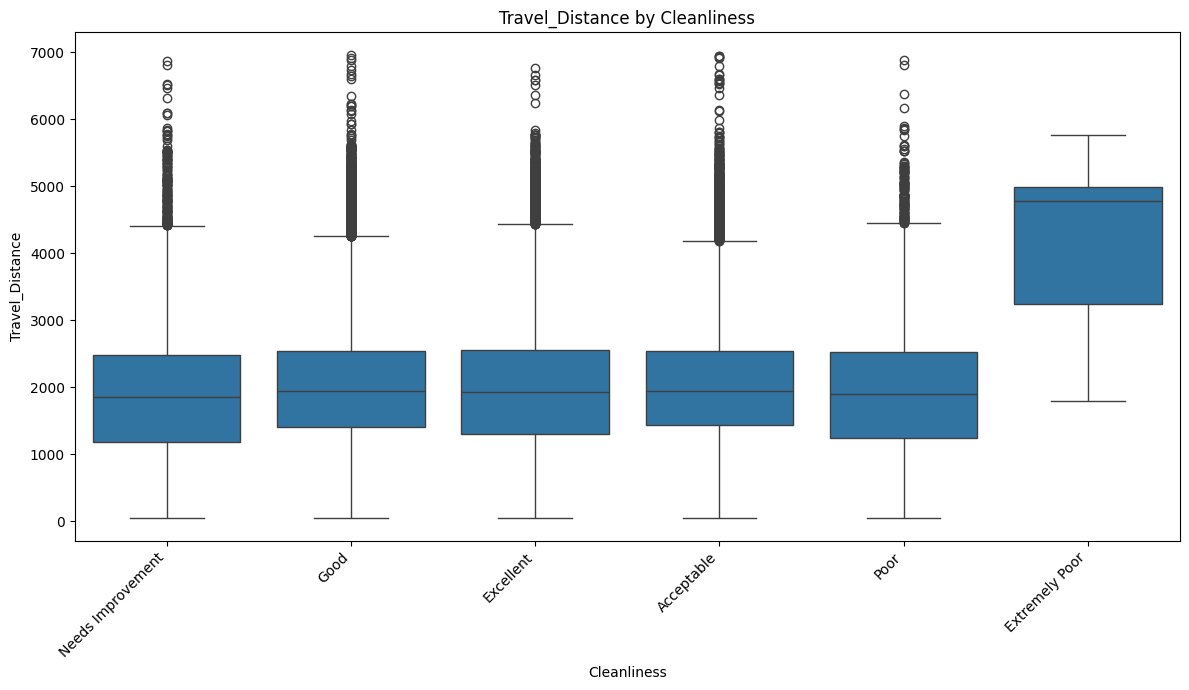

----------------------------------------------------------------------


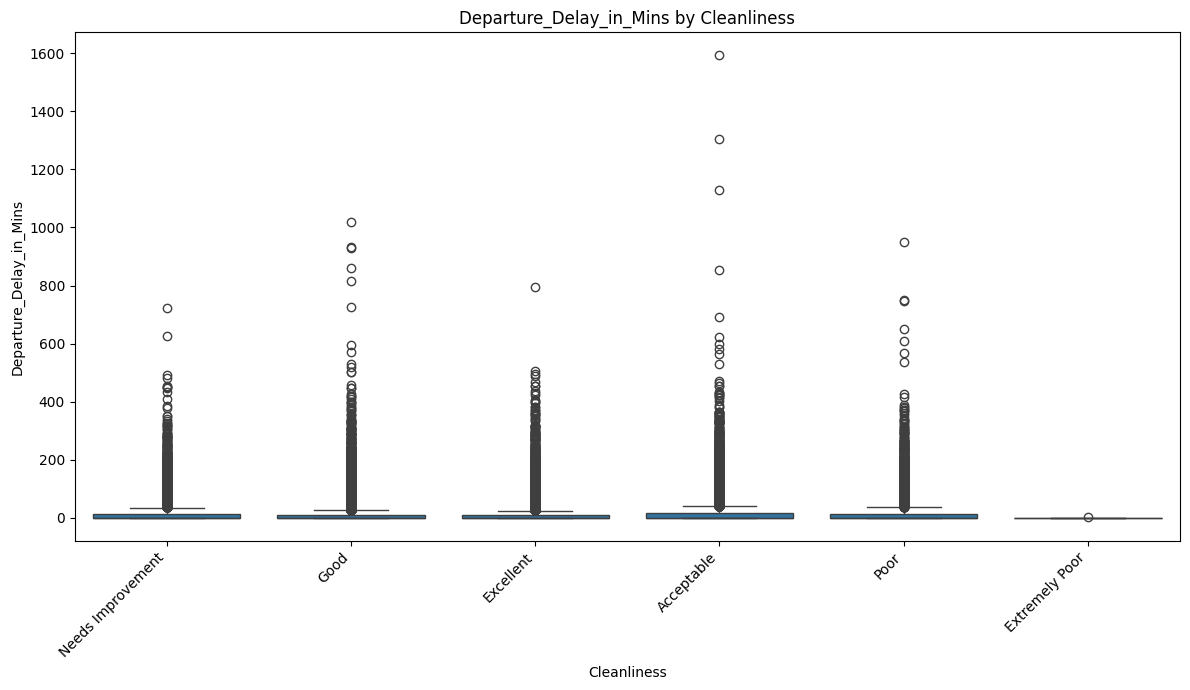

----------------------------------------------------------------------


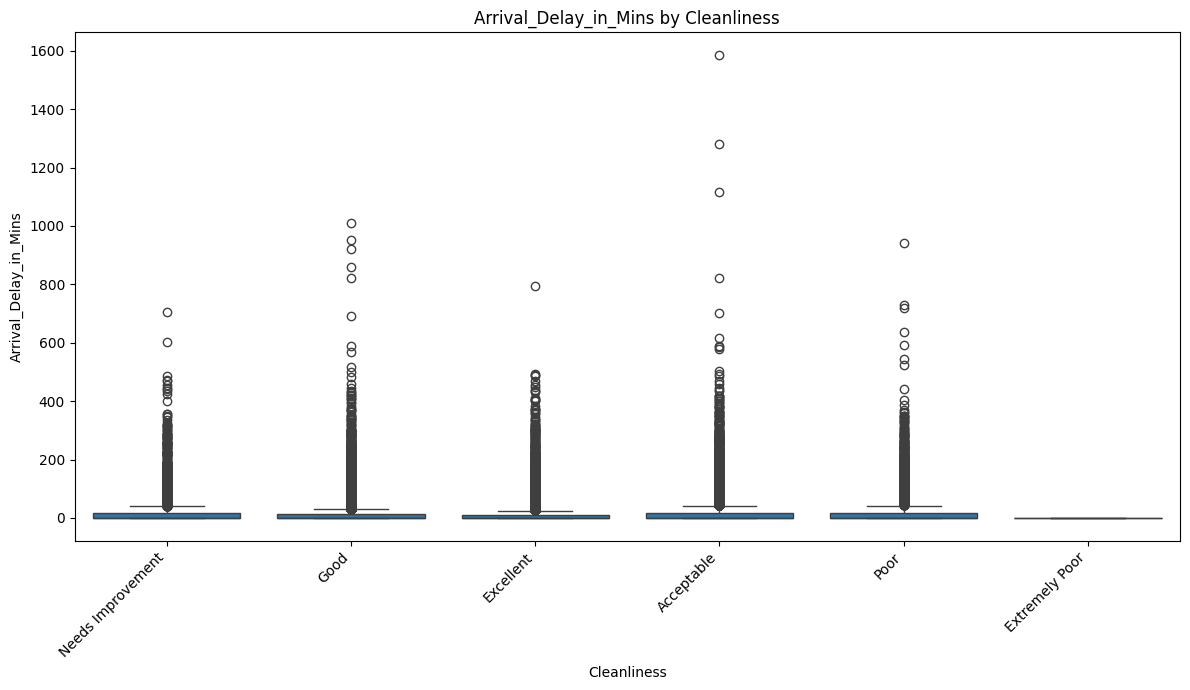

----------------------------------------------------------------------


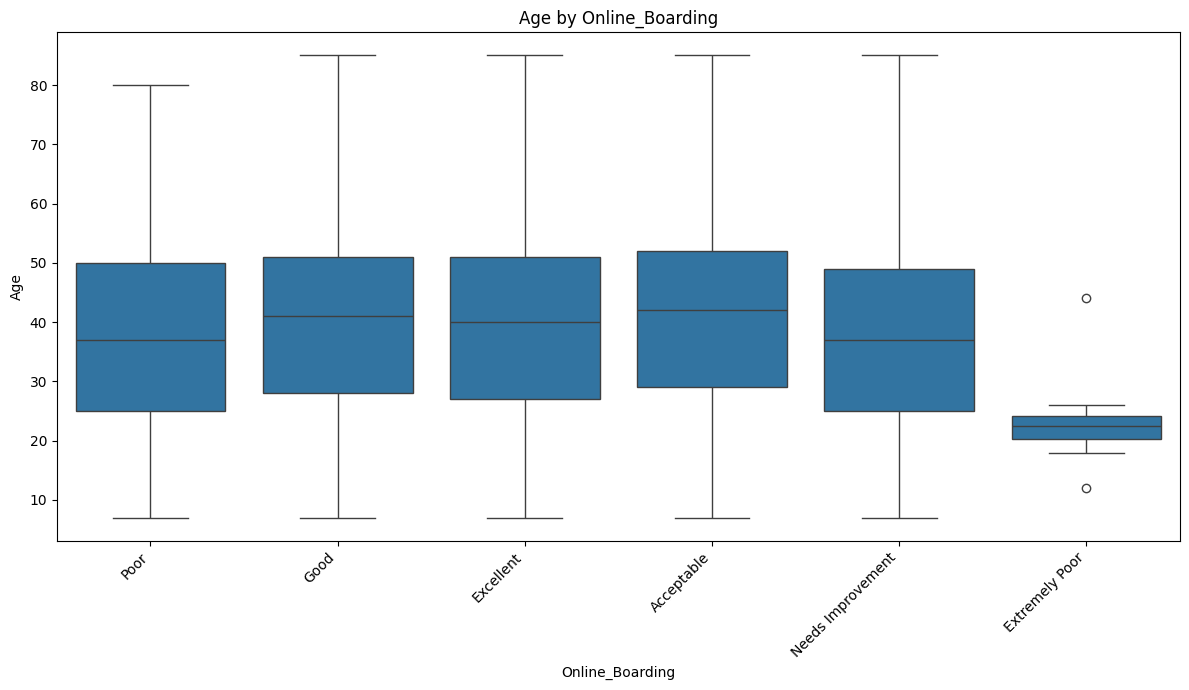

----------------------------------------------------------------------


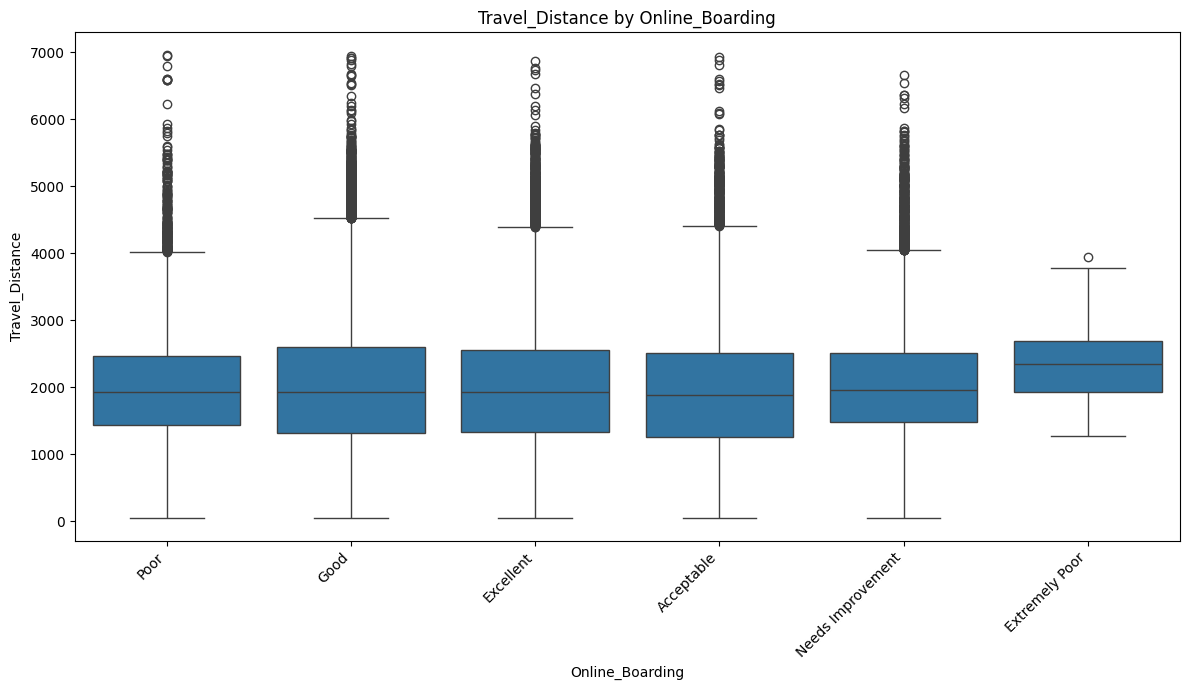

----------------------------------------------------------------------


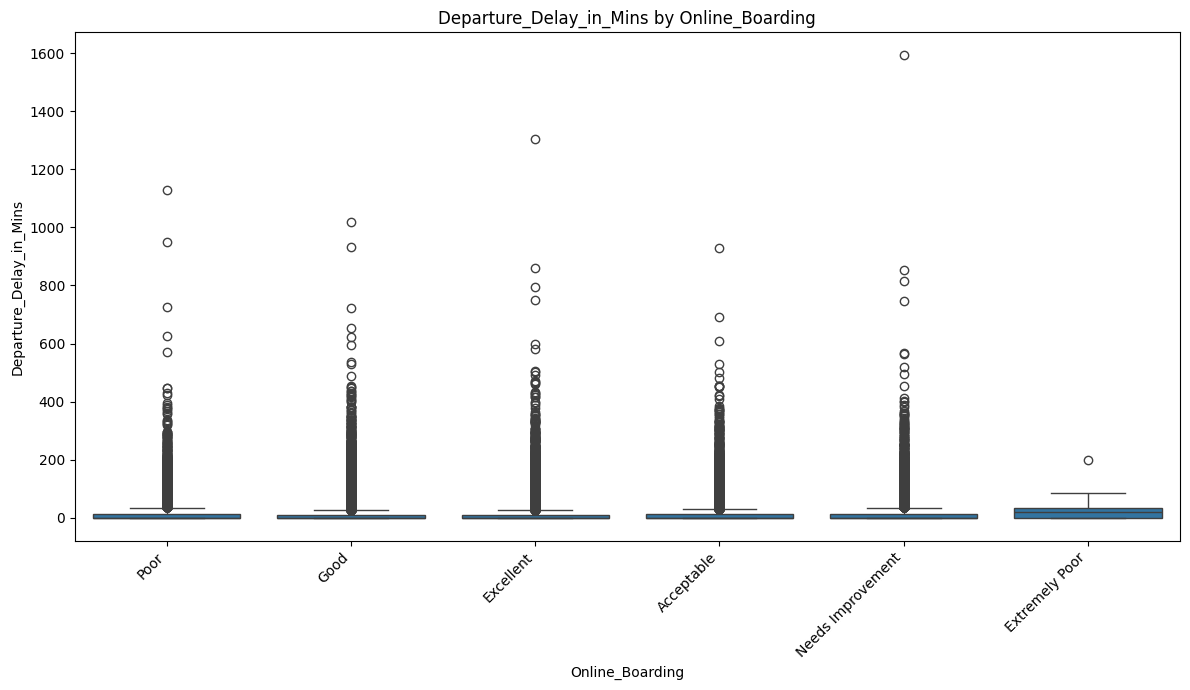

----------------------------------------------------------------------


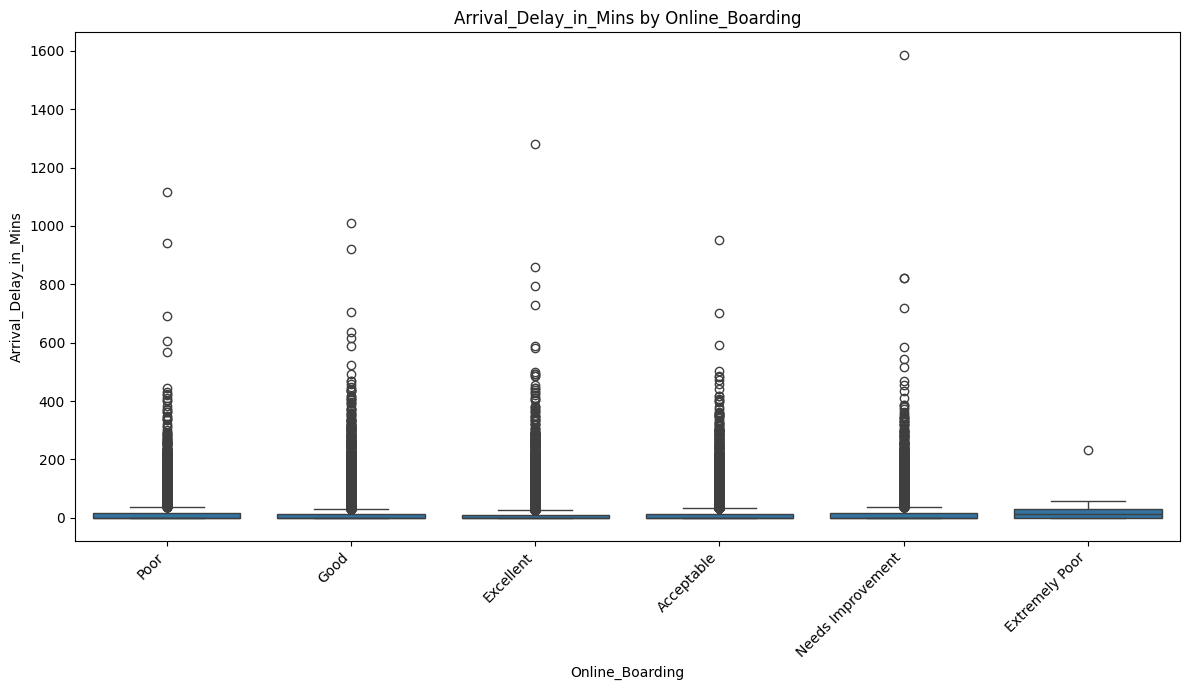

----------------------------------------------------------------------


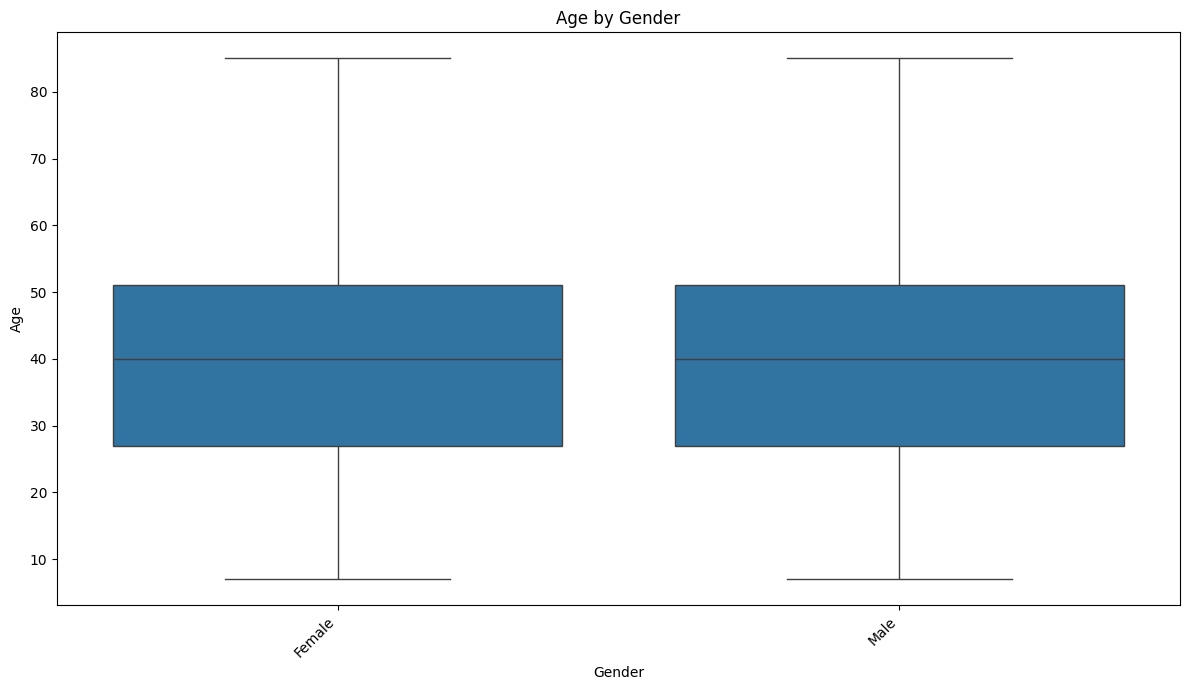

----------------------------------------------------------------------


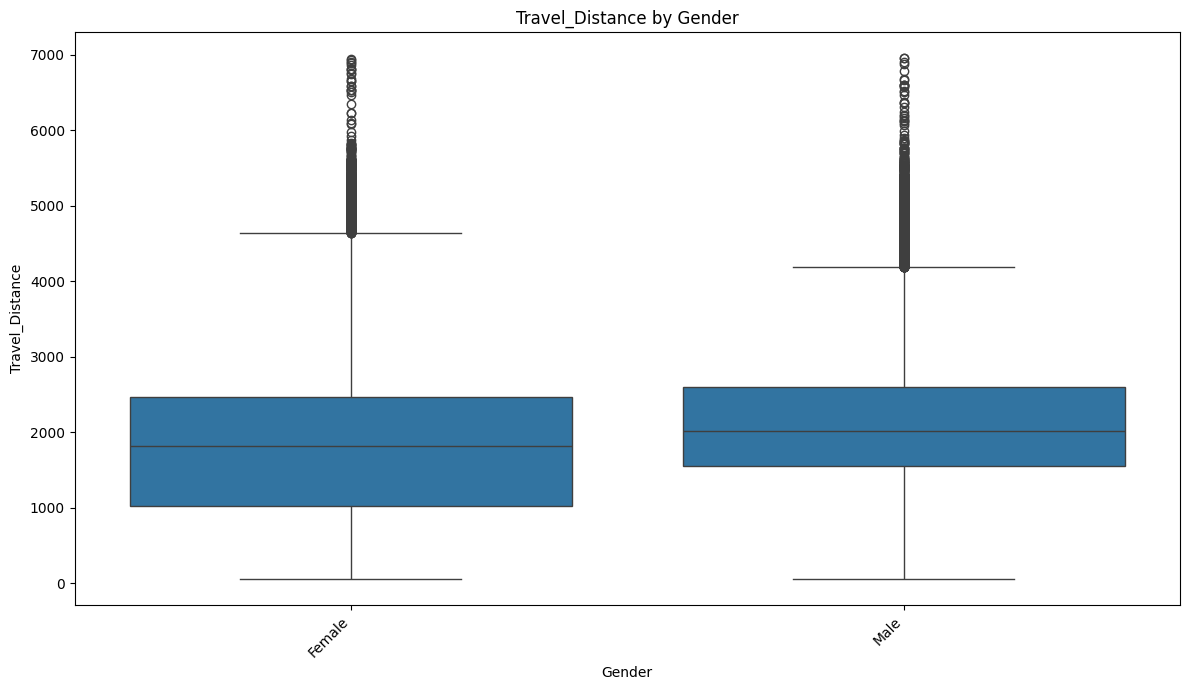

----------------------------------------------------------------------


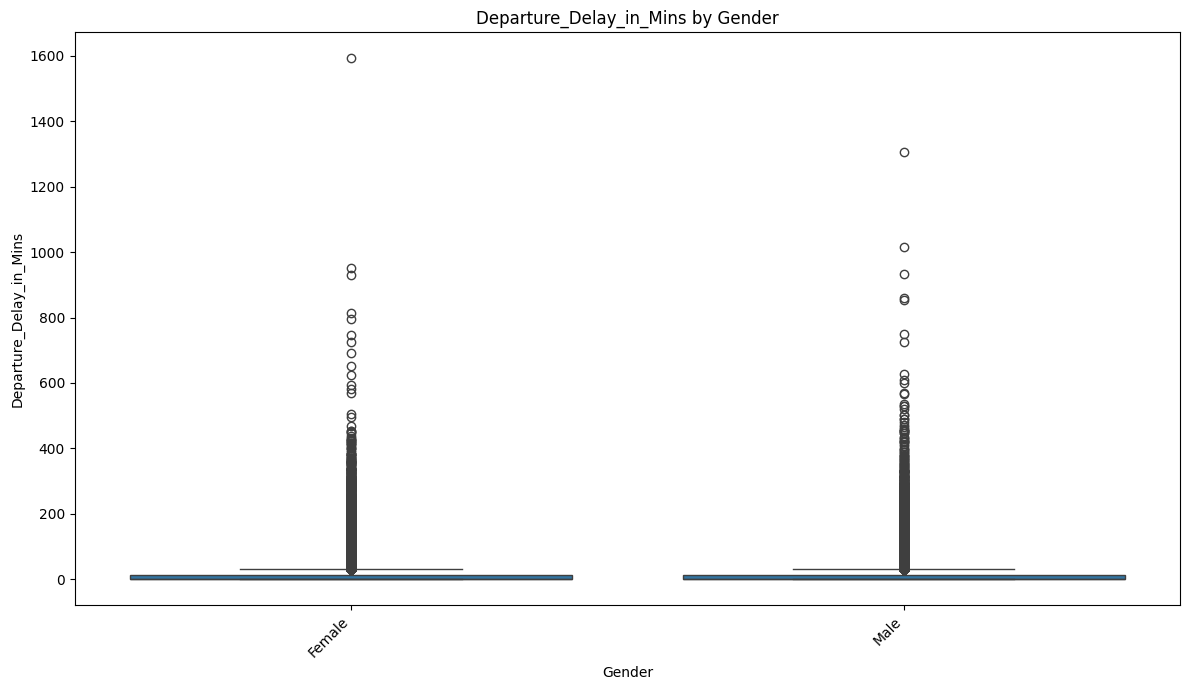

----------------------------------------------------------------------


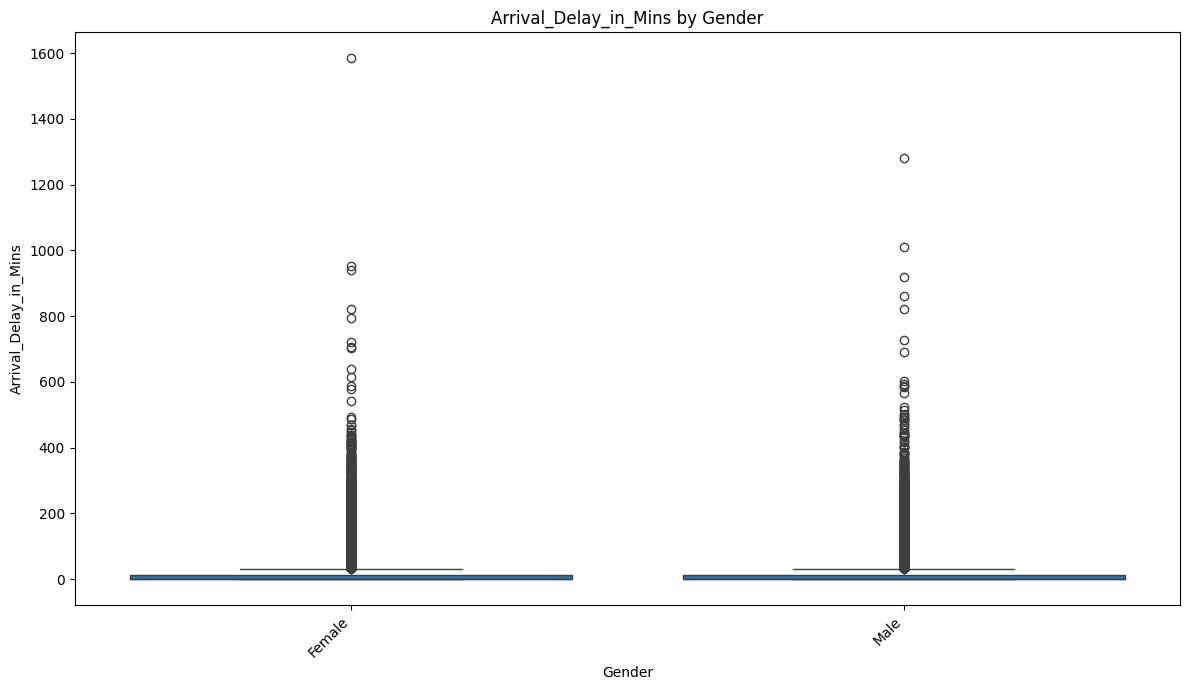

----------------------------------------------------------------------


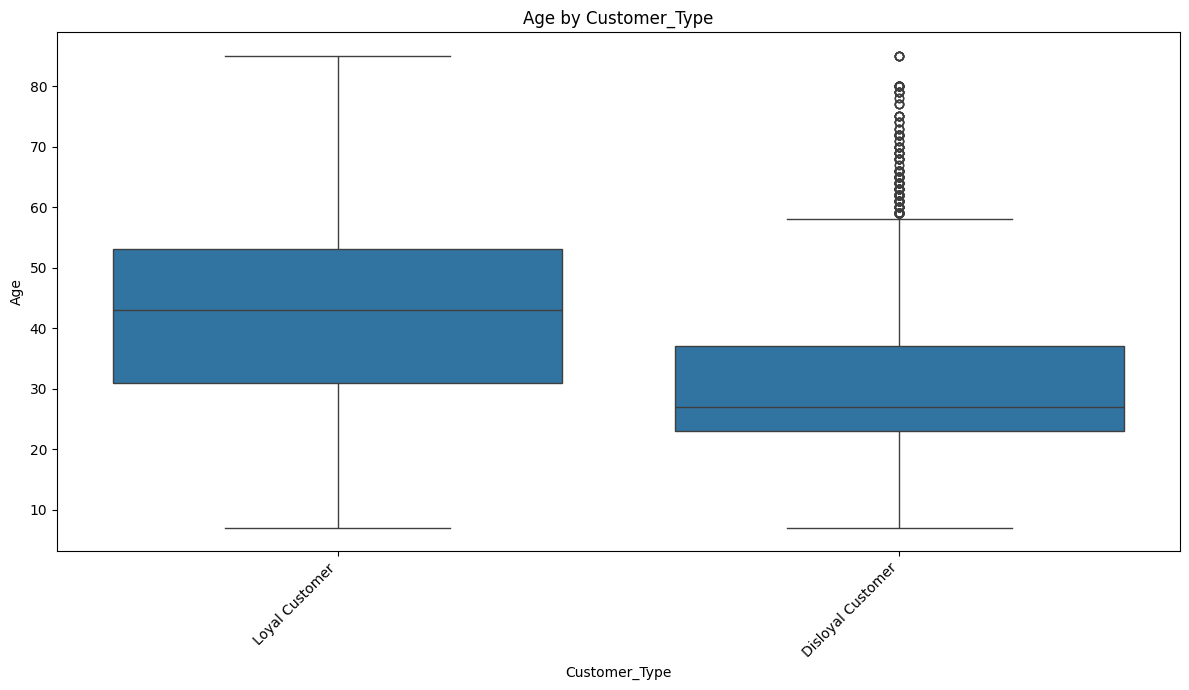

----------------------------------------------------------------------


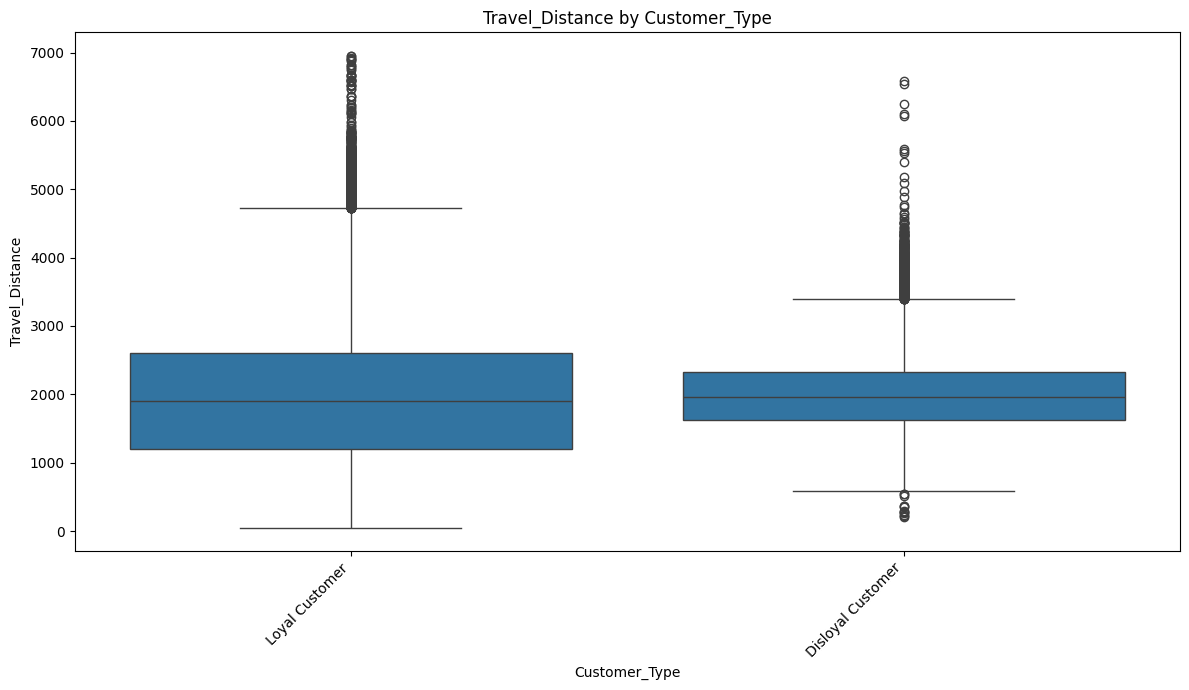

----------------------------------------------------------------------


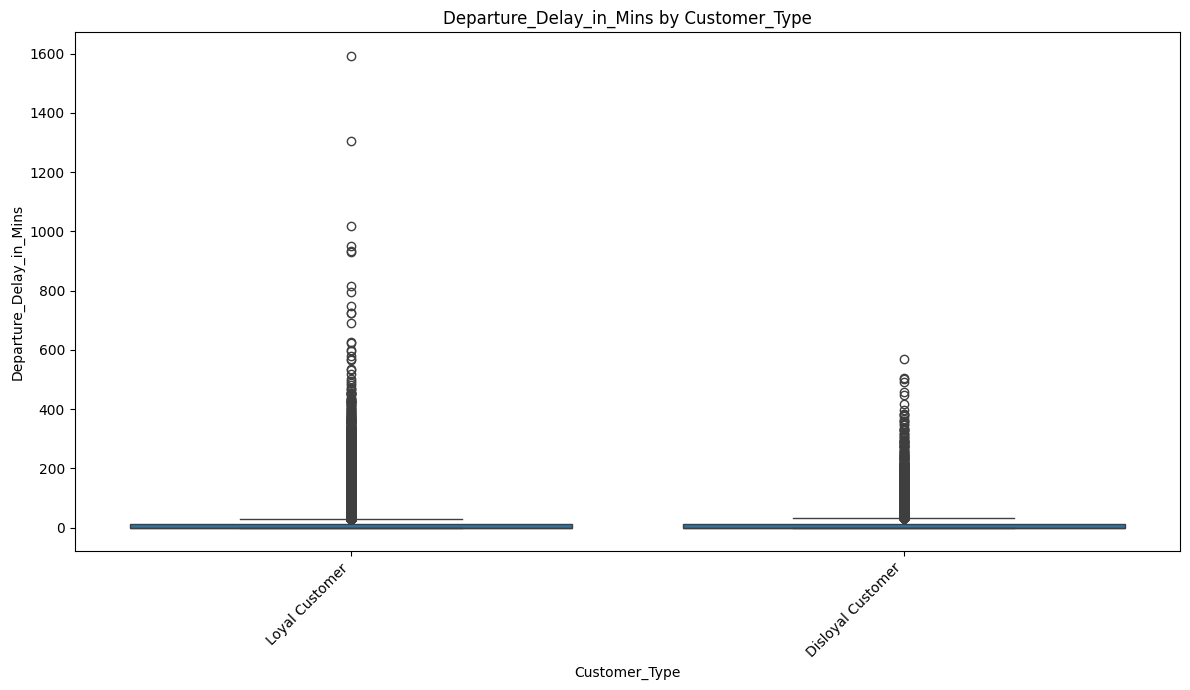

----------------------------------------------------------------------


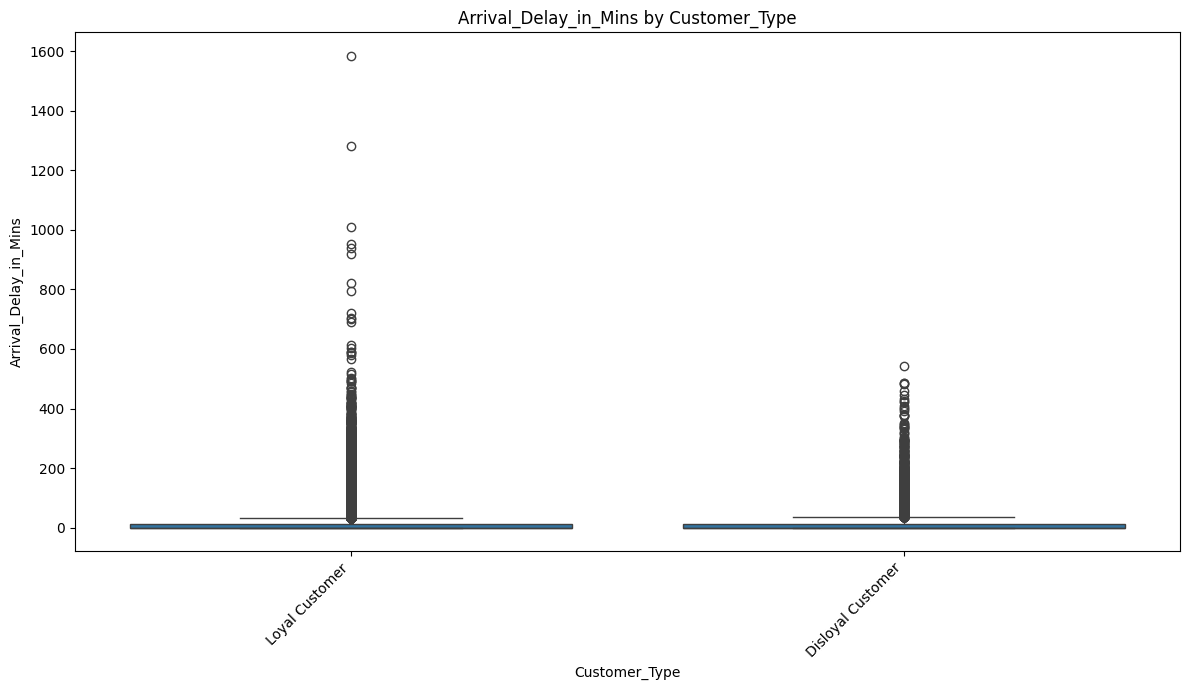

----------------------------------------------------------------------


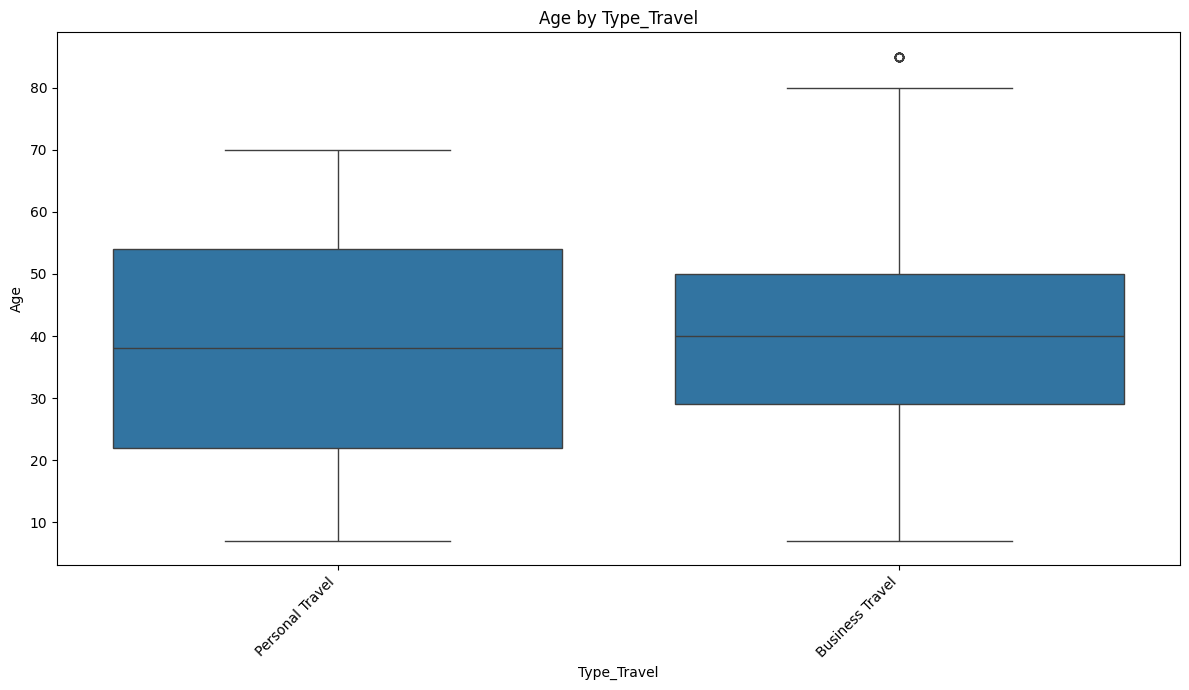

----------------------------------------------------------------------


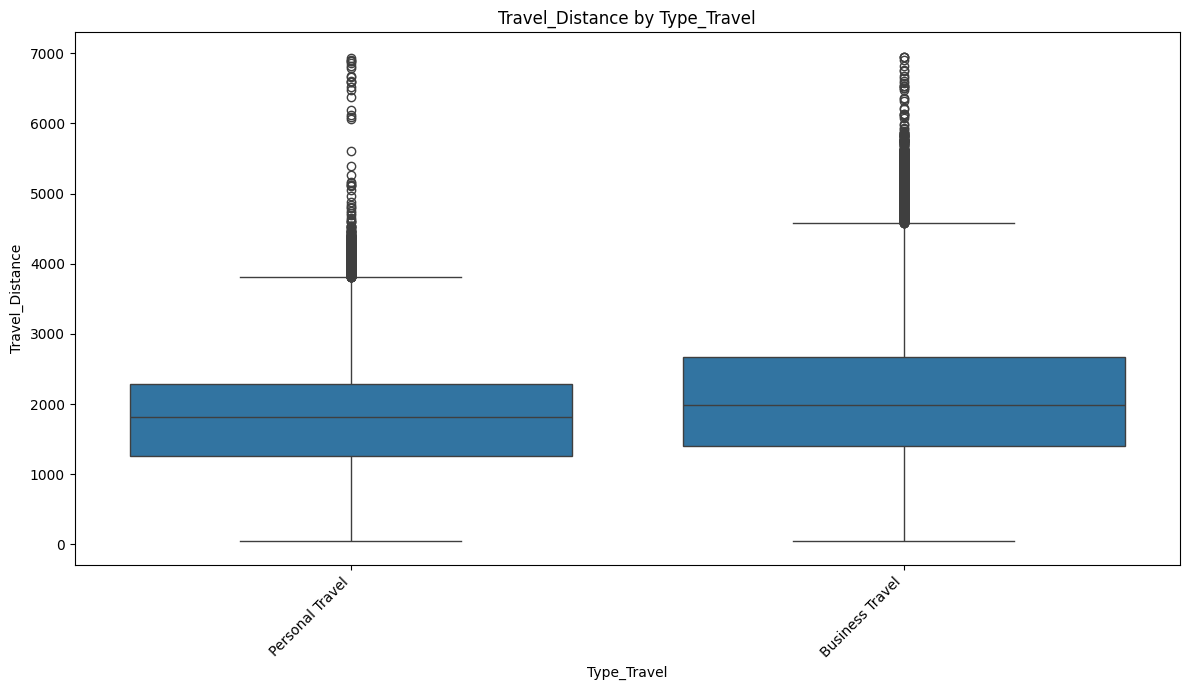

----------------------------------------------------------------------


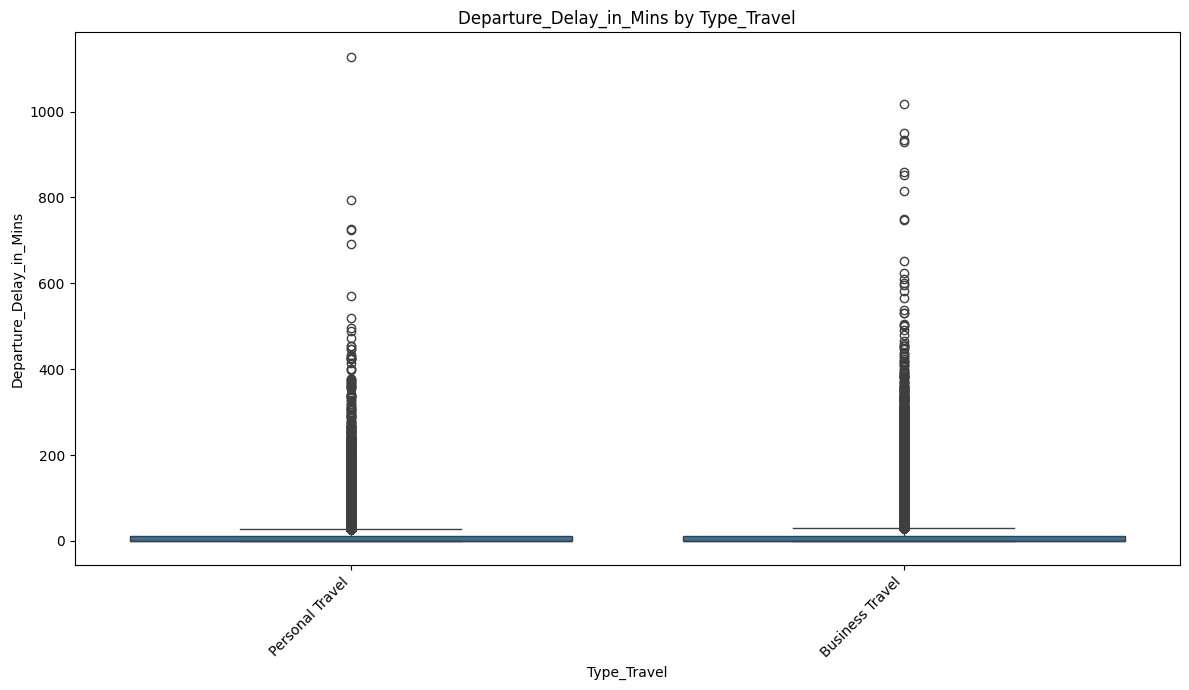

----------------------------------------------------------------------


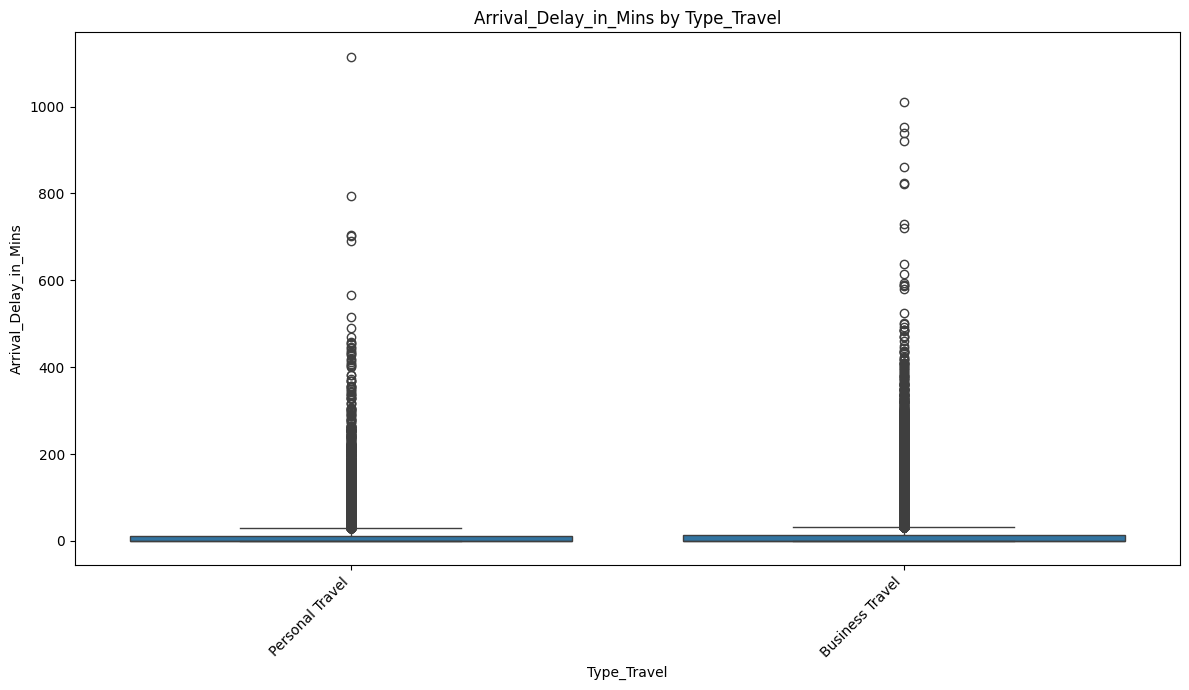

----------------------------------------------------------------------


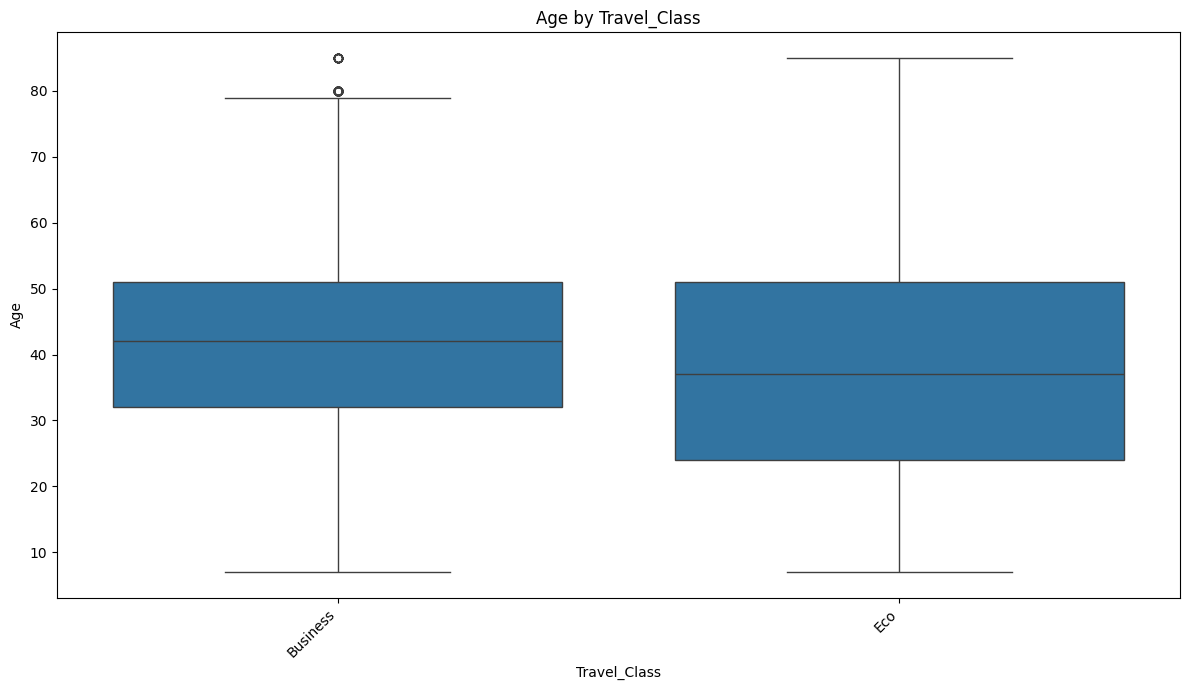

----------------------------------------------------------------------


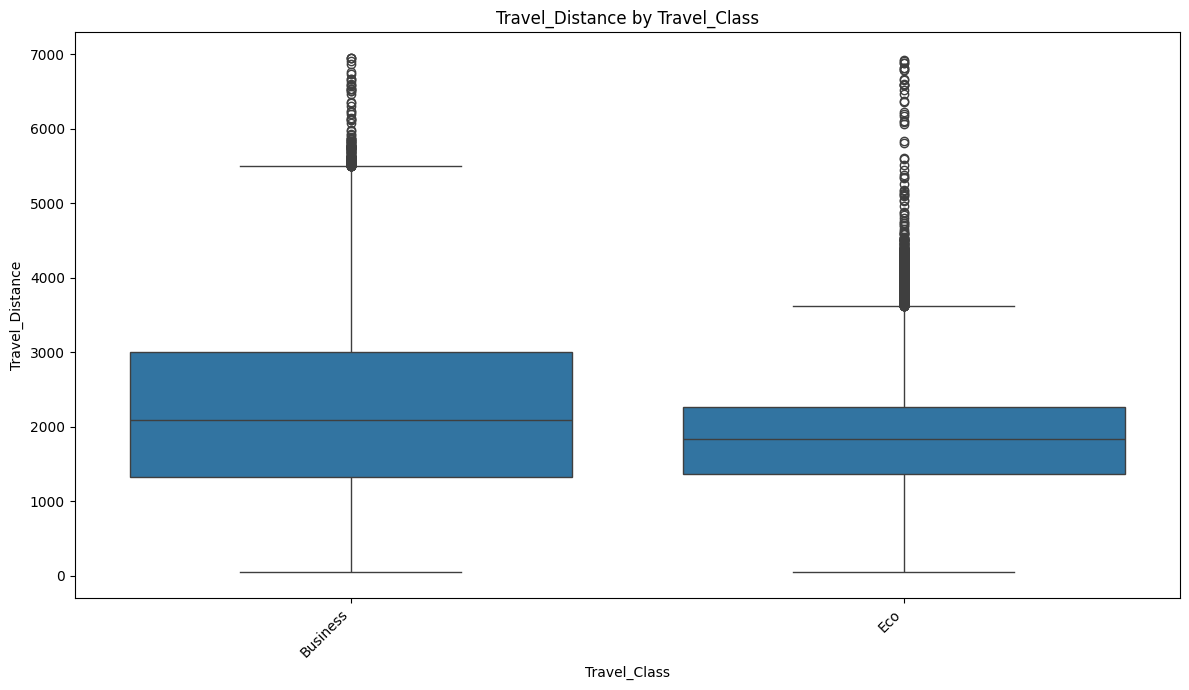

----------------------------------------------------------------------


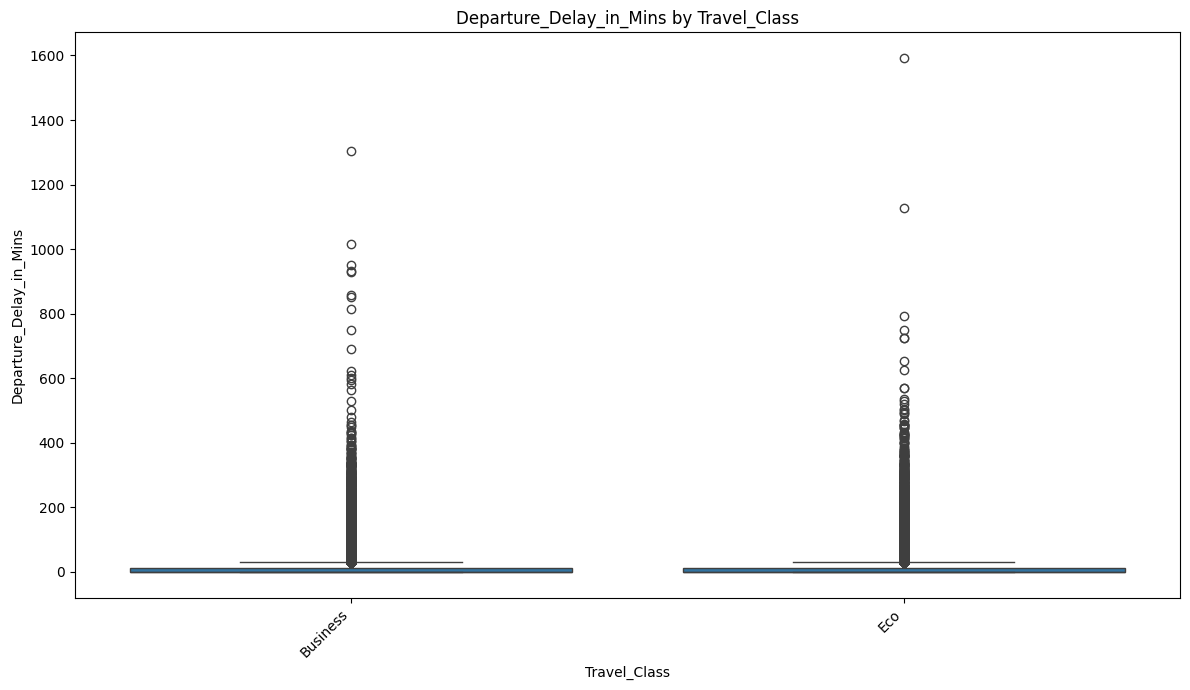

----------------------------------------------------------------------


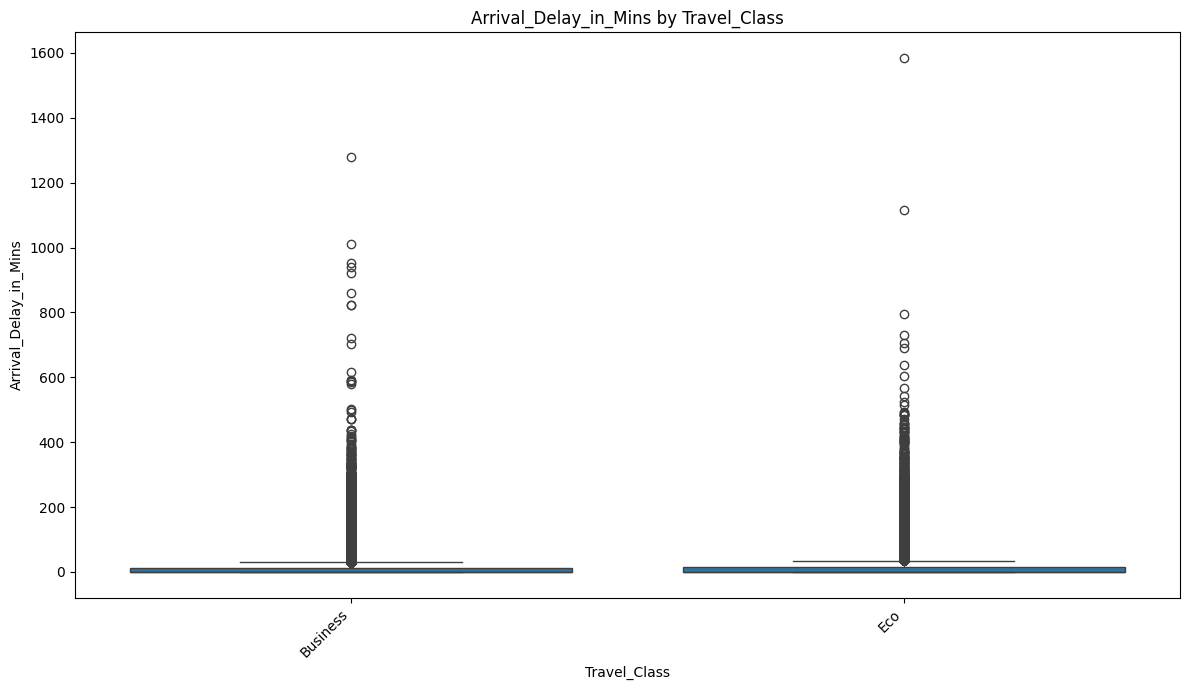

----------------------------------------------------------------------


In [21]:
# Select some key numerical columns for bivariate analysis with categorical columns
num_cols_subset = ['Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']

for cat_col in cat_col:
    for num_col in num_cols_subset:
        plt.figure(figsize=(12, 7))
        sns.boxplot(data=df, x=cat_col, y=num_col)
        plt.title(f'{num_col} by {cat_col}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        print('----------------------------------------------------------------------')

**Heatmap of Numerical Features**

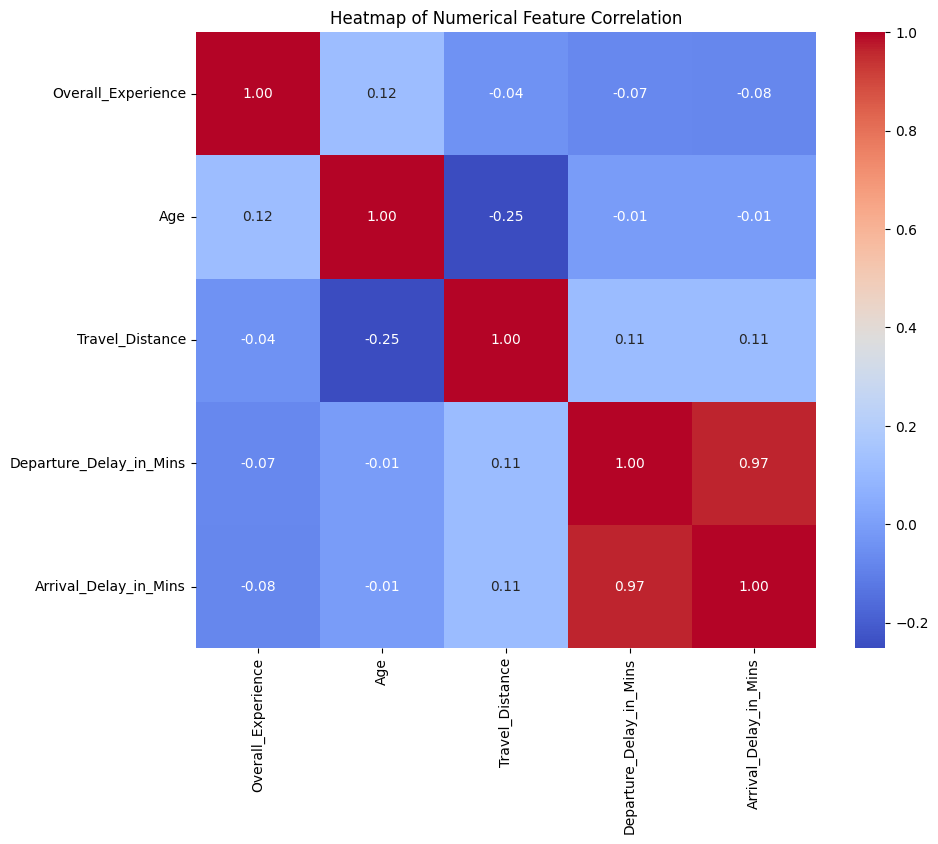

In [22]:
# Select only the numerical columns
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Numerical Feature Correlation')
plt.show()